# Hbond mapping

In [3]:
import networkx as nx
import mdtraj as md
import pandas as pd
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds as hbonds
import matplotlib
import matplotlib.pyplot as plt
import ast
import csv
import itertools
import warnings
warnings.filterwarnings('ignore')

In [1]:
traj_notess = [['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3'],['5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3'],['5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3'],['5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3'],['5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3'],['5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3'],['5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3'],['5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3'],['4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3'],['4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3'],['4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3'],['4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3'],['4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7'],['4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5'],['4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5'],['4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']]

In [2]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [ ]:
def gather_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    return contact_map

In [9]:
top_location = '4HFI_F238L_pH46_md2' + '/' + '4HFI_F238L_pH46_md2' + ".system.pdb"
traj_location = '4HFI_F238L_pH46_md2' + '/' + '4HFI_F238L_pH46_md2' + ".skip" + str(10) + ".system.xtc"
traj = md.load('/media/scottzhuang/data/MD/' + traj_location,top = '/media/scottzhuang/data/MD/' + top_location)
topology = traj.topology
table, bonds = topology.to_dataframe()
n_frames = traj.n_frames
for resid1 in range(198,316):
    resid_hbond = select_time[select_time.resid1 == resid1]
    

traj_note  traj_time resid1 resid2  inter_hbond intra_hbond  \
188     4HFI_F238L_pH46_md2       31.0    198    202          NaN         202   
189     4HFI_F238L_pH46_md2       31.0    198    203          NaN         203   
190     4HFI_F238L_pH46_md2       31.0    198    203          NaN         203   
191     4HFI_F238L_pH46_md2       31.0    198    203          NaN         203   
192     4HFI_F238L_pH46_md2       31.0    198    203          NaN         203   
193     4HFI_F238L_pH46_md2       31.0    198    202          NaN         202   
194     4HFI_F238L_pH46_md2       31.0    198    203          NaN         203   
195     4HFI_F238L_pH46_md2       32.0    198    203          NaN         203   
196     4HFI_F238L_pH46_md2       32.0    198    203          NaN         203   
197     4HFI_F238L_pH46_md2       32.0    198    203          NaN         203   
198     4HFI_F238L_pH46_md2       32.0    198    203          NaN         203   
199     4HFI_F238L_pH46_md2       32.0    198    203          NaN         203   
200     4HFI_F238L_pH46_md2       33.0    198    202          NaN         202   
201     4HFI_F238L_pH46_md2       33.0    198    203          NaN         203   
202     4HFI_F238L_pH46_md2       33.0    198    201          NaN         201   
203     4HFI_F238L_pH46_md2       33.0    198    203          NaN         203   
204     4HFI_F238L_pH46_md2       33.0    198    203          NaN         203   
205     4HFI_F238L_pH46_md2       33.0    198    203          NaN         203   
206     4HFI_F238L_pH46_md2       33.0    198    203          NaN         203   
207     4HFI_F238L_pH46_md2       34.0    198    203          NaN         203   
208     4HFI_F238L_pH46_md2       34.0    198    203          NaN         203   
209     4HFI_F238L_pH46_md2       34.0    198    202          NaN         202   
210     4HFI_F238L_pH46_md2       34.0    198    203          NaN         203   
211     4HFI_F238L_pH46_md2       34.0    198    202          NaN         202   
212     4HFI_F238L_pH46_md2       34.0    198    203          NaN         203   
213     4HFI_F238L_pH46_md2       34.0    198    201          NaN         201   
214     4HFI_F238L_pH46_md2       34.0    198    203          NaN         203   
215     4HFI_F238L_pH46_md2       35.0    198    202          NaN         202   
216     4HFI_F238L_pH46_md2       35.0    198    203          NaN         203   
217     4HFI_F238L_pH46_md2       35.0    198    203          NaN         203   
...                     ...        ...    ...    ...          ...         ...   
173989  4HFI_F238L_pH46_md2       96.0    314    311          NaN         311   
173990  4HFI_F238L_pH46_md2       96.0    314    310          NaN         310   
173991  4HFI_F238L_pH46_md2       96.0    314    310          NaN         310   
173992  4HFI_F238L_pH46_md2       96.0    314    310          NaN         310   
173993  4HFI_F238L_pH46_md2       96.0    314    310          NaN         310   
173994  4HFI_F238L_pH46_md2       97.0    314    311          NaN         311   
173995  4HFI_F238L_pH46_md2       97.0    314    310          NaN         310   
173996  4HFI_F238L_pH46_md2       97.0    314    310          NaN         310   
173997  4HFI_F238L_pH46_md2       97.0    314    310          NaN         310   
173998  4HFI_F238L_pH46_md2       97.0    314    310          NaN         310   
173999  4HFI_F238L_pH46_md2       98.0    314    310          NaN         310   
174000  4HFI_F238L_pH46_md2       98.0    314    311          NaN         311   
174001  4HFI_F238L_pH46_md2       98.0    314    310          NaN         310   
174002  4HFI_F238L_pH46_md2       98.0    314    310          NaN         310   
174003  4HFI_F238L_pH46_md2       98.0    314    310          NaN         310   
174004  4HFI_F238L_pH46_md2       98.0    314    311          NaN         311   
174005  4HFI_F238L_pH46_md2       98.0    314    310          NaN         310   
174006  4HFI_F238L_pH46_md2       99.0    314    

In [13]:
def create_hbond_contact_map(traj_note, location = '/media/scottzhuang/data/MD/', skip=10):
    top_location = traj_note + '/' + traj_note + ".ca.pdb"
    traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
    traj = md.load(location + traj_location,top = location + top_location)
    n_frames = traj.n_frames
    hbond_contact_map = pd.DataFrame(columns=['residue1','residue2','interaction'])
    hbond_network_dataframe = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_network_2.csv')
    hbond_network_dataframe = hbond_network_dataframe[hbond_network_dataframe.traj_time >= 40]

    for column in hbond_network_dataframe.columns:
        if (column !=  'traj_time') & (column != 'residue ') & (column != 'Unnamed: 0'):
            residue1s = hbond_network_dataframe.loc[(hbond_network_dataframe[column] != 0)]['residue'].values
            residue2 = int(column)
            for residue1 in set(residue1s):
                if hbond_contact_map[(hbond_contact_map.residue1 == residue1) & (hbond_contact_map.residue2 == residue2)].empty:
                    interaction_sum = hbond_network_dataframe[(hbond_network_dataframe[column] != 0) & (hbond_network_dataframe.residue == residue1)].shape[0]
                    hbond_contact_map = pd.concat([hbond_contact_map,pd.DataFrame([[residue1,residue2,interaction_sum / (n_frames-40)]],columns=['residue1','residue2','interaction'])],ignore_index=True)
                else:
                    interaction_sum = hbond_network_dataframe[(hbond_network_dataframe[column] != 0) & (hbond_network_dataframe.residue == residue1)].shape[0]
                    hbond_contact_map.loc[(hbond_contact_map.residue1 == residue1) & (hbond_contact_map.residue2 == residue2),'interaction'] += interaction_sum / (n_frames-40)
    #print(hbond_contact_map)
    hbond_contact_map.to_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_after40.csv')
    print('finishing! ' + traj_note)

In [14]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(create_hbond_contact_map)(traj_note) for (traj_note) in traj_notes)

finishing! 5NJY_F238L_pH70_md1
finishing! 5NJY_I233T_pH70_md2
finishing! 5NJY_F238L_pH70_md2
finishing! 5NJY_F238L_pH70_md3
finishing! 5NJY_I233T_pH70_md4
finishing! 5NJY_pH70_md2
finishing! 5NJY_pH46_md1
finishing! 5NJY_pH70_md3
finishing! 5NJY_F238LI233T_pH70_md2
finishing! 5NJY_I233T_pH70_md3
finishing! 5NJY_F238LI233T_pH70_md1
finishing! 5NJY_F238LI233T_pH70_md3
finishing! 5NJY_F238L_pH46_md1
finishing! 5NJY_pH70_md1
finishing! 5NJY_pH46_md3
finishing! 5NJY_pH46_md2
finishing! 4HFI_F238L_pH46_md2
finishing! 5NJY_F238L_pH46_md2
finishing! 5NJY_I233T_pH46_md1
finishing! 5NJY_I233T_pH46_md2
finishing! 5NJY_F238L_pH46_md3
finishing! 5NJY_F238LI233T_pH46_md1
finishing! 5NJY_I233T_pH46_md3
finishing! 5NJY_F238LI233T_pH46_md2
finishing! 5NJY_F238LI233T_pH46_md3
finishing! 4HFI_F238L_pH46_md1
finishing! 4HFI_pH46_md1
finishing! 4HFI_pH46_md3
finishing! 4HFI_pH46_md2
finishing! 4HFI_I233T_pH46_md1
finishing! 4HFI_I233T_pH46_md2
finishing! 4HFI_F238L_pH46_md3
finishing! 4HFI_I233T_pH46_md3
f

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
hbond_data = pd.read_csv('/media/scottzhuang/data/MD/' + '4NPQ_F238L_pH70_md3' + '/hbond_analysis/hbond_contact_map_after40.csv')


In [35]:
def transform_hbond_network_data(traj_note):
    hbond_data = pd.read_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_after40.csv')
    hbond_data_all = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for ind in trans_ind:
        hbond_data_all = hbond_data_all.append(pd.DataFrame(np.concatenate(([np.zeros([590]) + ind], [trans_ind],[np.zeros([590])]), axis=0).T,columns=['residue1','residue2','hbond']),ignore_index=True)
    for residue1,residue2 in hbond_data[['residue1','residue2']].values:
        hbond_data_all.loc[(hbond_data_all.residue1 == residue1) & (hbond_data_all.residue2 == residue2),'hbond'] = hbond_data[(hbond_data.residue1 == residue1) & (hbond_data.residue2 == residue2)]['interaction'].values 
    hbond_data_all.to_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_complete_after40.csv')
#    hbond_data_trans.append(hbond_data_all['hbond'].values.reshape([590,590]))
#    hbond_data_mean = np.mean(hbond_data_trans,axis=0)
#    np.savetxt('/media/scottzhuang/data/MD/' + traj_notes[0] + '/hbond_analysis/' + traj_notes[0][:-4] + '_hbond_network_data_transmembrane_mean.dat',hbond_data_mean)        

In [36]:
trans_ind = np.asarray([np.arange(193,311),np.arange(504,622),np.arange(815,933),np.arange(1126,1244),np.arange(1437,1555)]).flatten()

In [40]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(transform_hbond_network_data)(traj_note) for (traj_note) in traj_notes)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
def gather_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_after40.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    return contact_map

In [5]:
def plot_intra_hbond_map(data,note,ax):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_intra = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]) + 5,
#                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])]['hbond'].values,
#                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])]['hbond'].values,
#                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])]['hbond'].values,
#                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])]['hbond'].values,
#                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])]['hbond'].values])]],
                            np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5]], 
                                                          columns=['residue1','residue2','hbond']
                                  )],ignore_index=True)
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.hbond,colormap='Greens',ax=ax,colorbar=False,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    
    data_intra.to_csv('conan_interaction/' + note + '_intra_hbond_after40.csv')

In [6]:
def plot_inter_hbond_map(data,note,ax):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_inter = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
                            
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]-311) + 5,
                                                        np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5 
                                                         ]]
                                                        ,columns=['residue1','residue2','hbond'])
                                                         ],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c='hbond',colormap='Greens',ax=ax,colorbar=False,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    data_inter.to_csv('conan_interaction/' + note + '_inter_hbond_after40.csv')

In [7]:
def plot_inter_intra_hbond(traj_notes):
    fig = plt.figure(figsize=(20,10)) 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    plot_inter_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax1)
    plot_intra_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax2)
    ax1.set_xticks(np.arange(200,320,10))
    ax1.set_yticks(np.arange(200,320,10))
    ax2.set_xticks(np.arange(200,320,10))
    ax2.set_yticks(np.arange(200,320,10))
    ax1.grid()
    ax2.grid()
    plt.suptitle(traj_notes[0][:-4])
    plt.tight_layout()
    plt.savefig('plots/' + traj_notes[0][:-4] + 'hbond_map.pdf')

    plt.show()

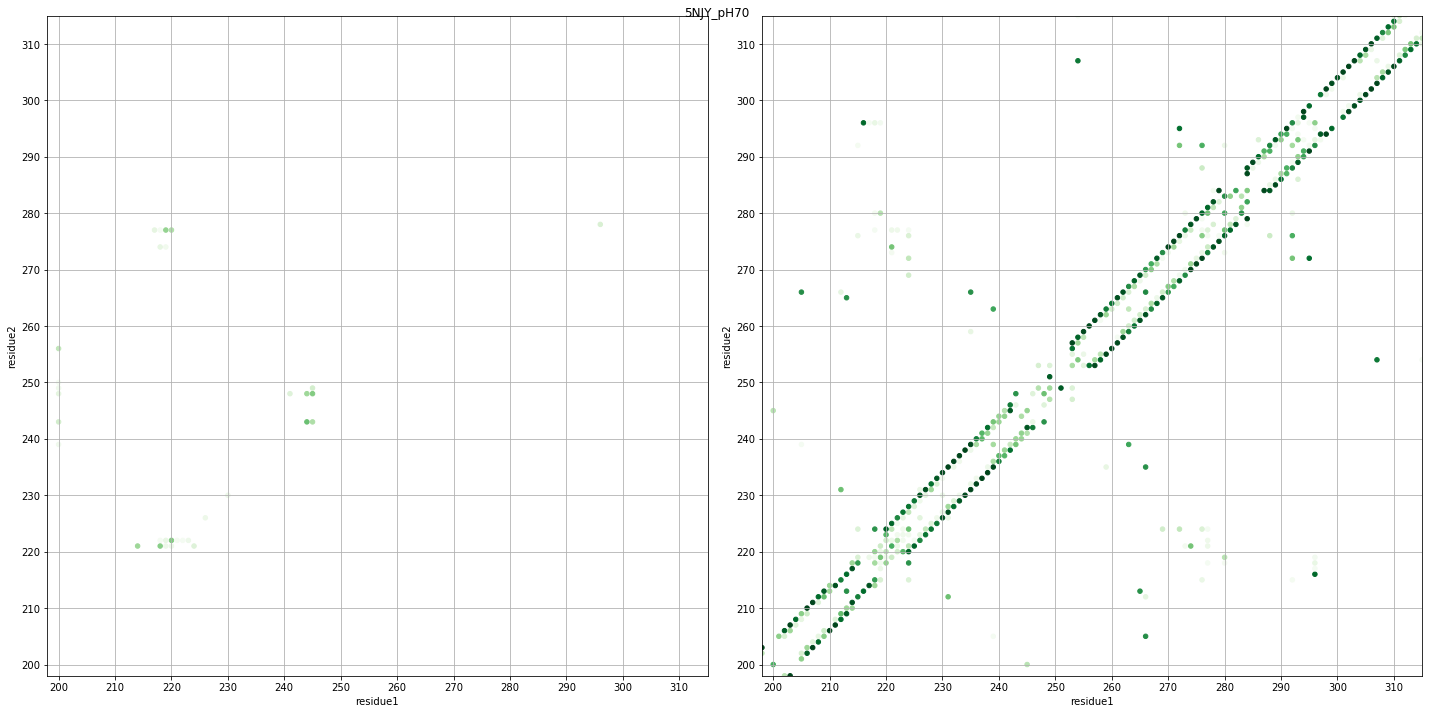

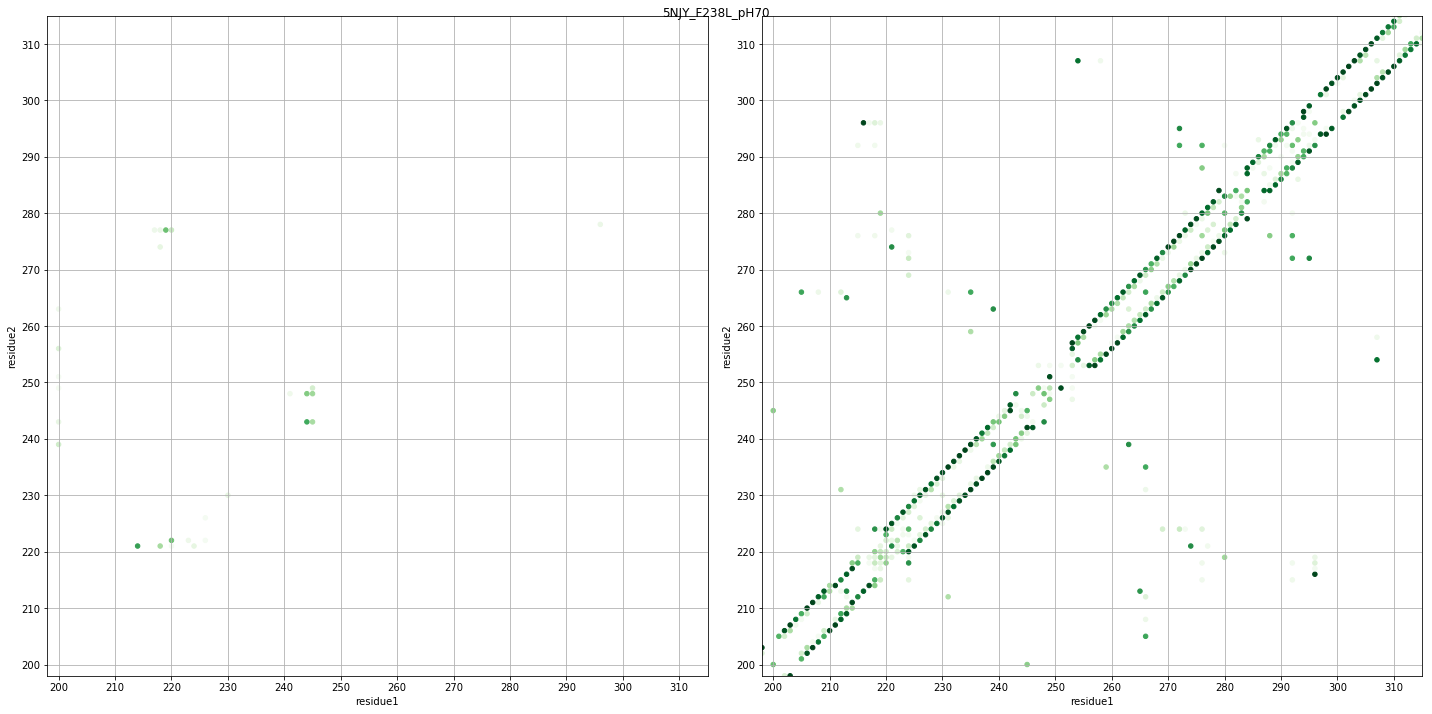

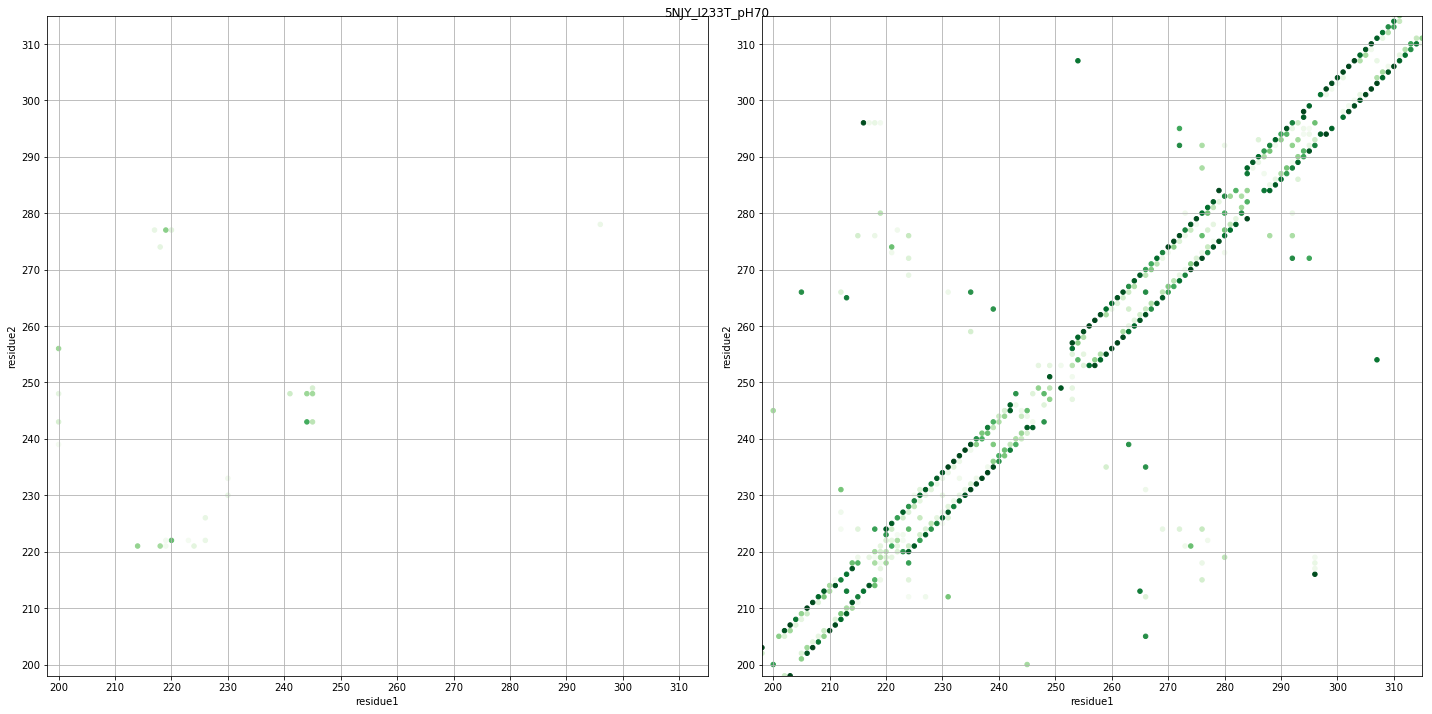

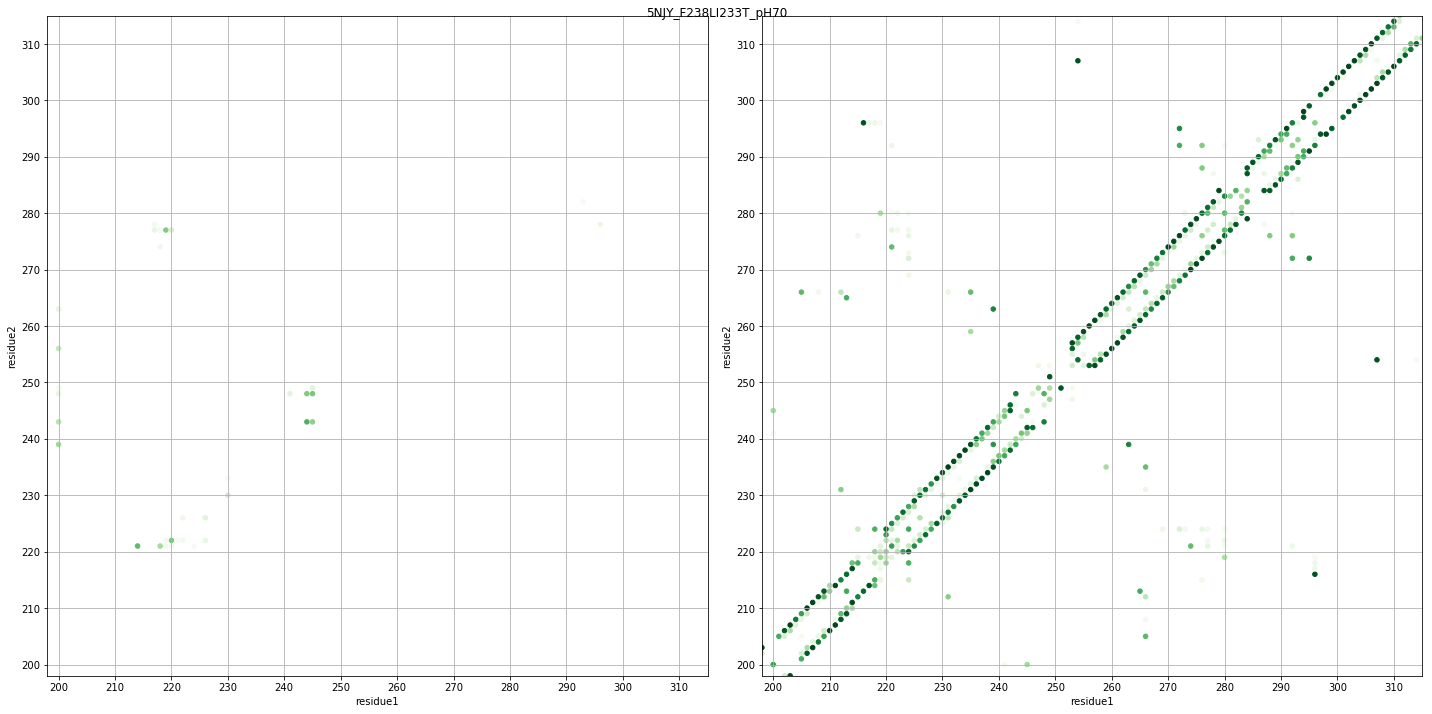

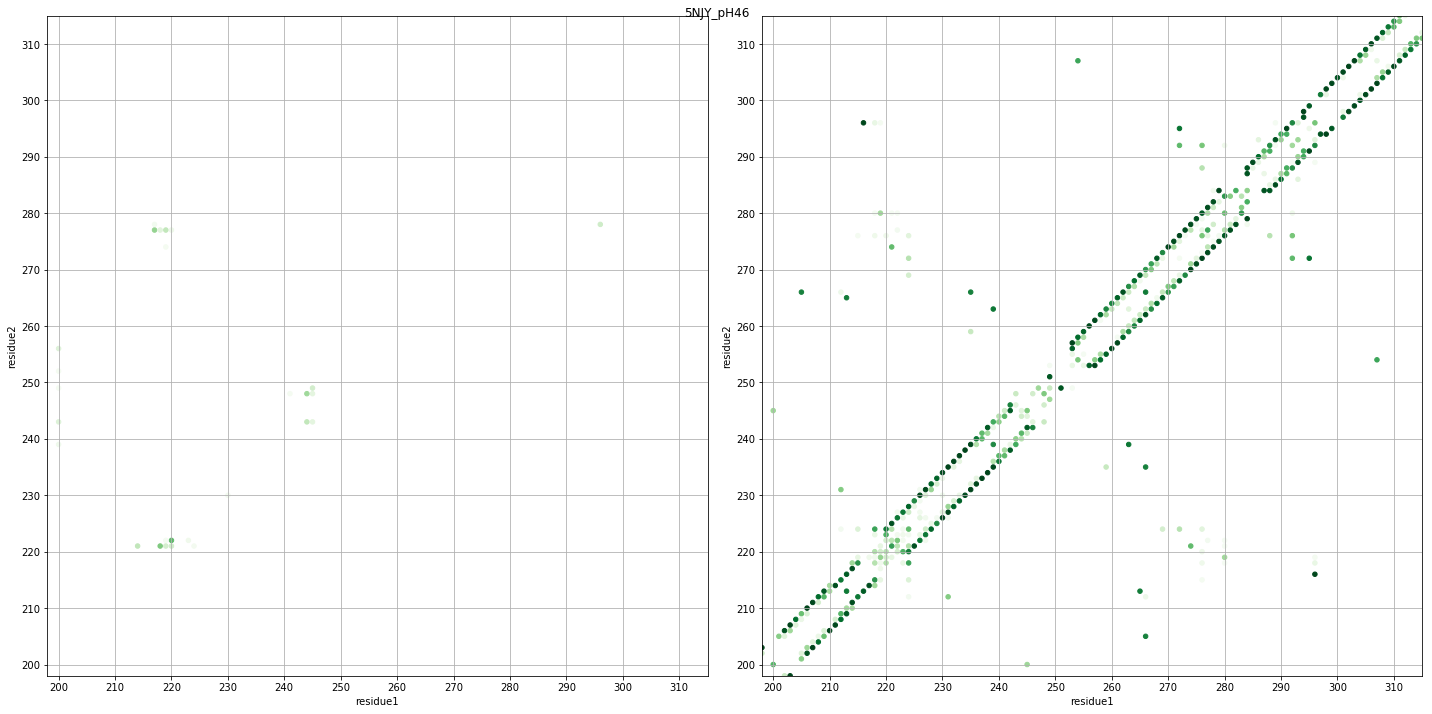

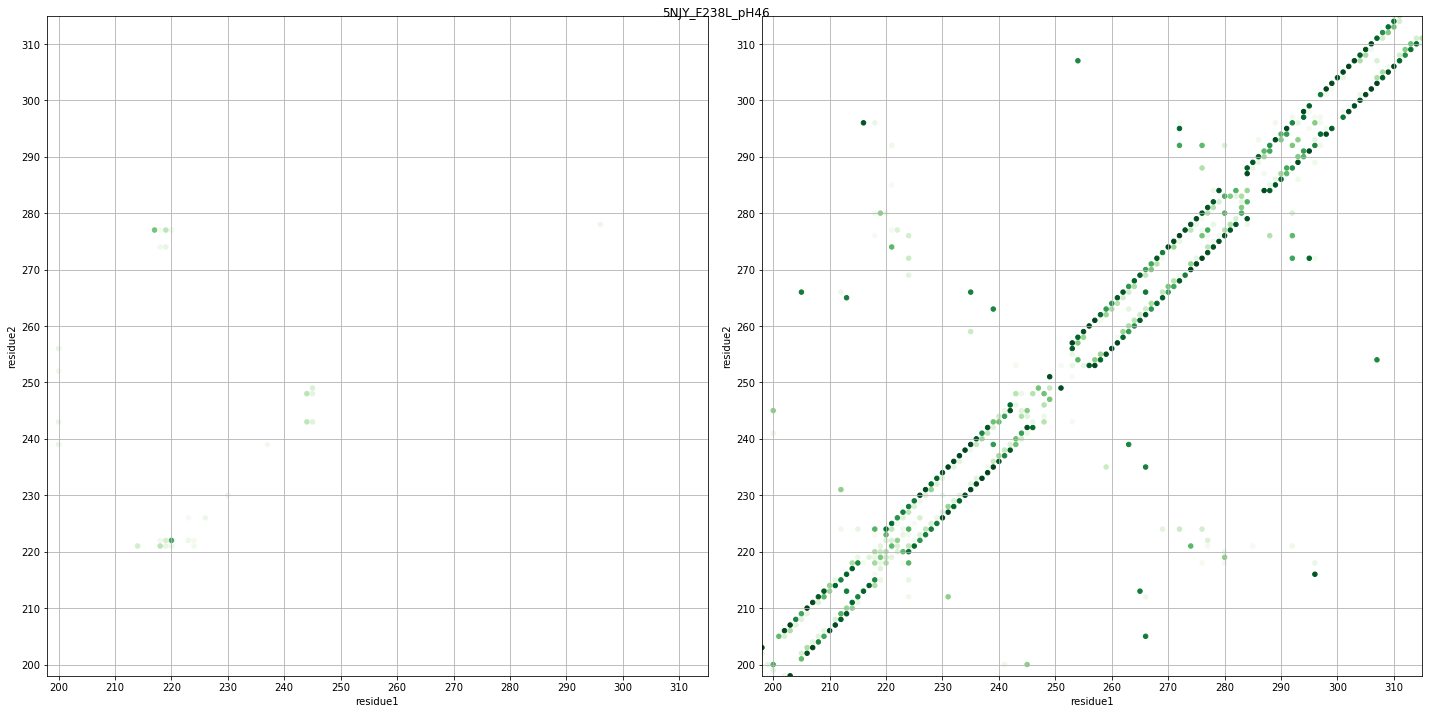

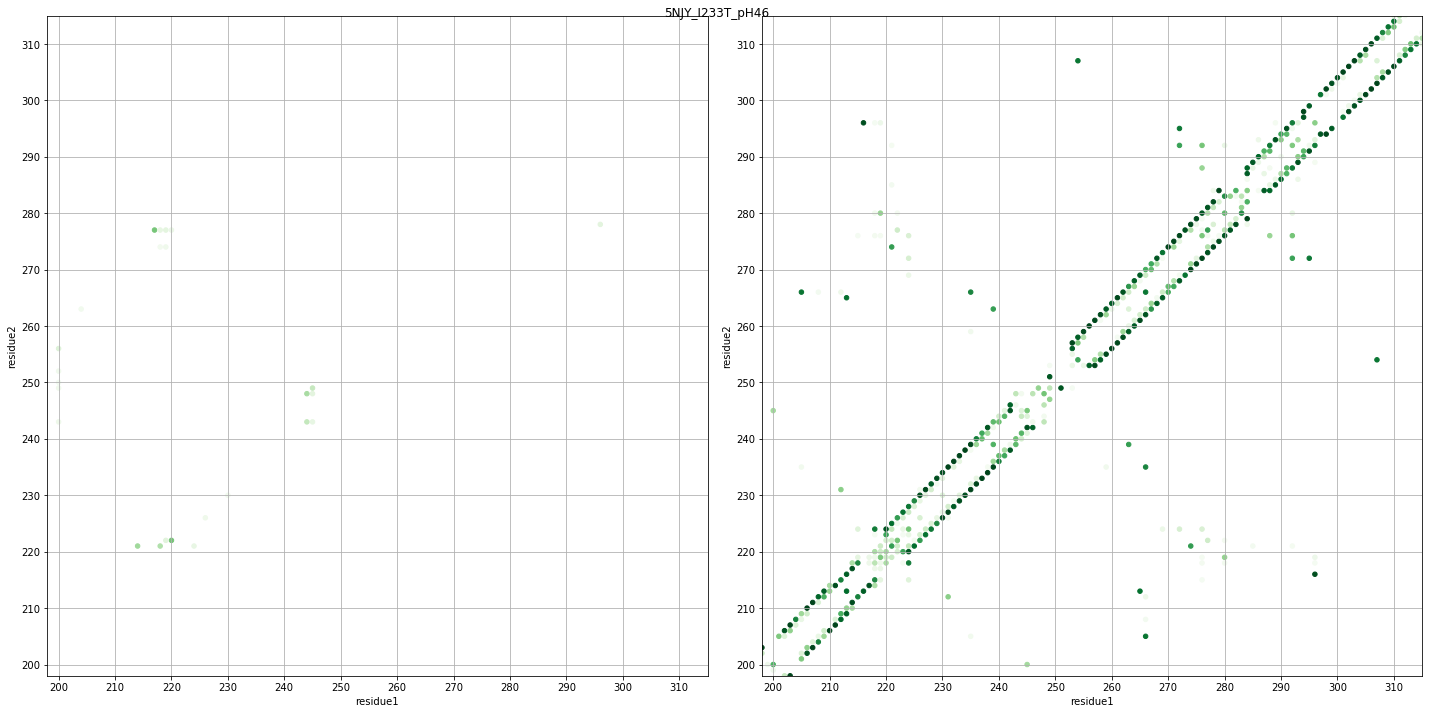

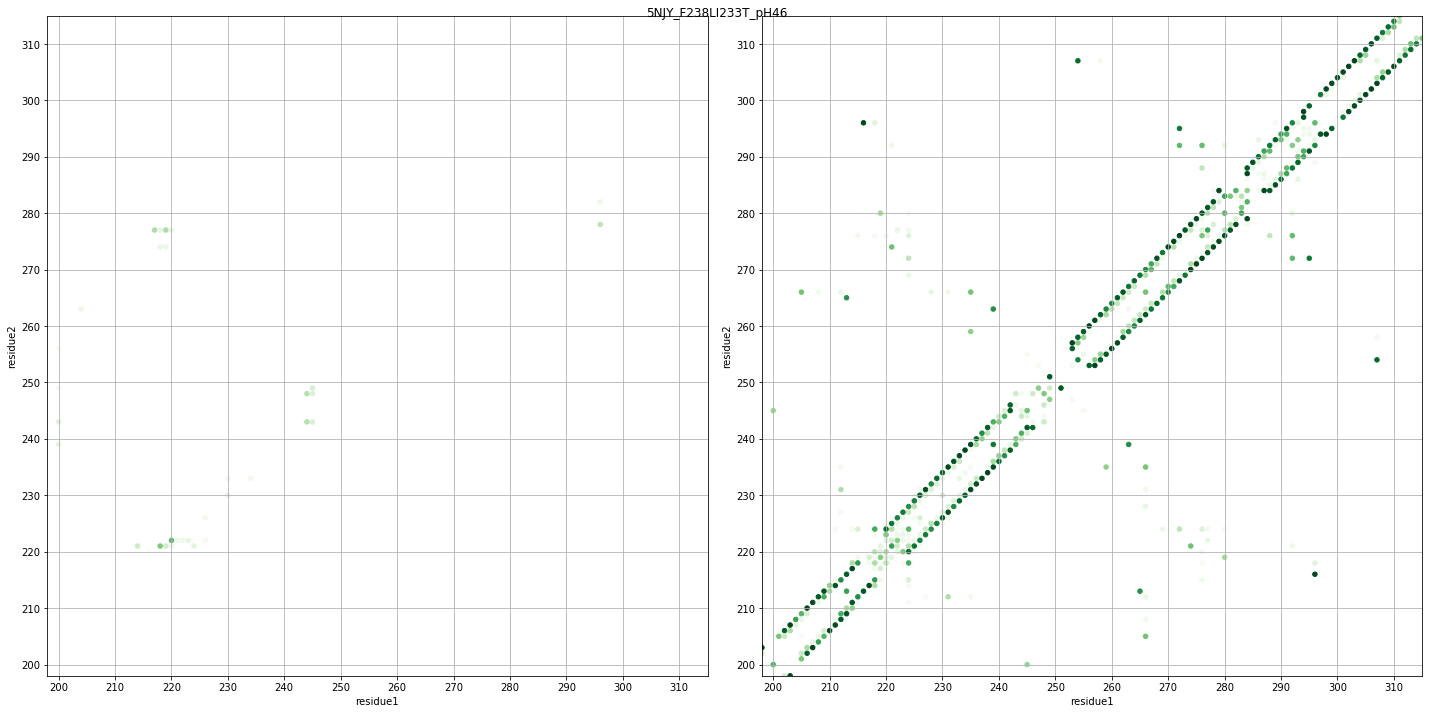

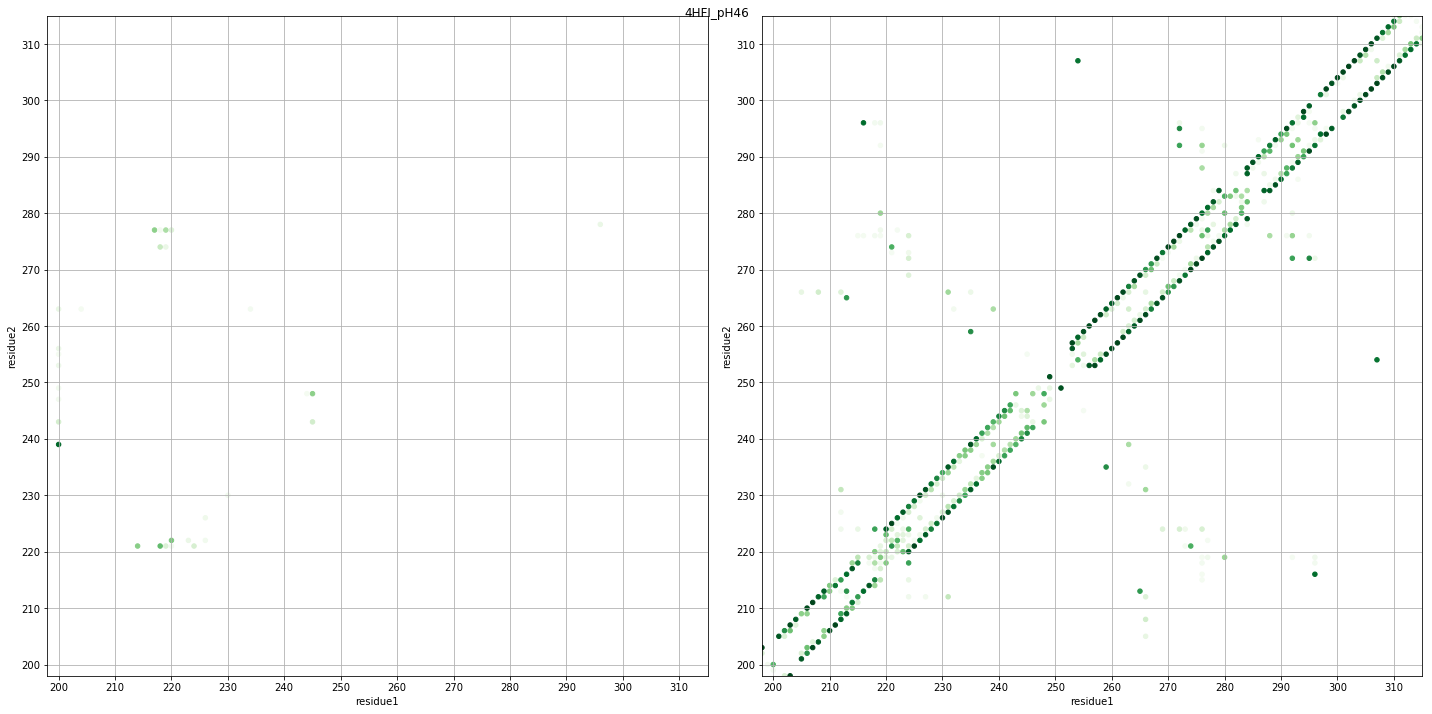

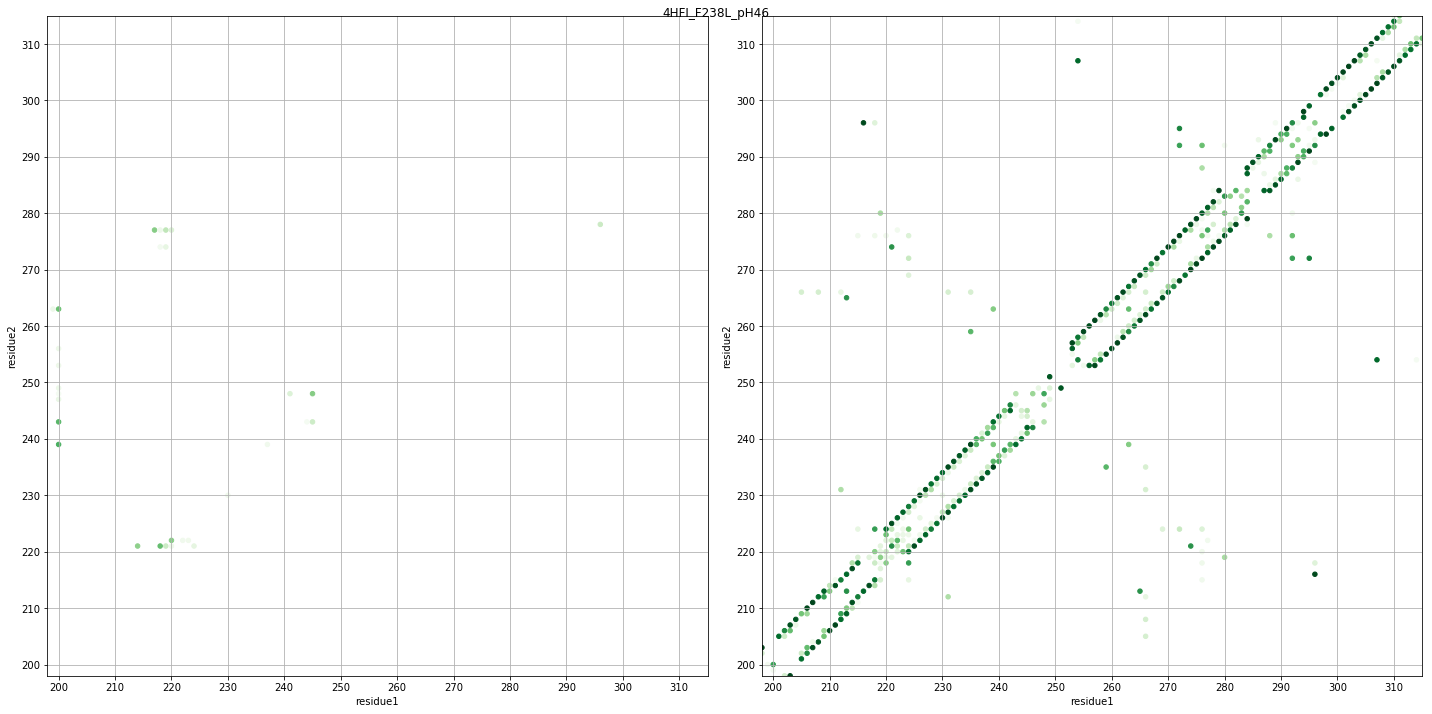

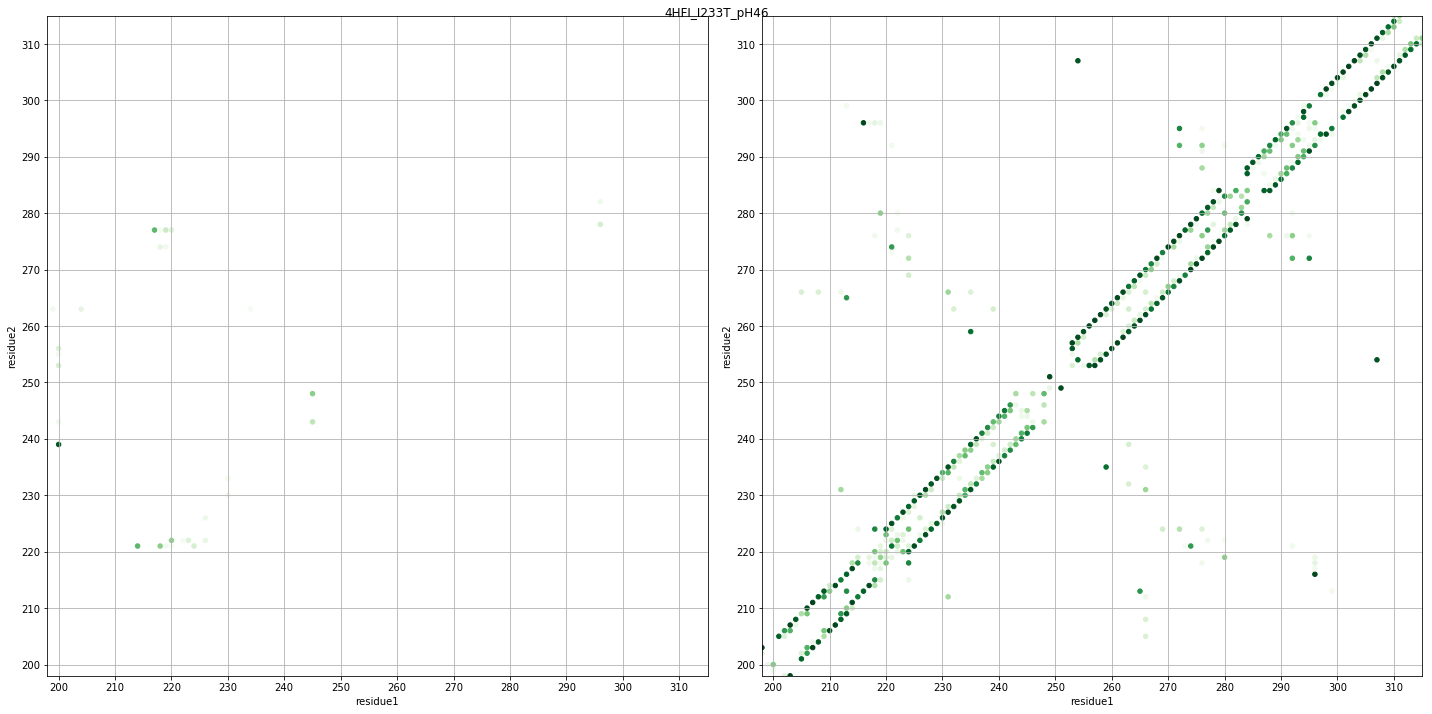

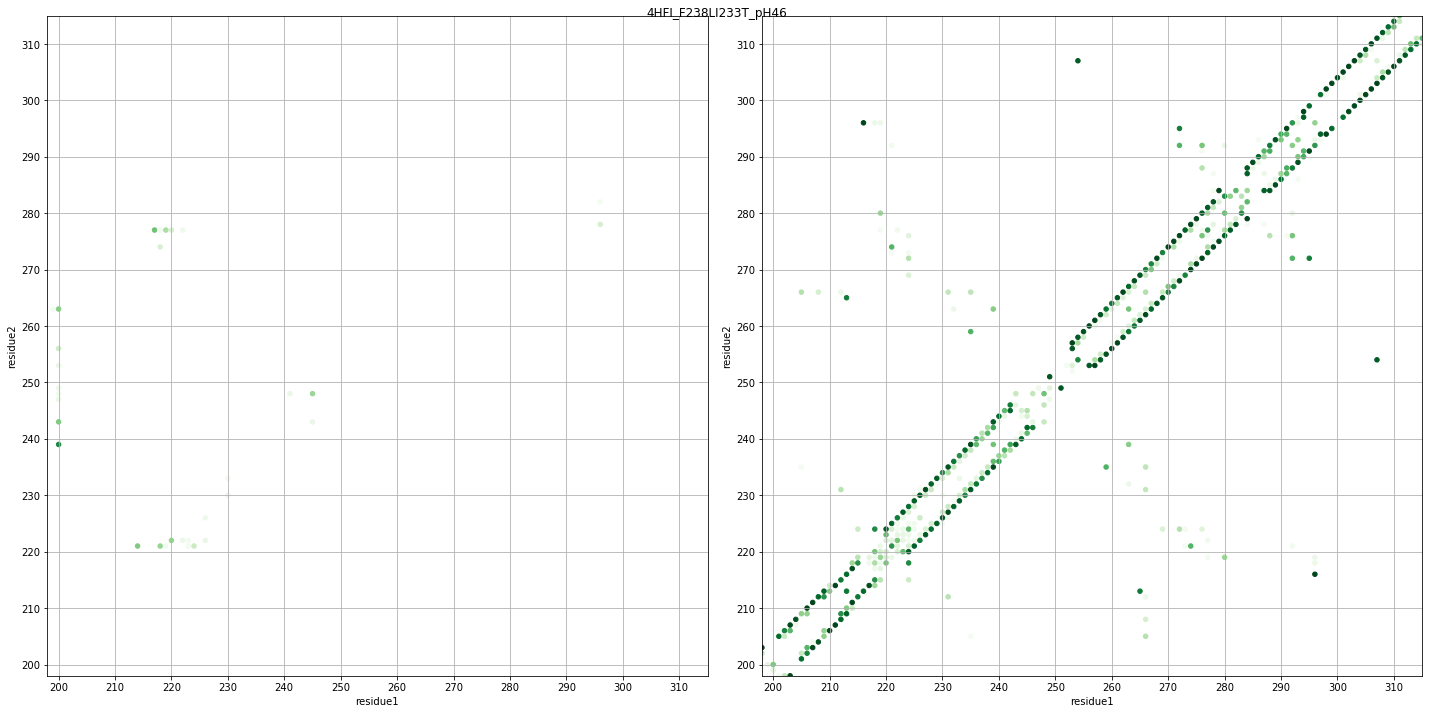

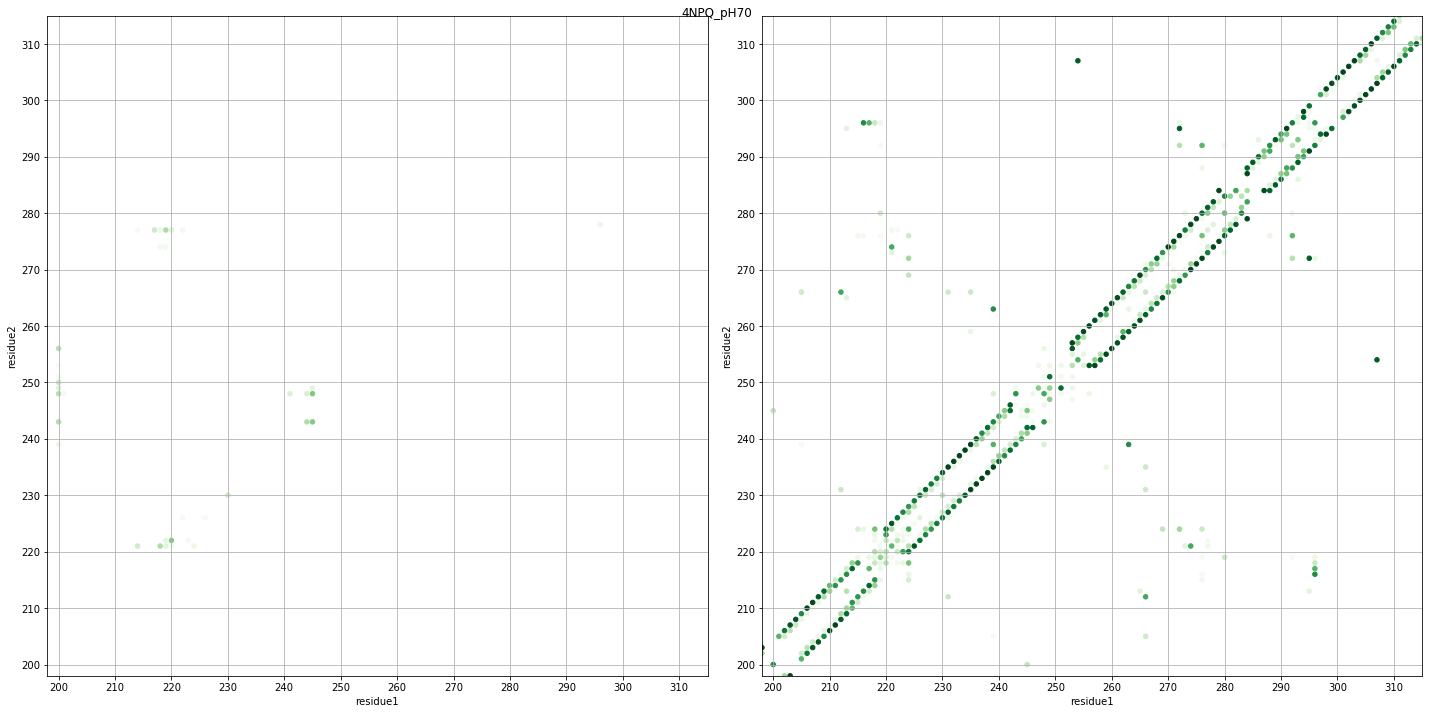

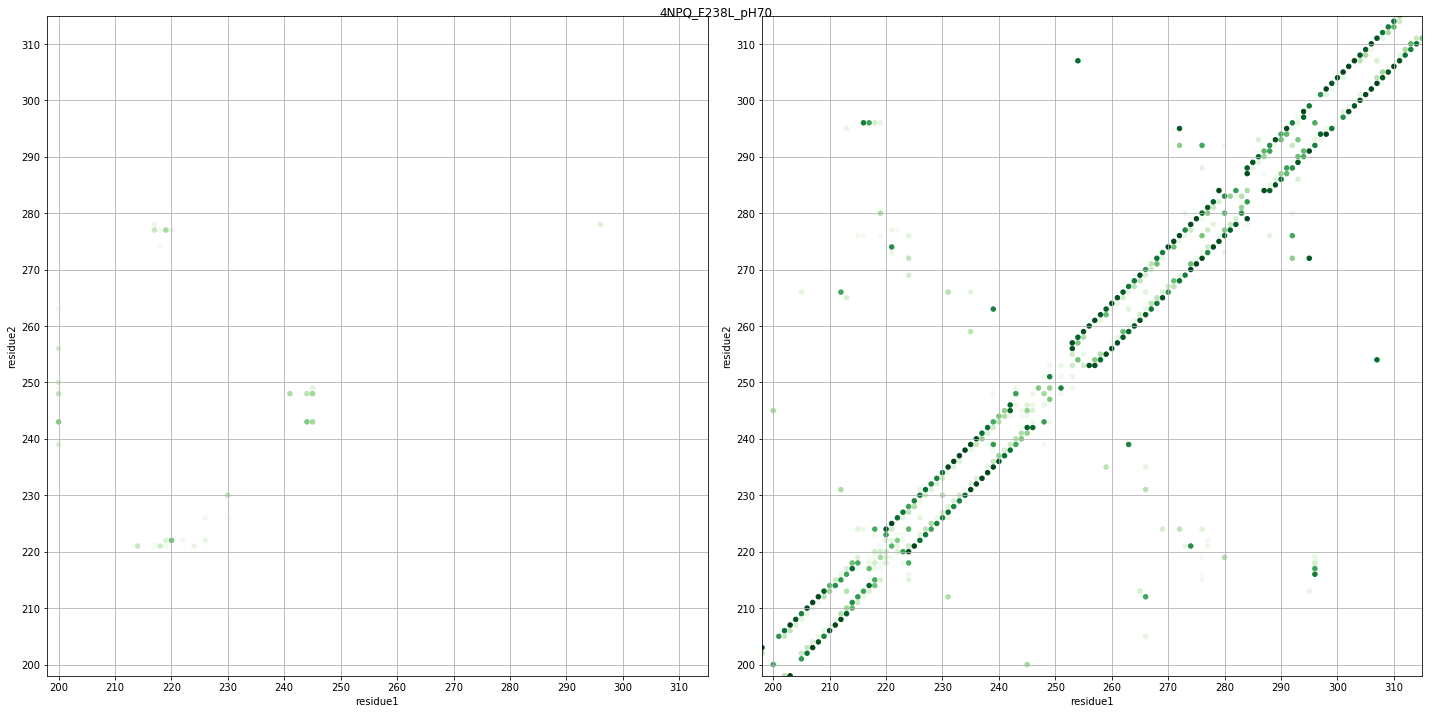

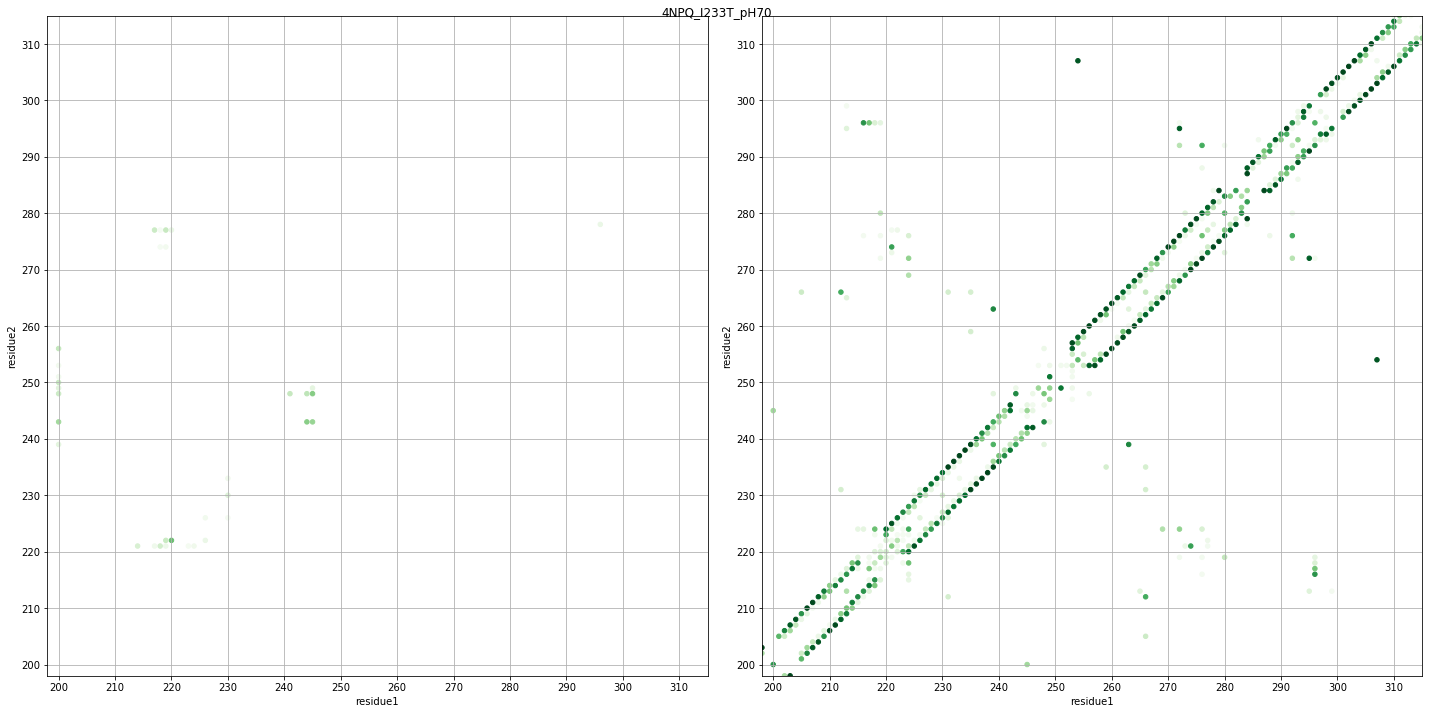

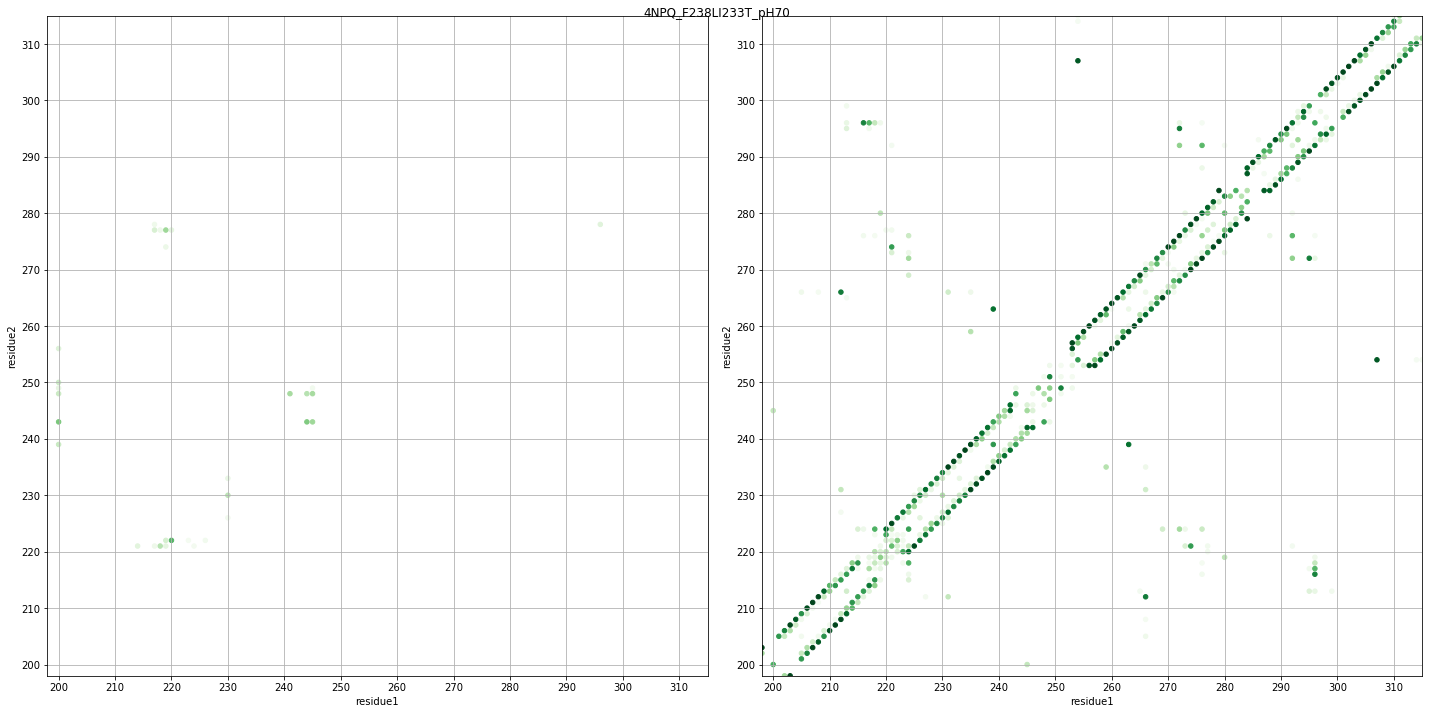

In [10]:
for traj_notes in traj_notess:
    plot_inter_intra_hbond(traj_notes)

In [8]:
def plot_inter_intra_hbond_per_rep(traj_note):
    fig = plt.figure(figsize=(20,10)) 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    contact_map = pd.read_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_complete_after40.csv')
    plot_inter_hbond_map(contact_map,traj_note,ax1)
    plot_intra_hbond_map(contact_map,traj_note,ax2)
    ax1.set_xticks(np.arange(200,320,10))
    ax1.set_yticks(np.arange(200,320,10))
    ax2.set_xticks(np.arange(200,320,10))
    ax2.set_yticks(np.arange(200,320,10))
    ax1.grid()
    ax2.grid()
    plt.suptitle(traj_note)
    plt.tight_layout()
    plt.savefig('plots/' + traj_note + 'hbond_map.pdf')
    plt.show()

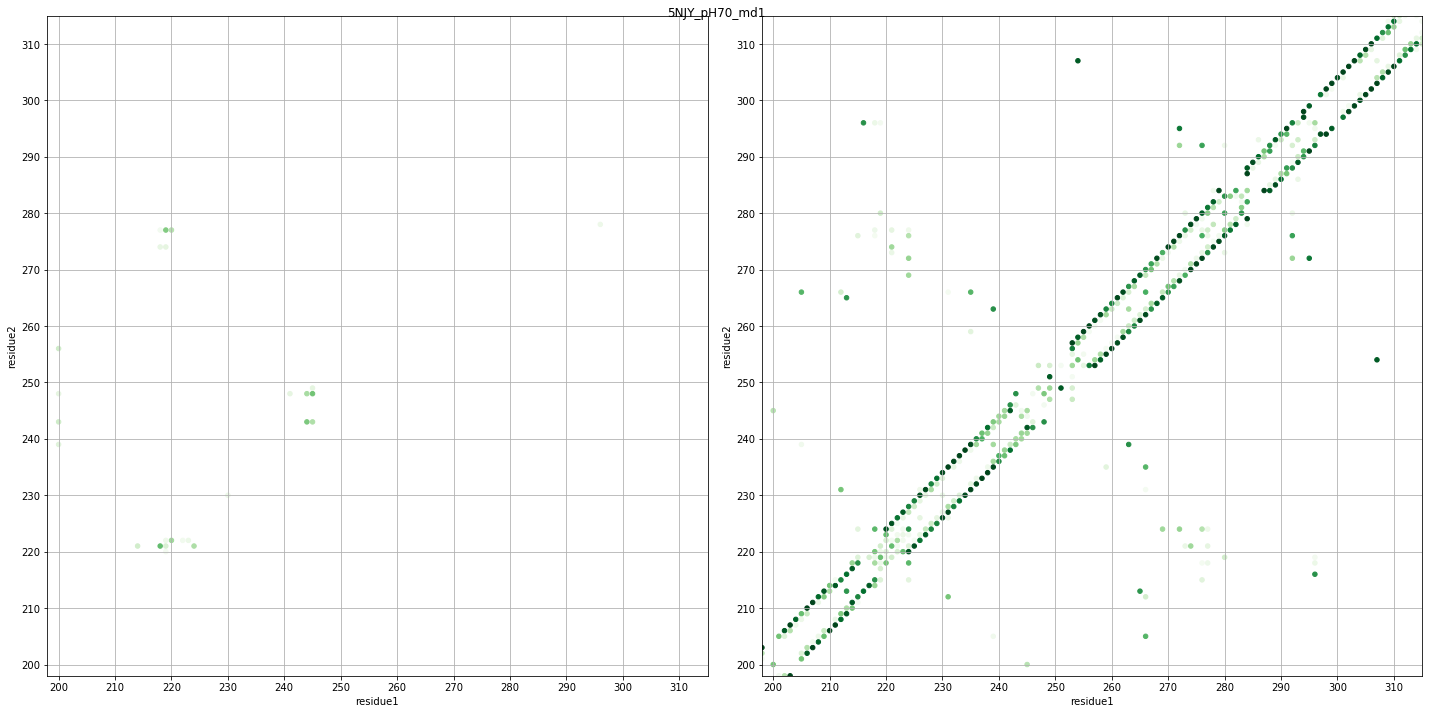

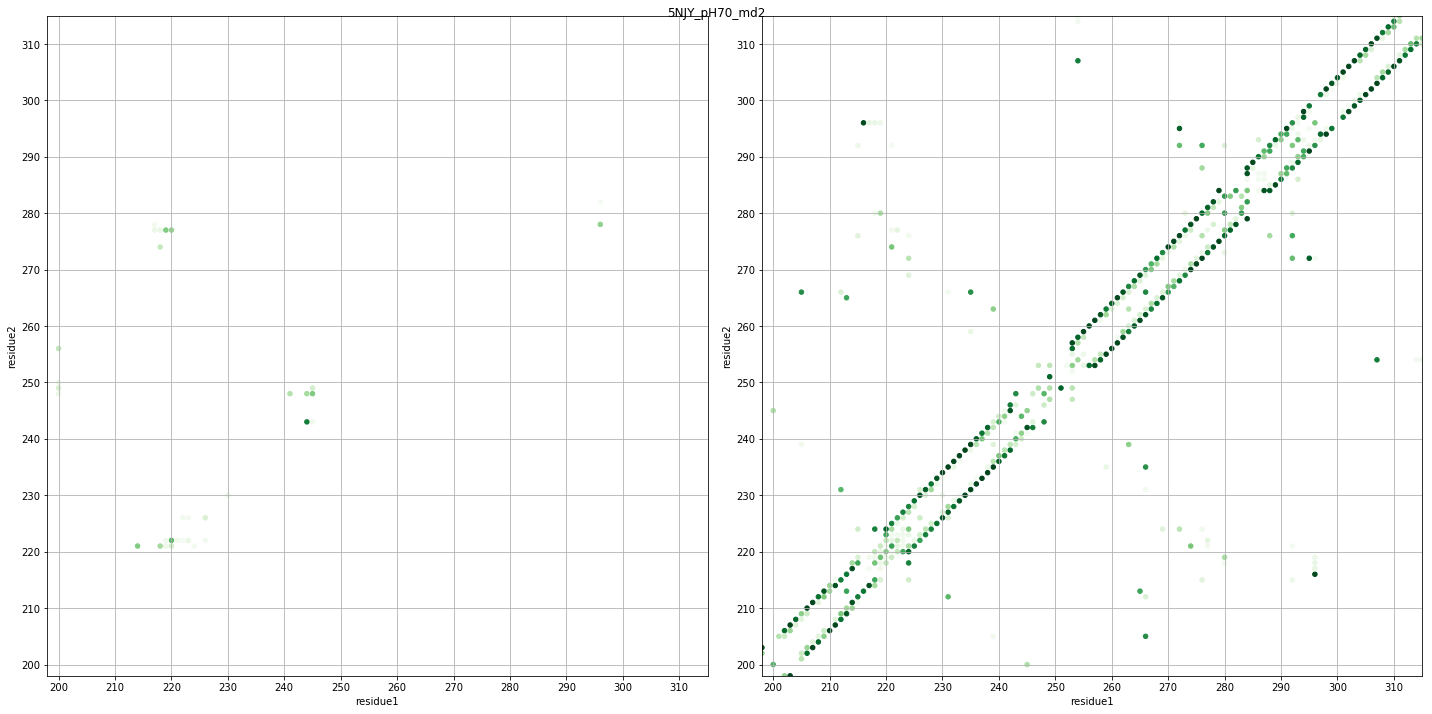

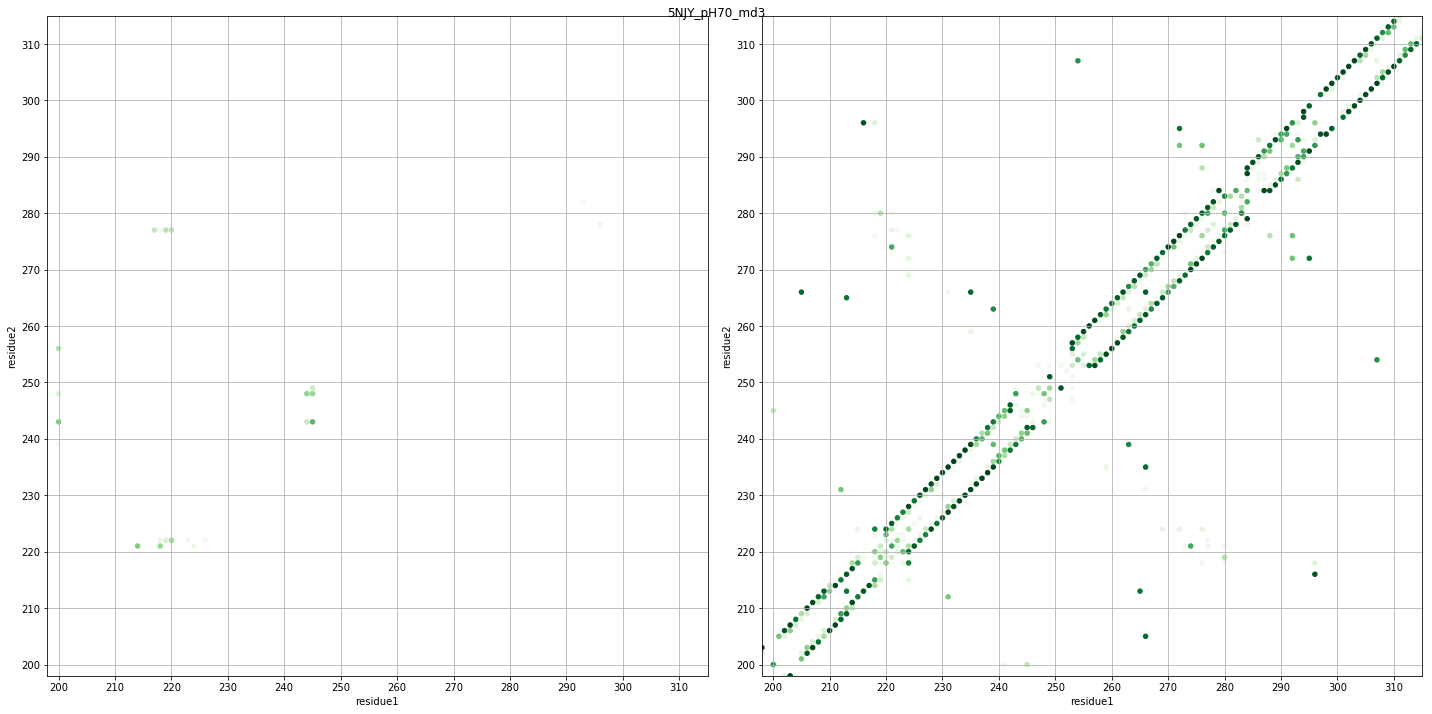

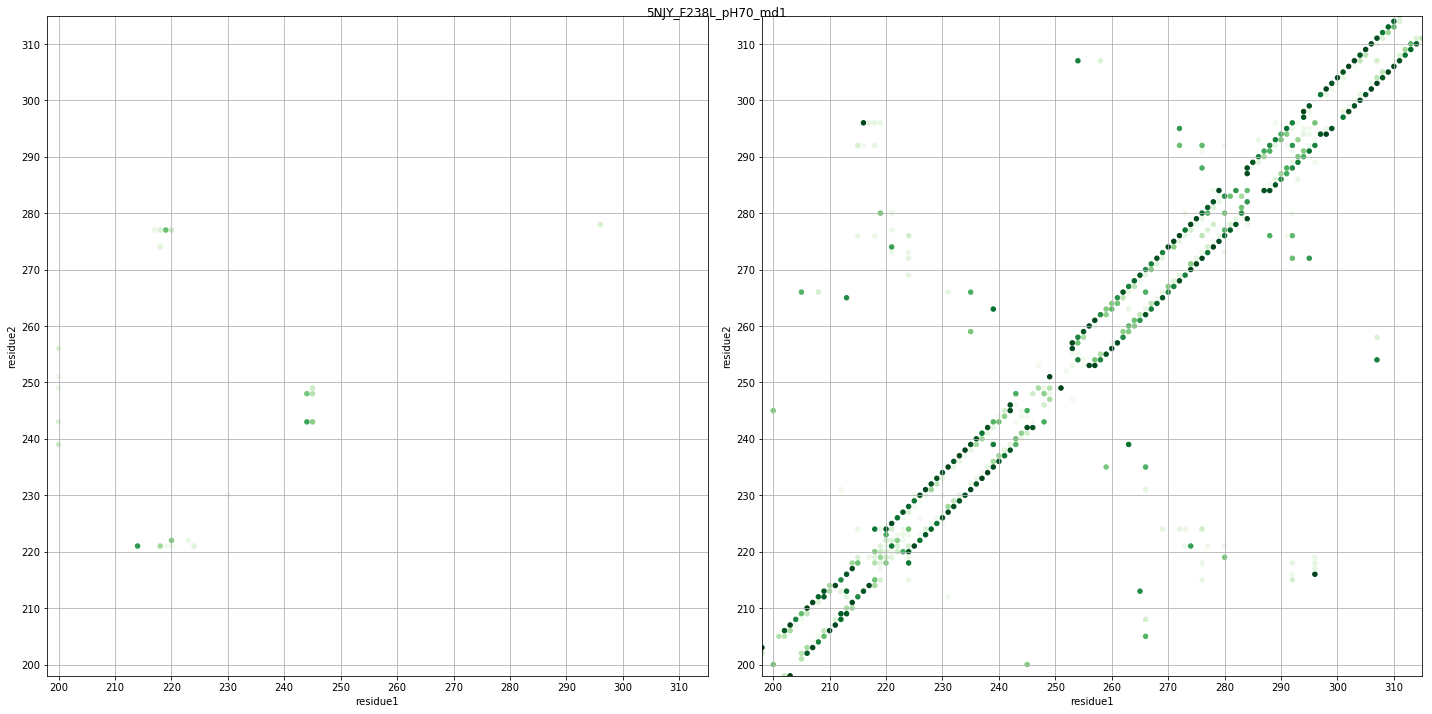

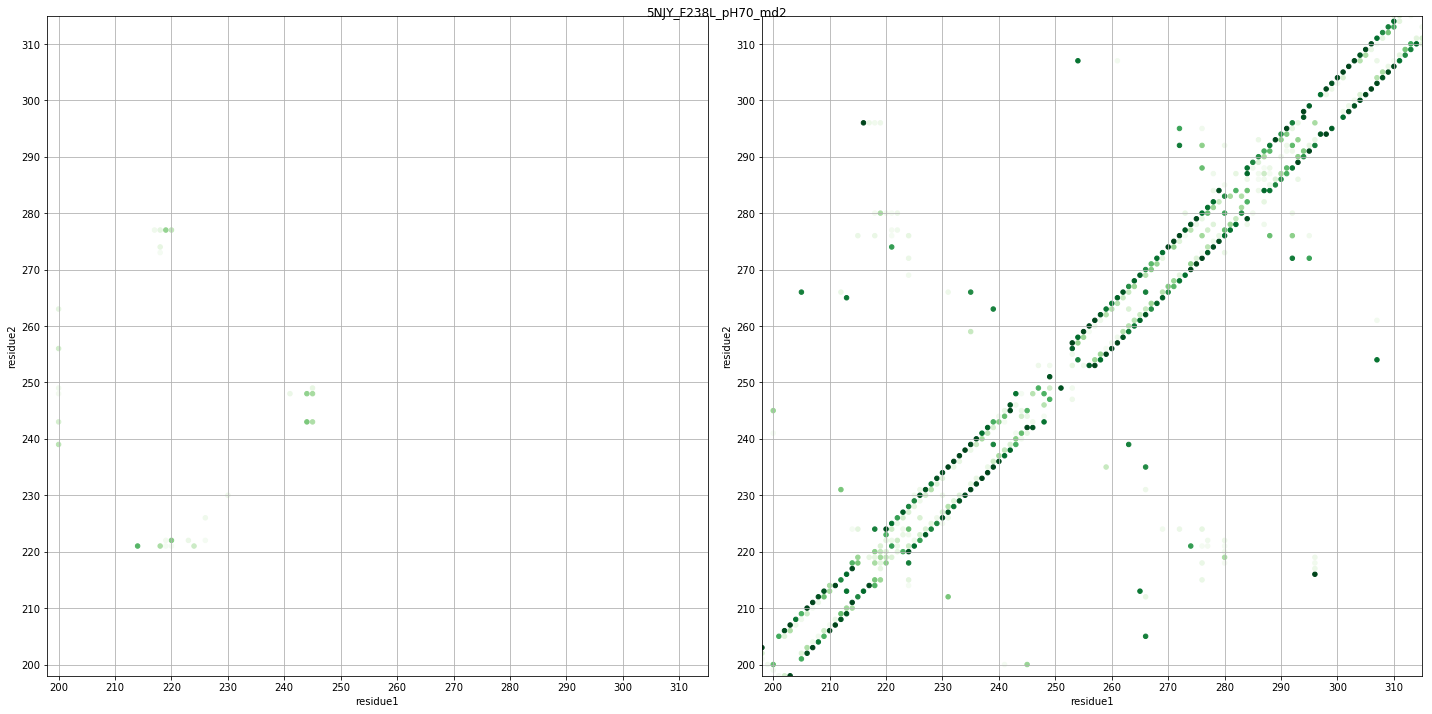

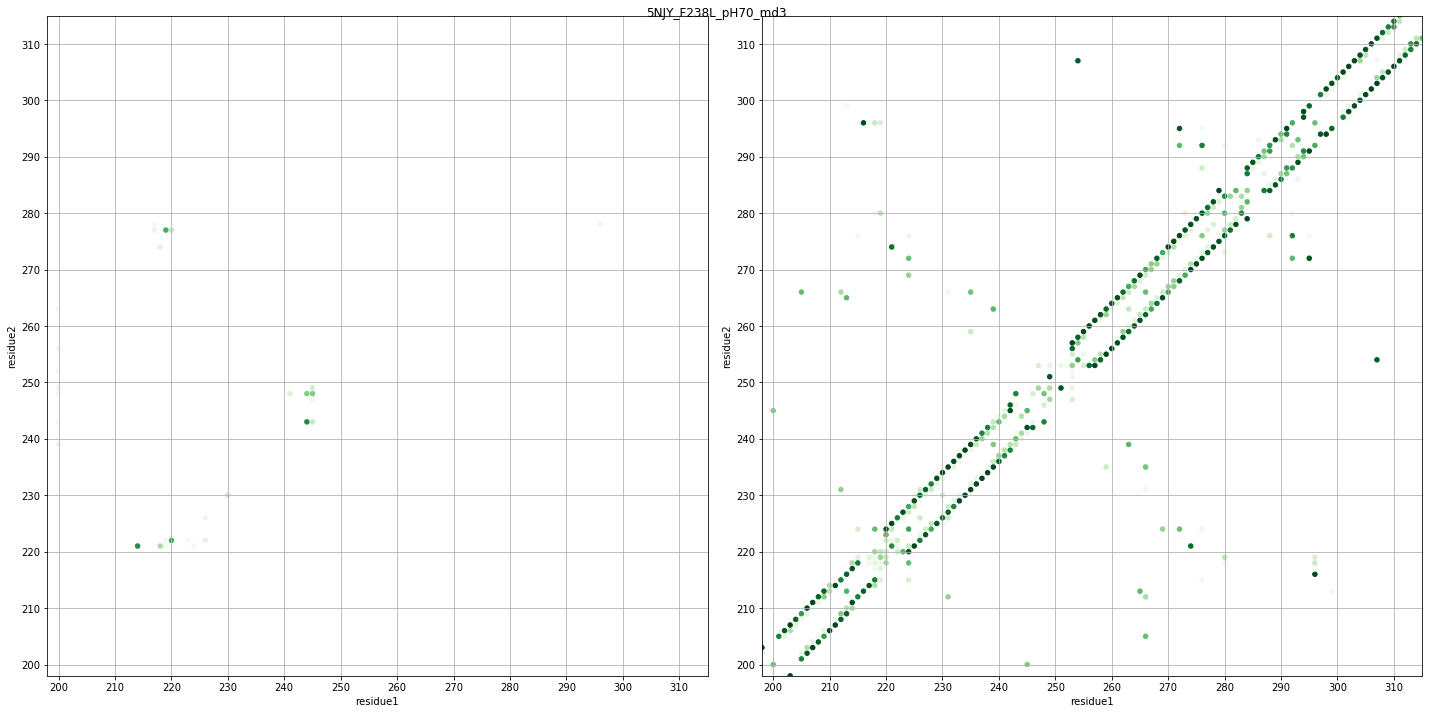

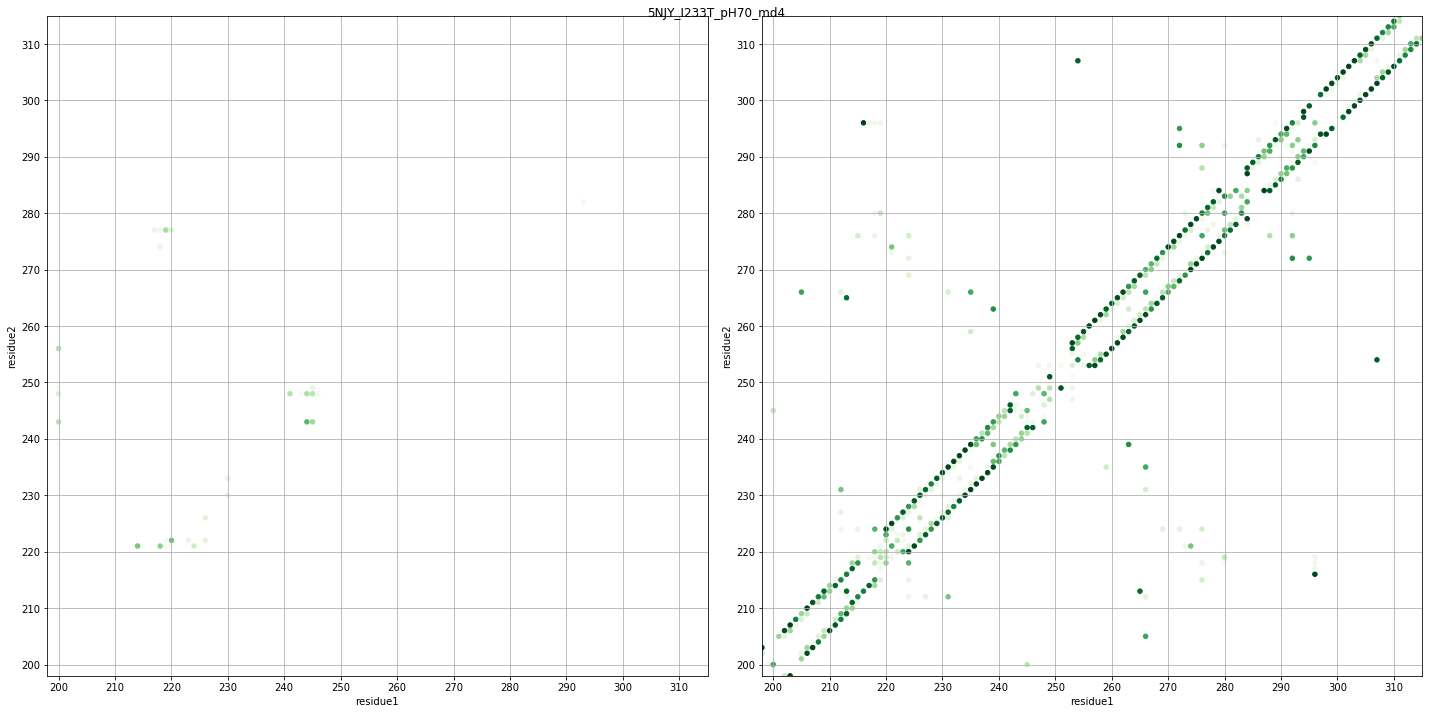

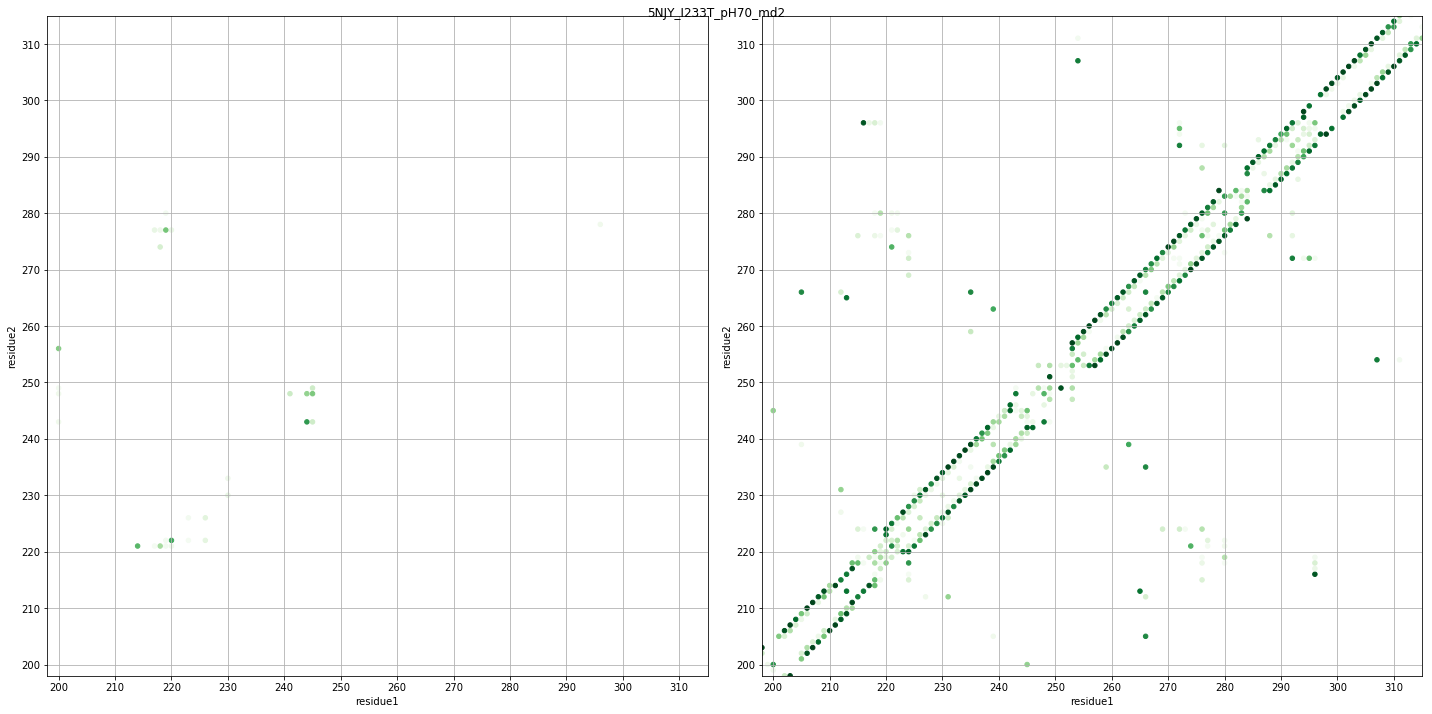

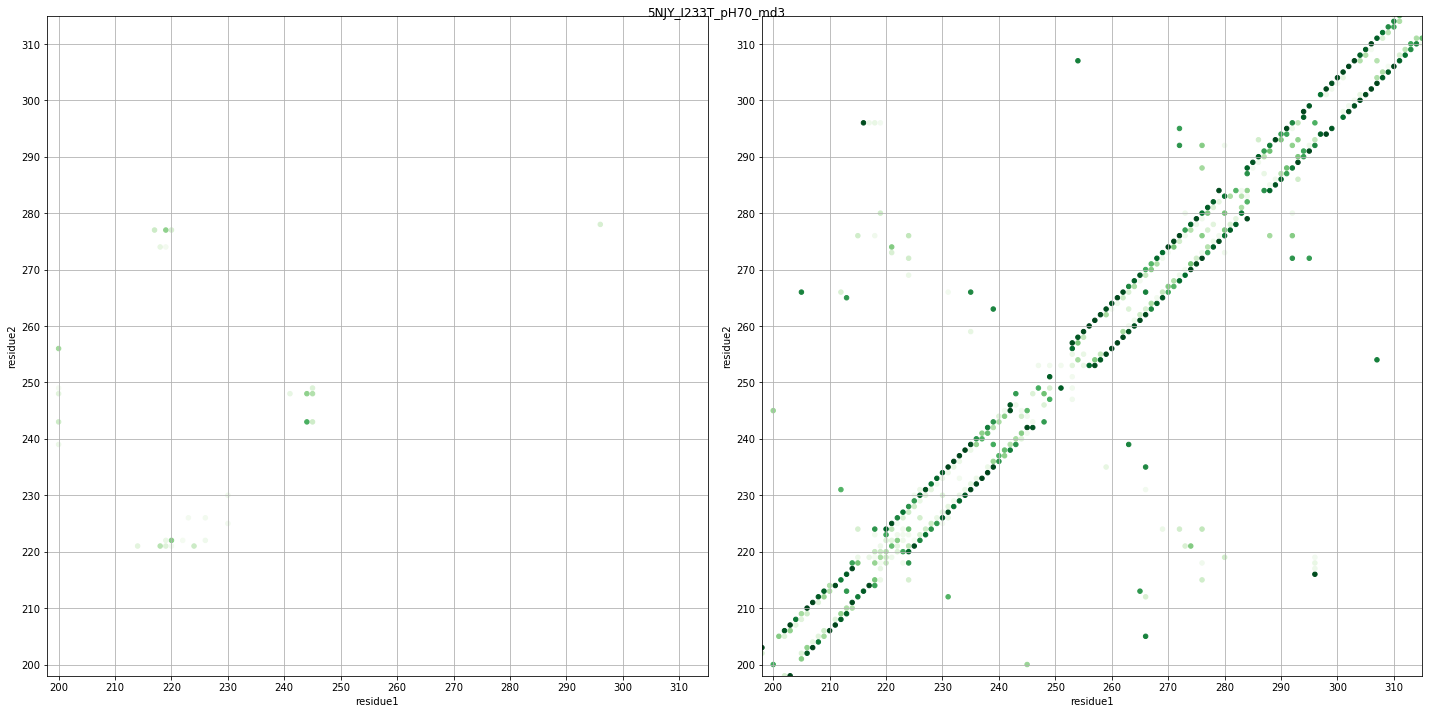

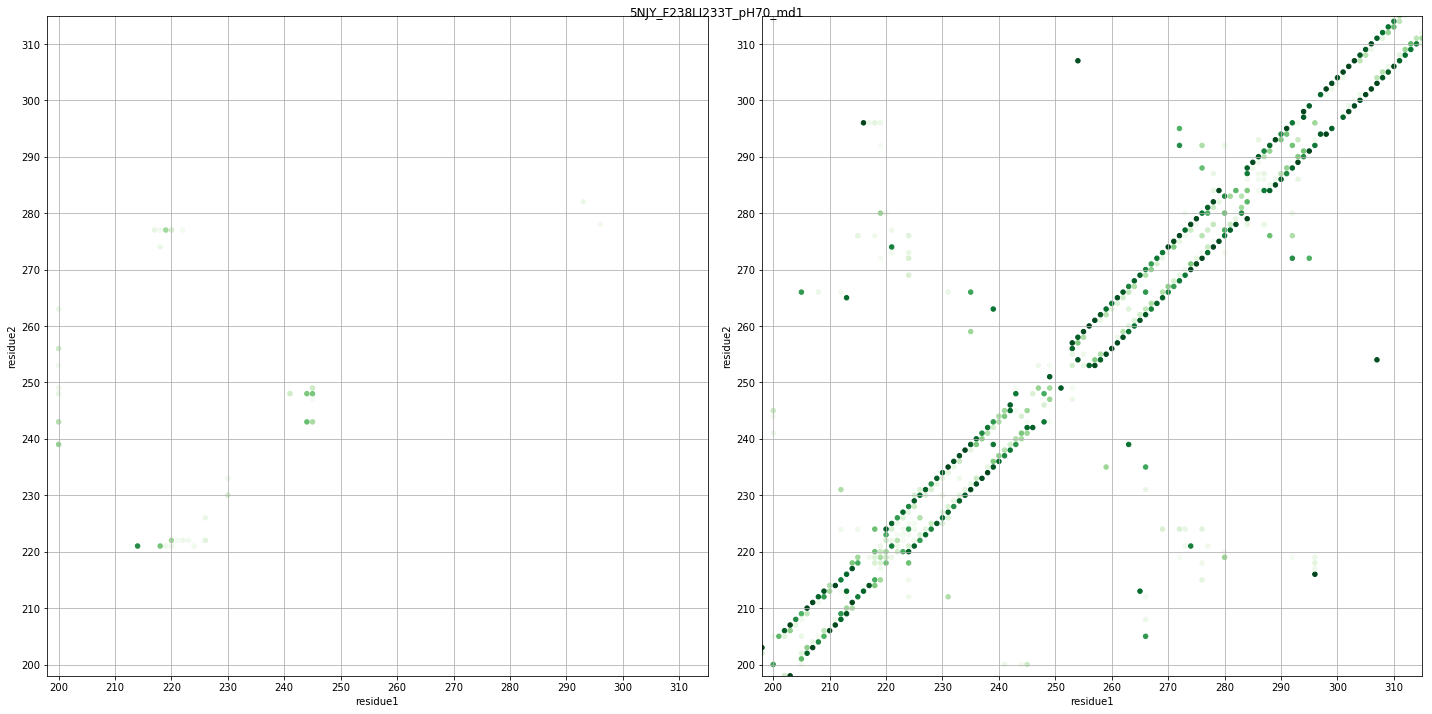

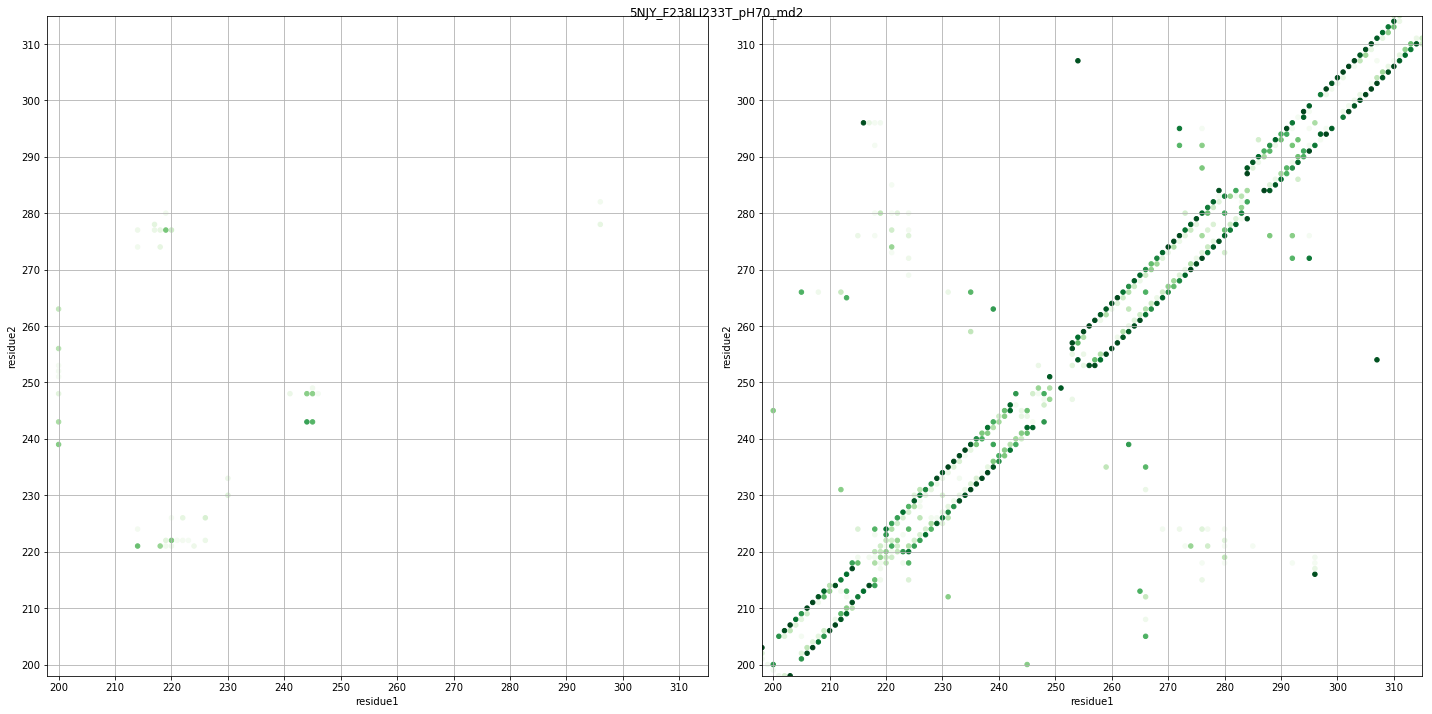

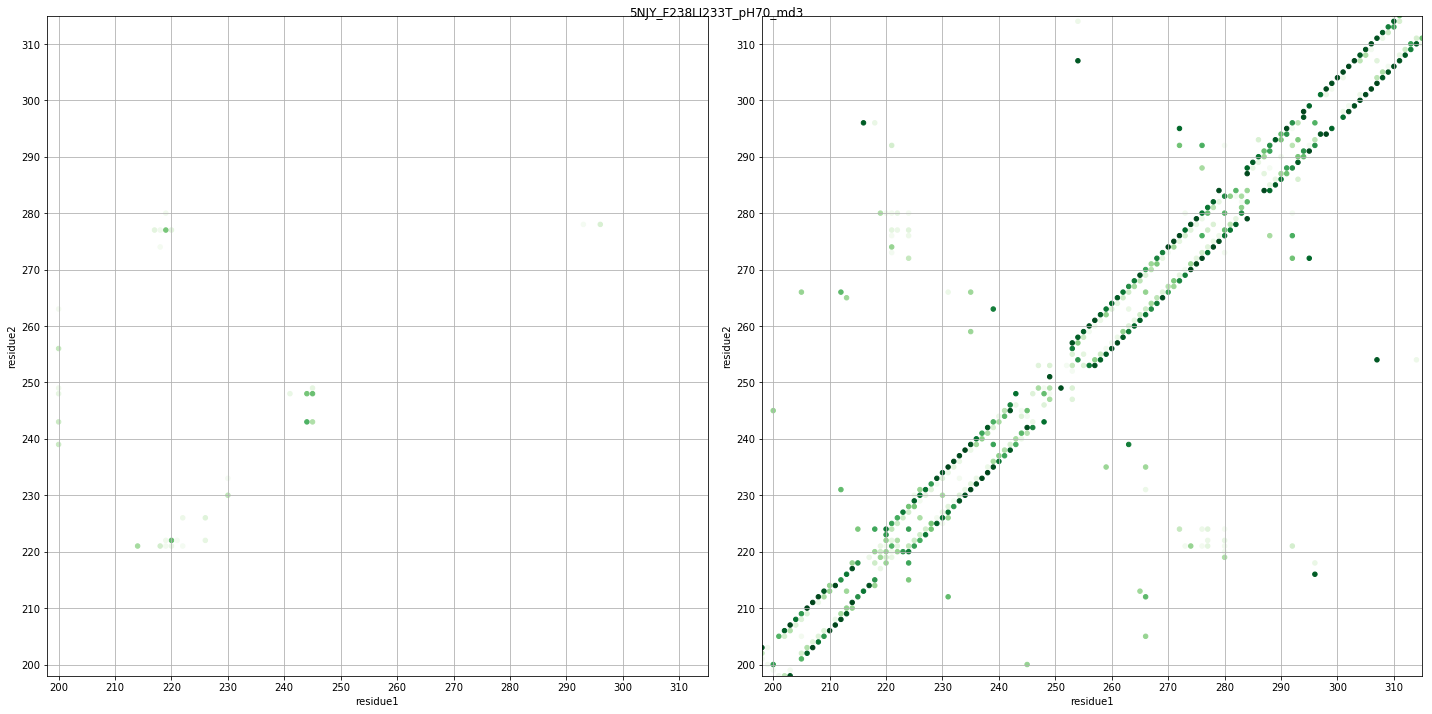

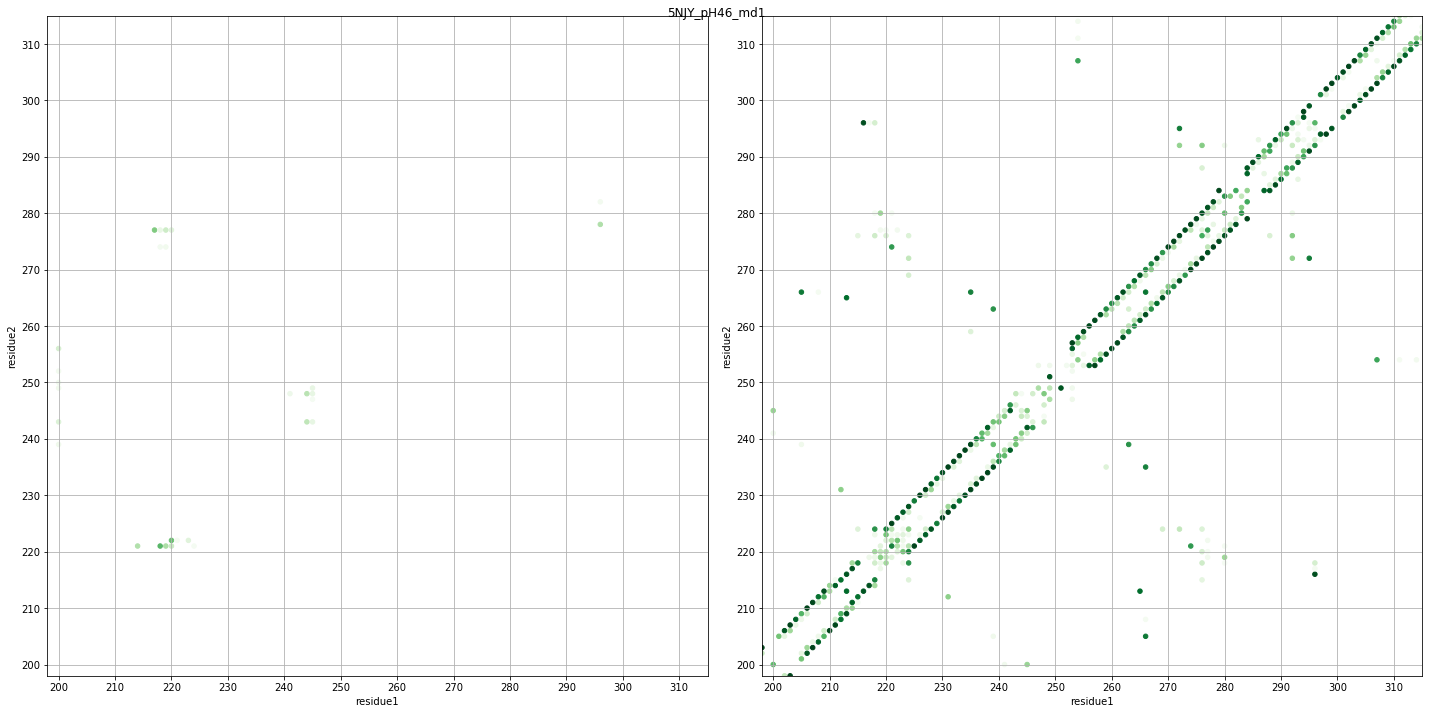

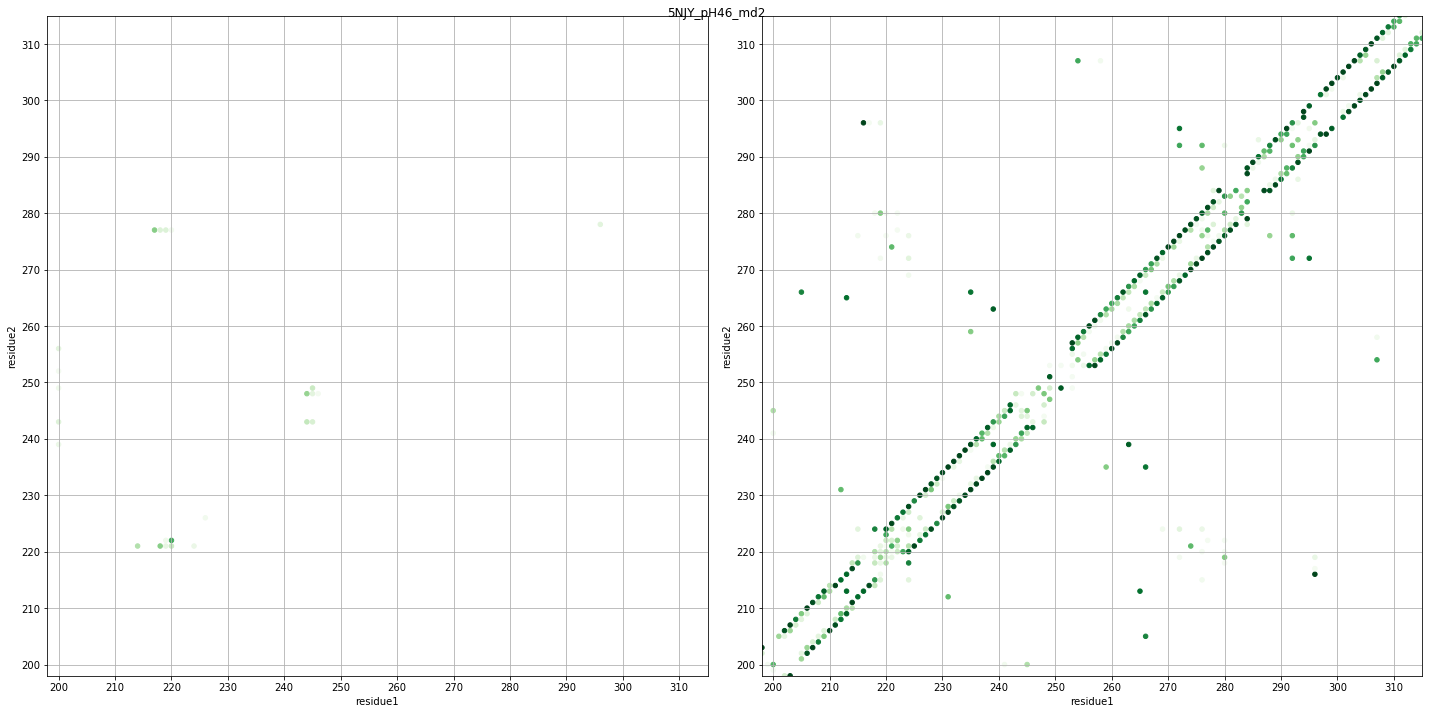

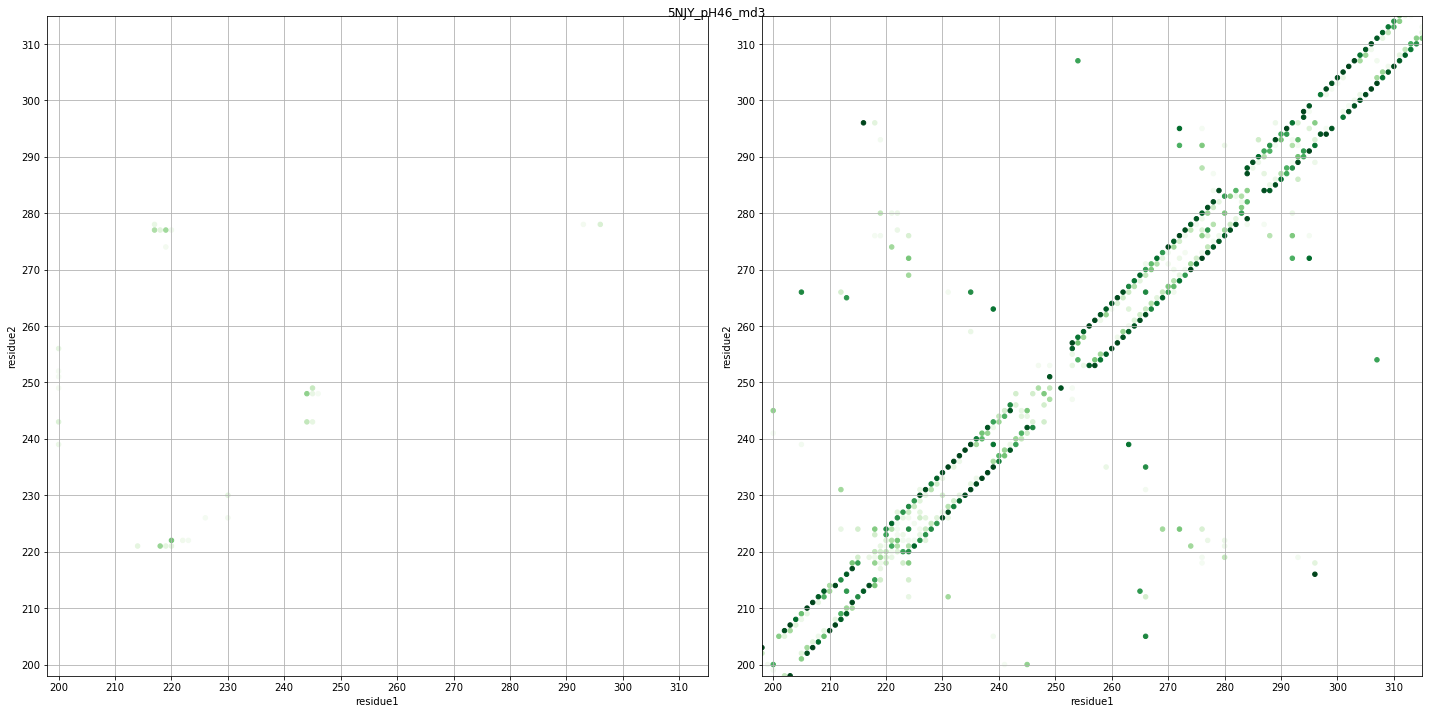

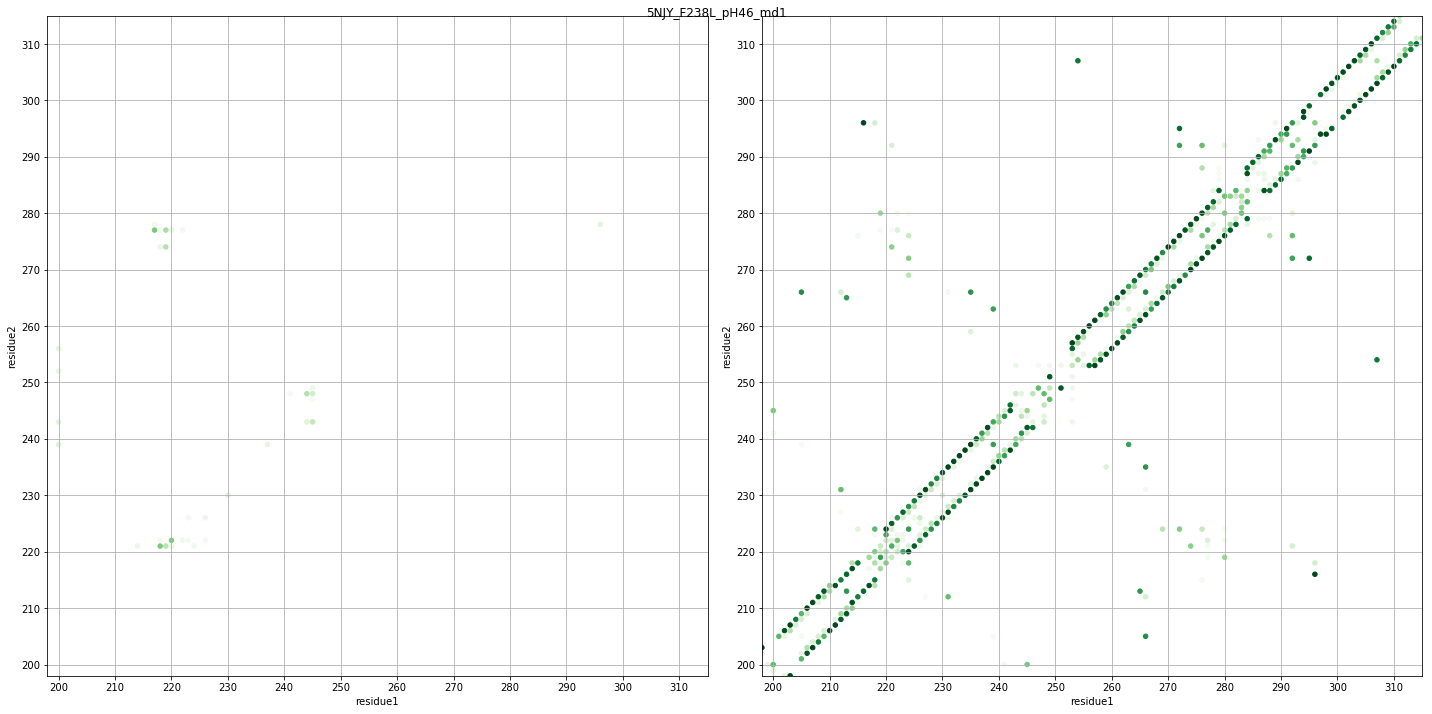

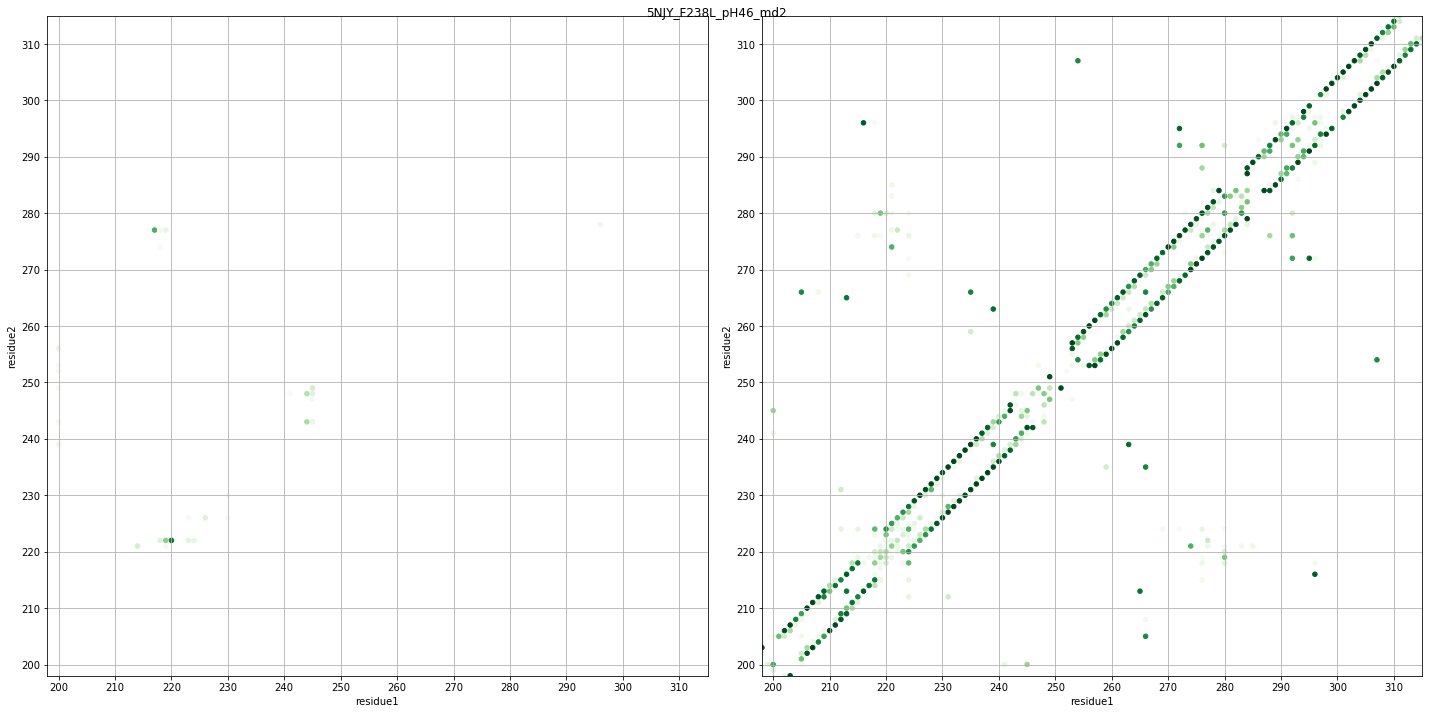

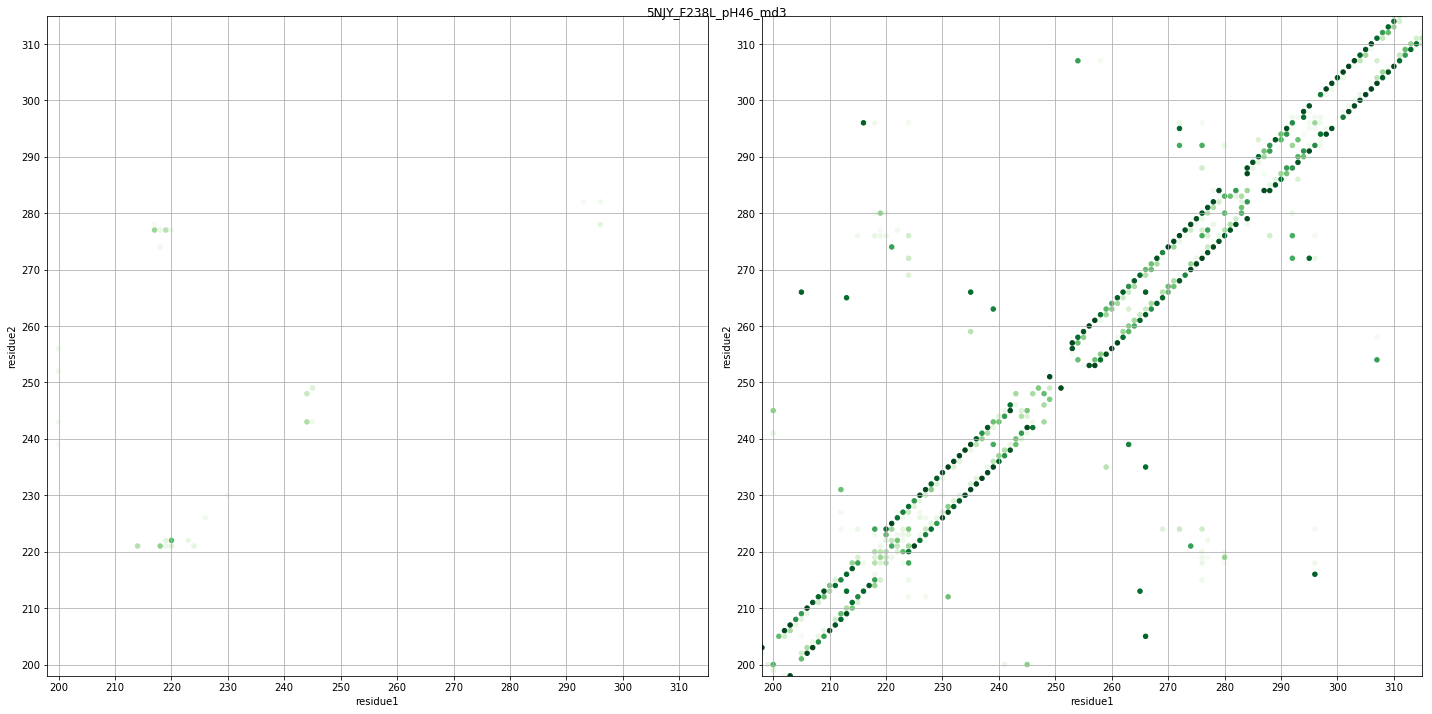

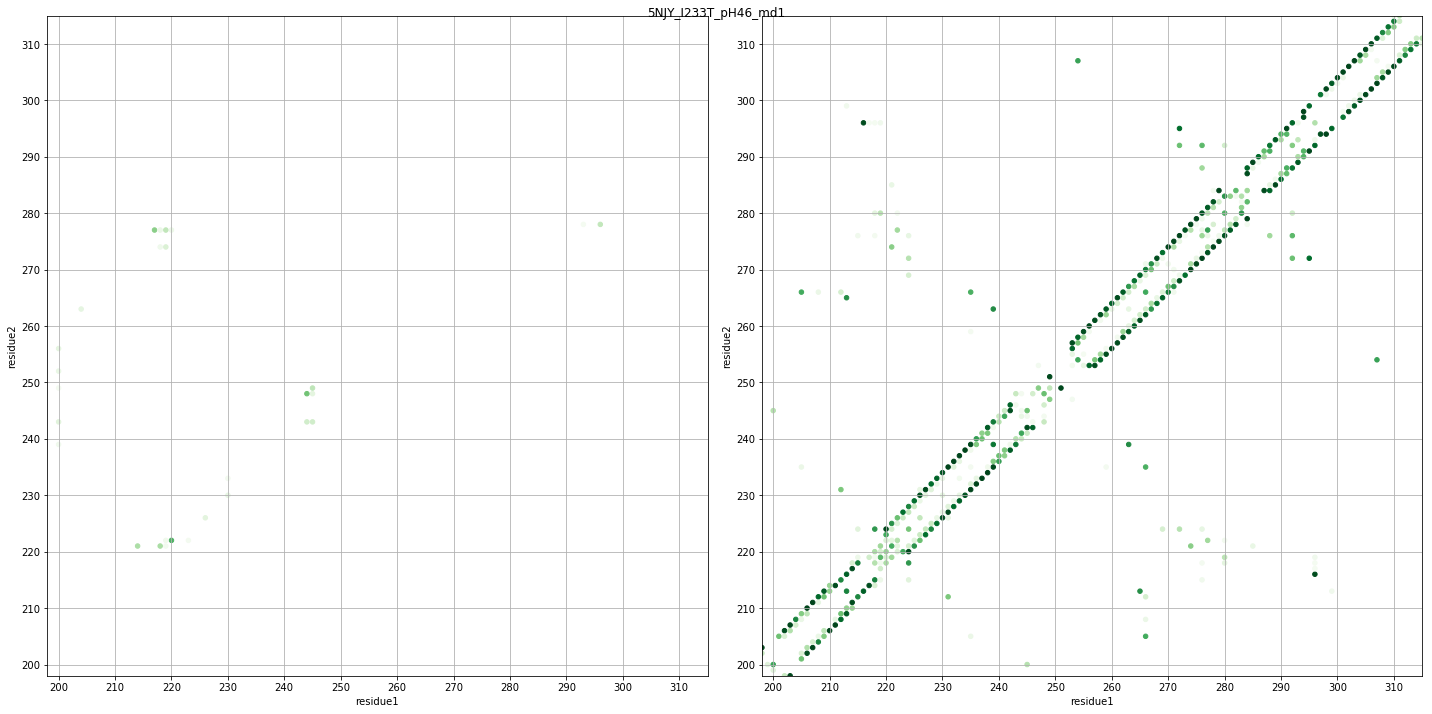

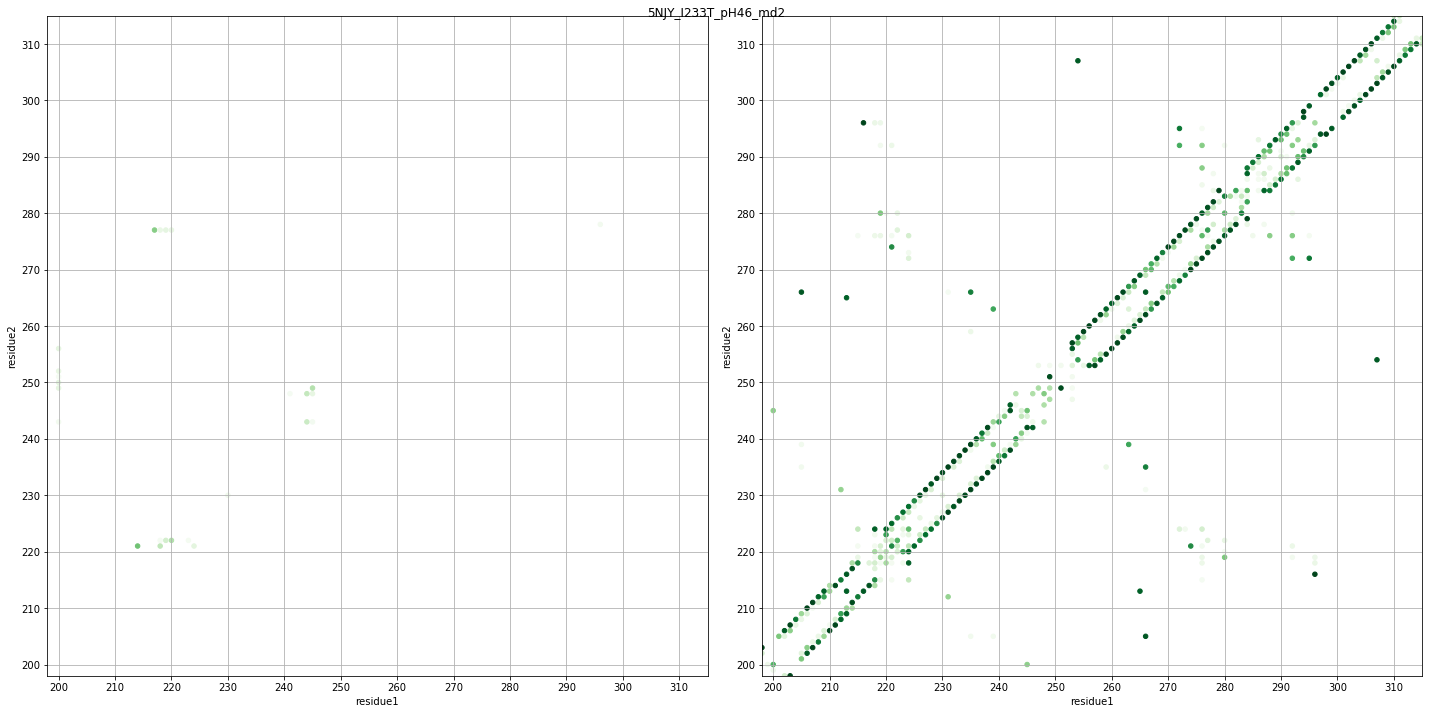

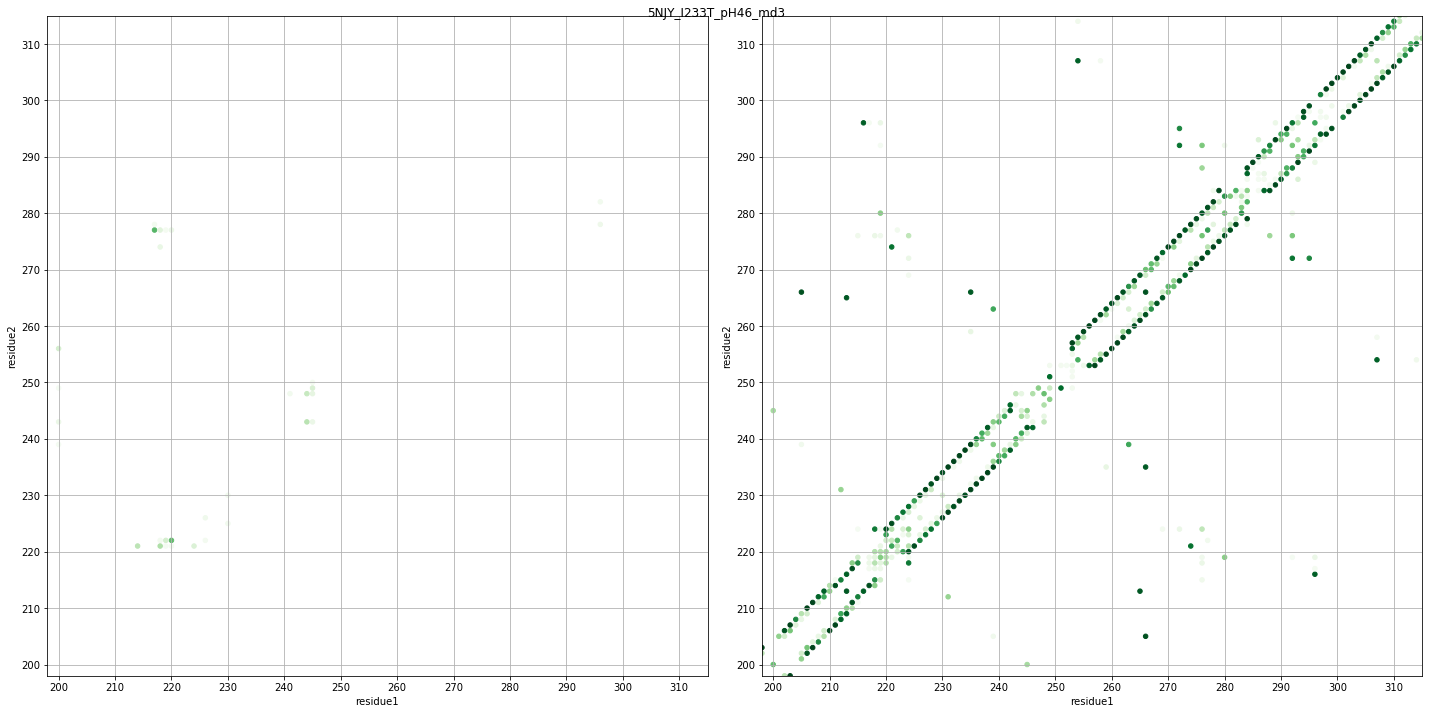

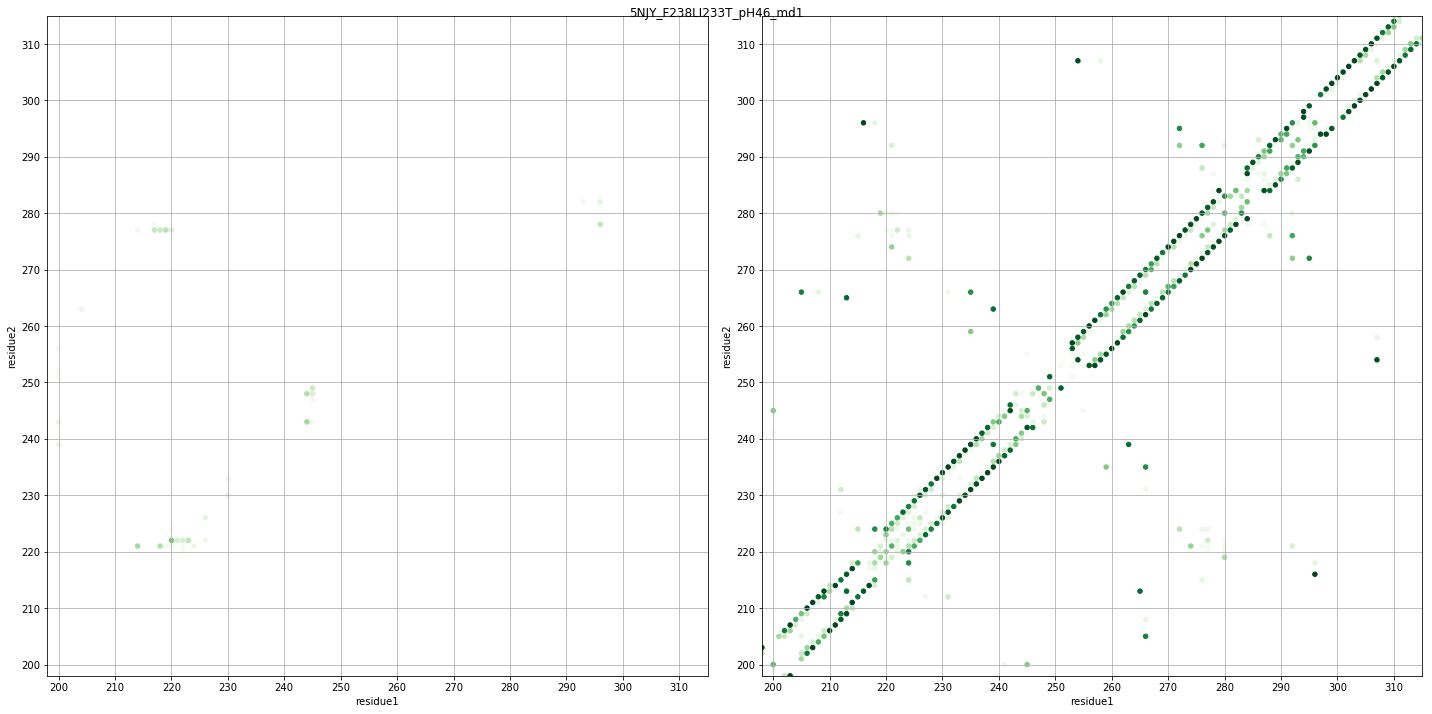

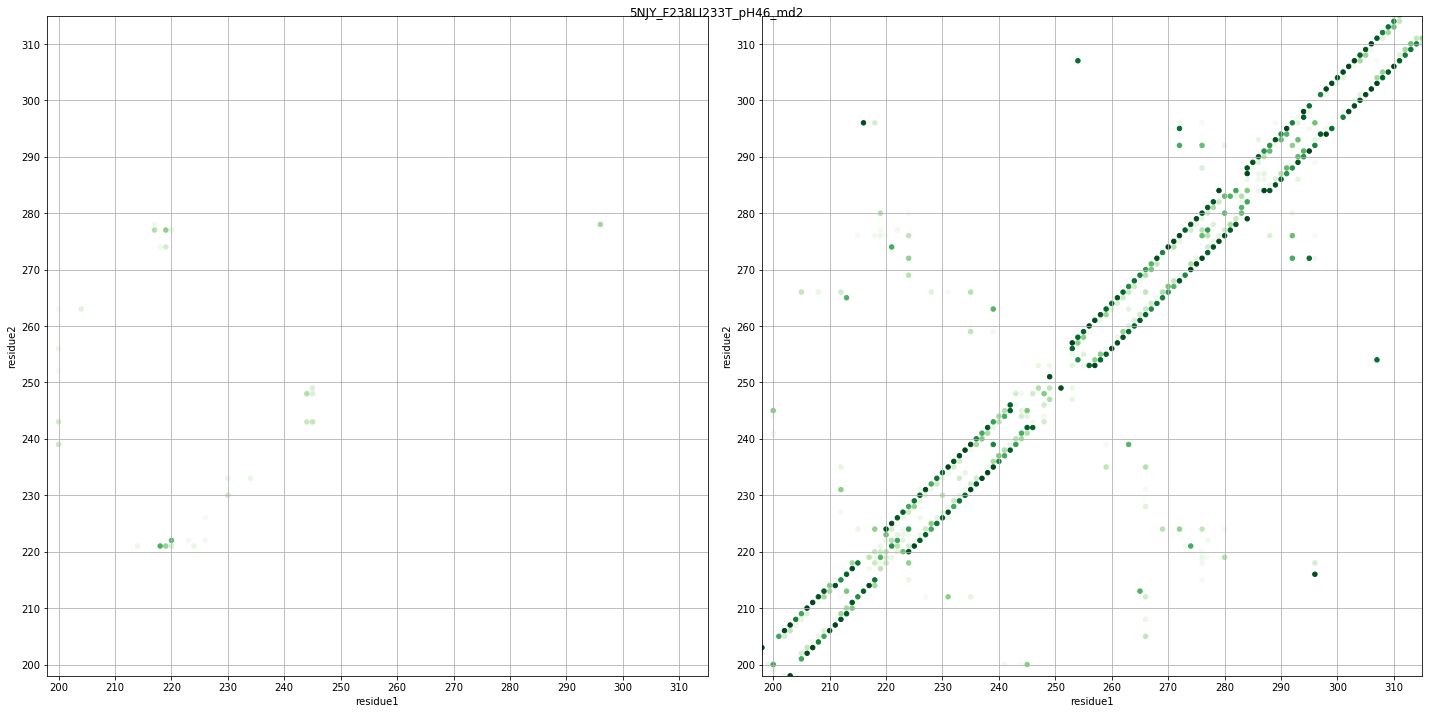

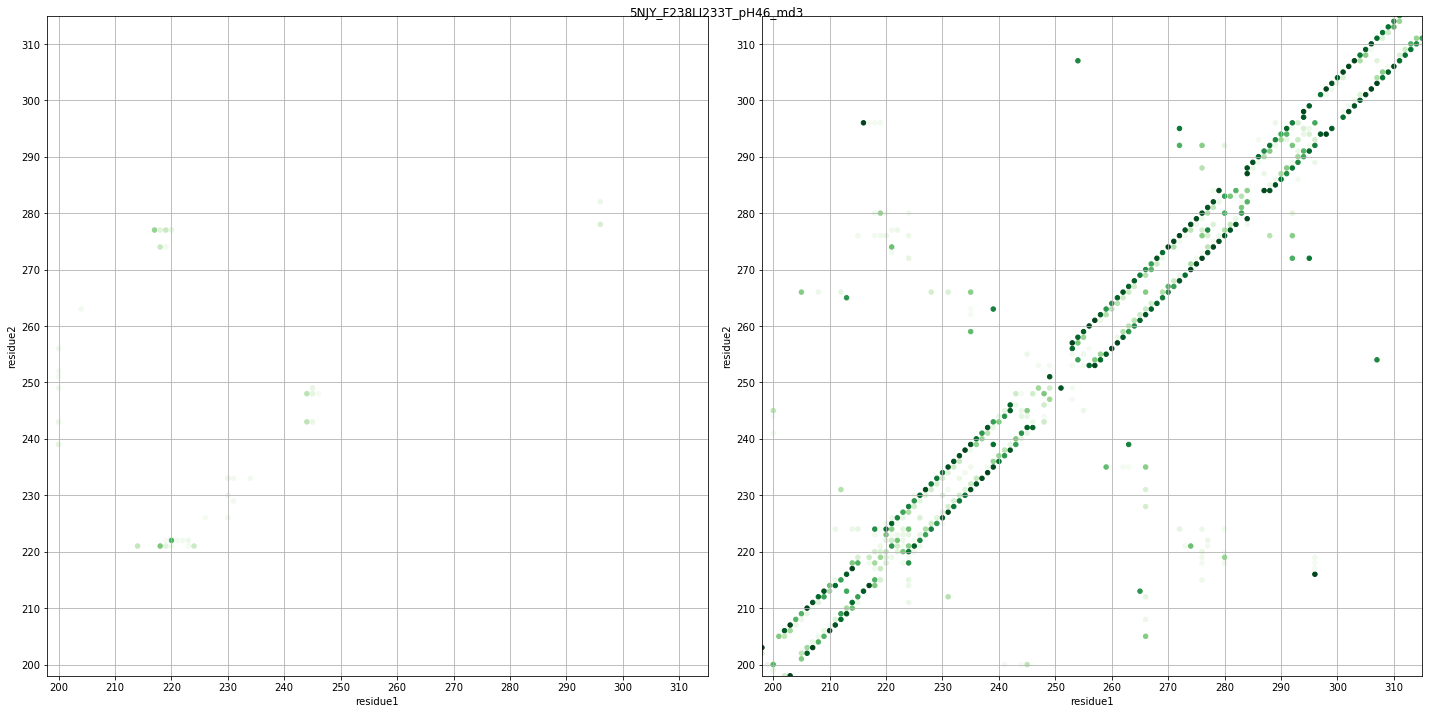

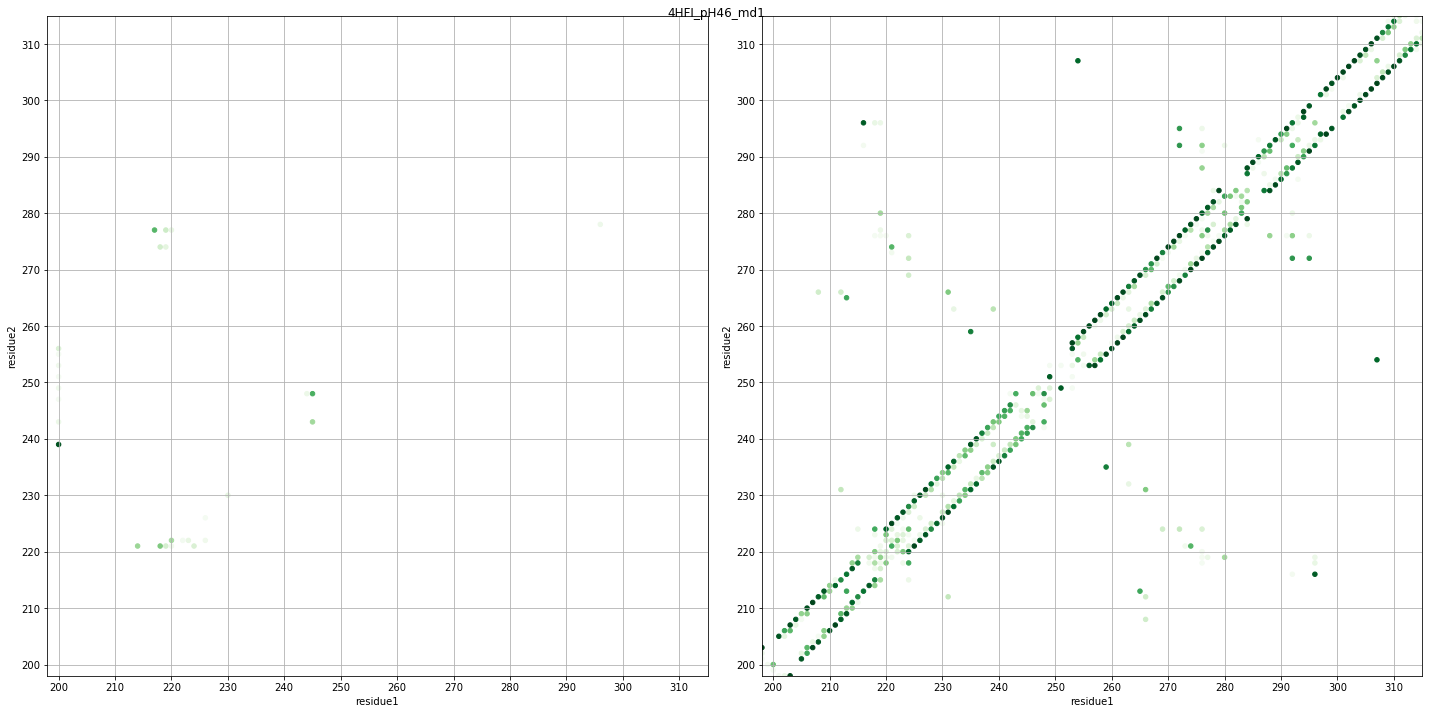

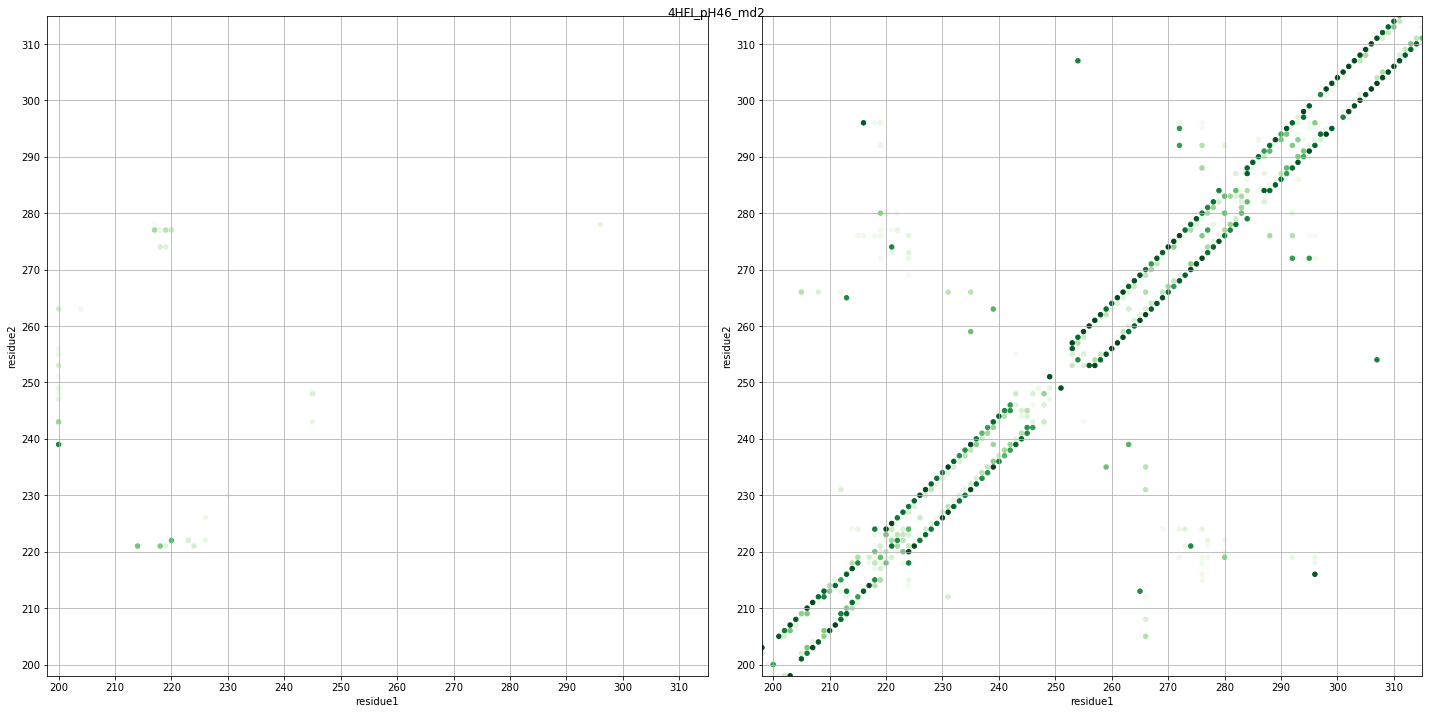

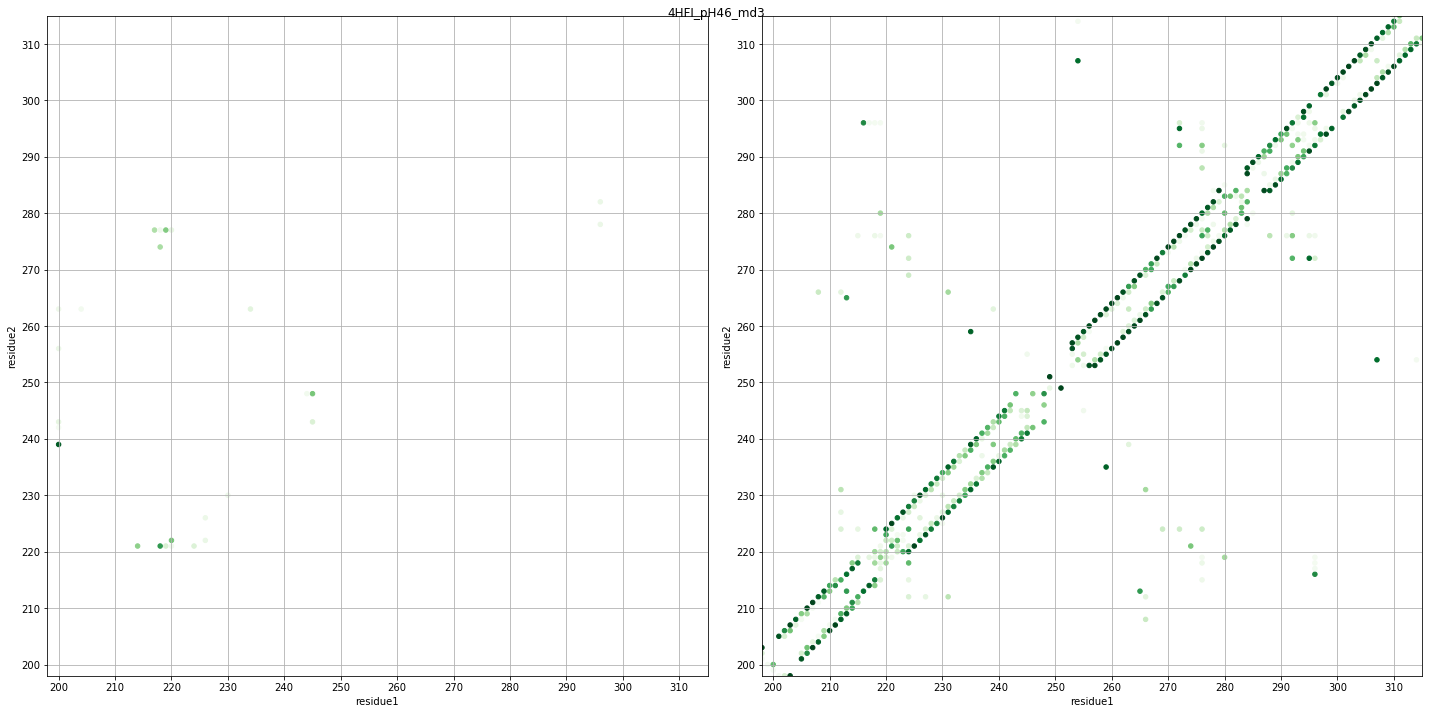

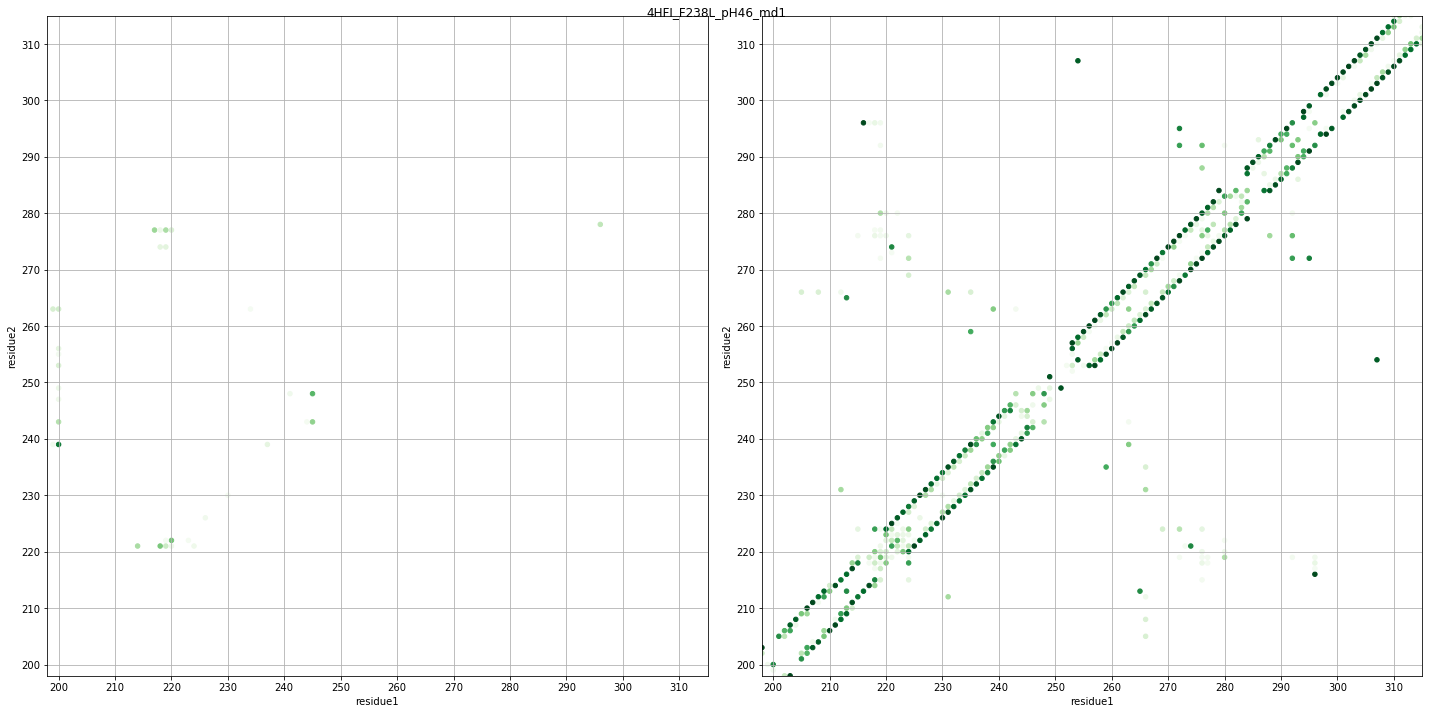

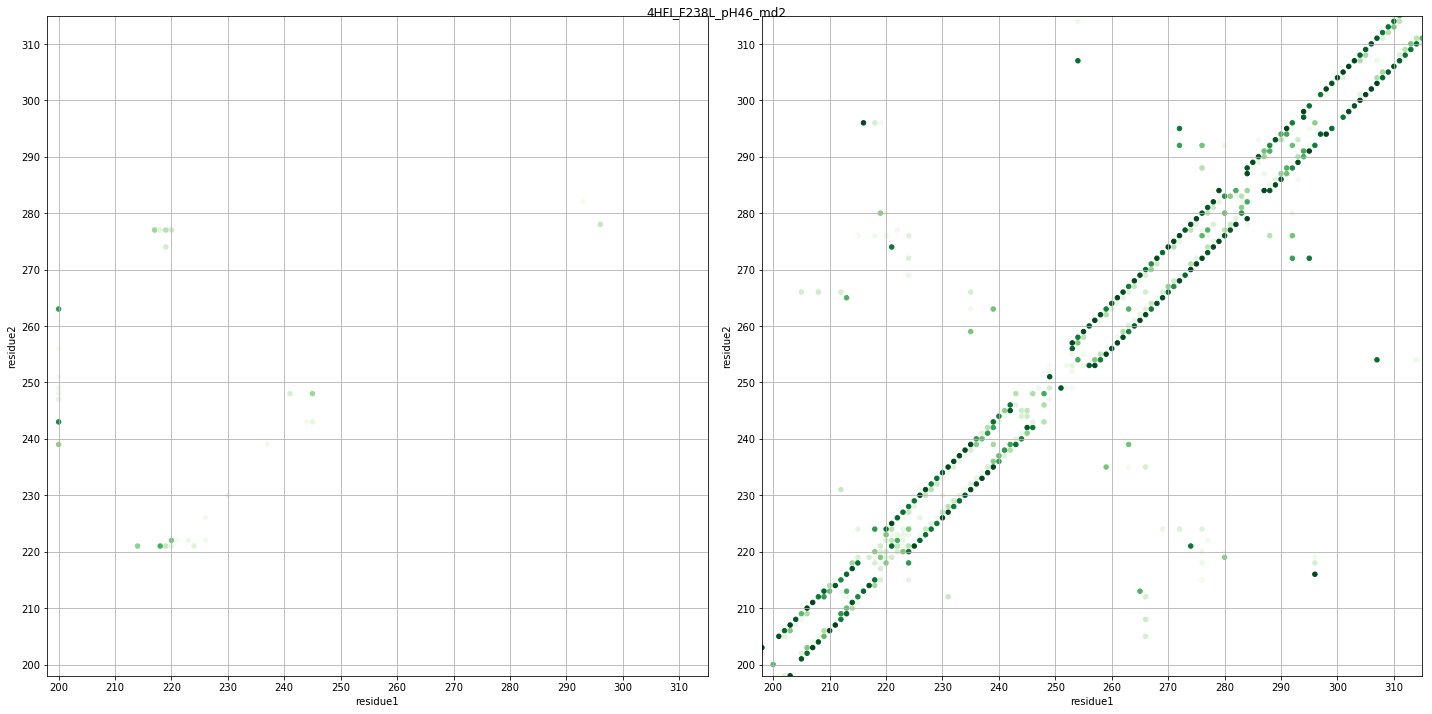

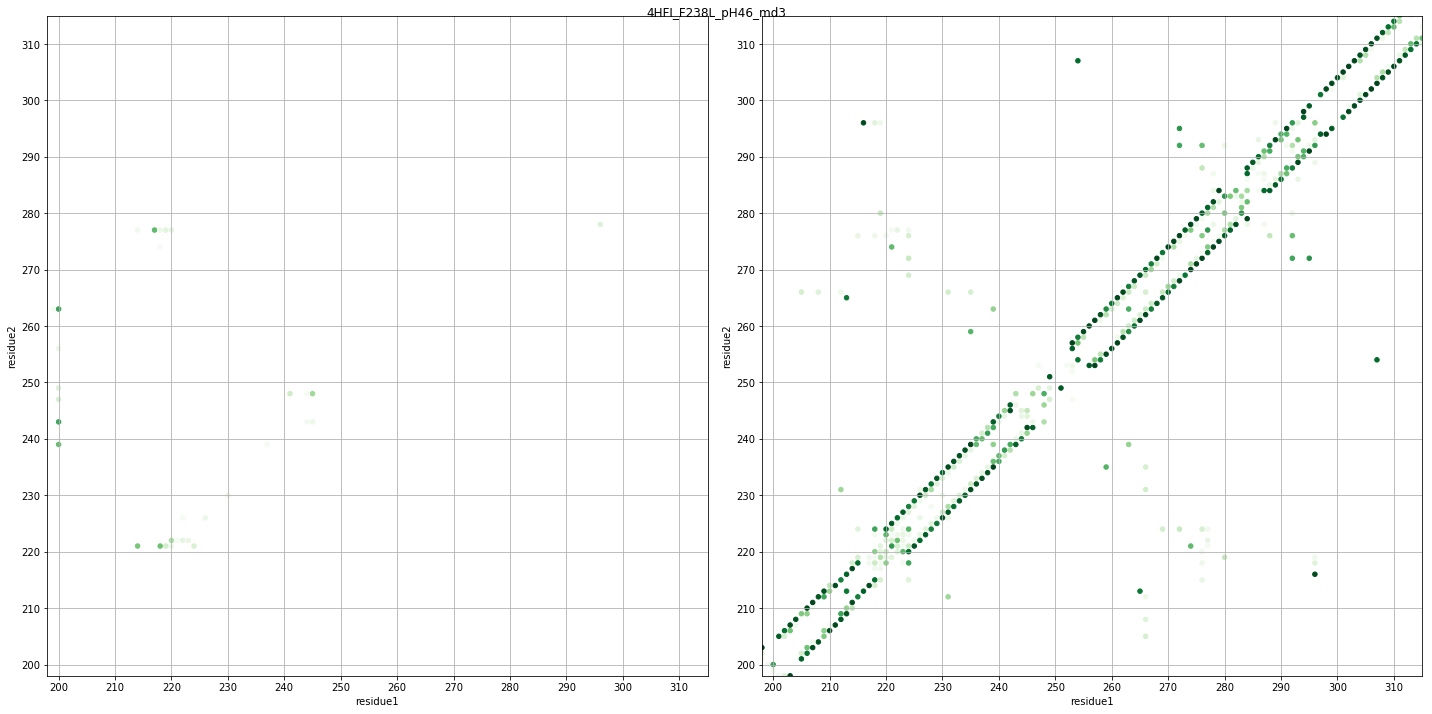

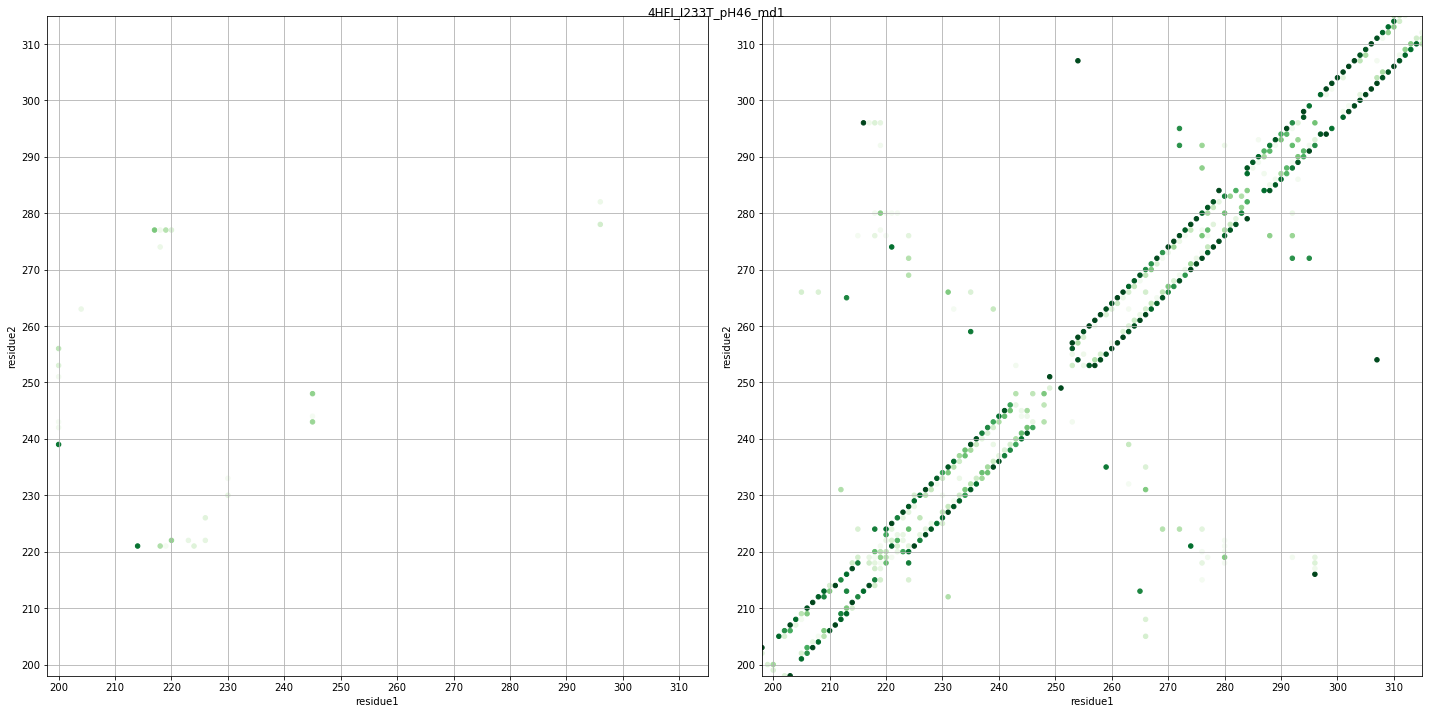

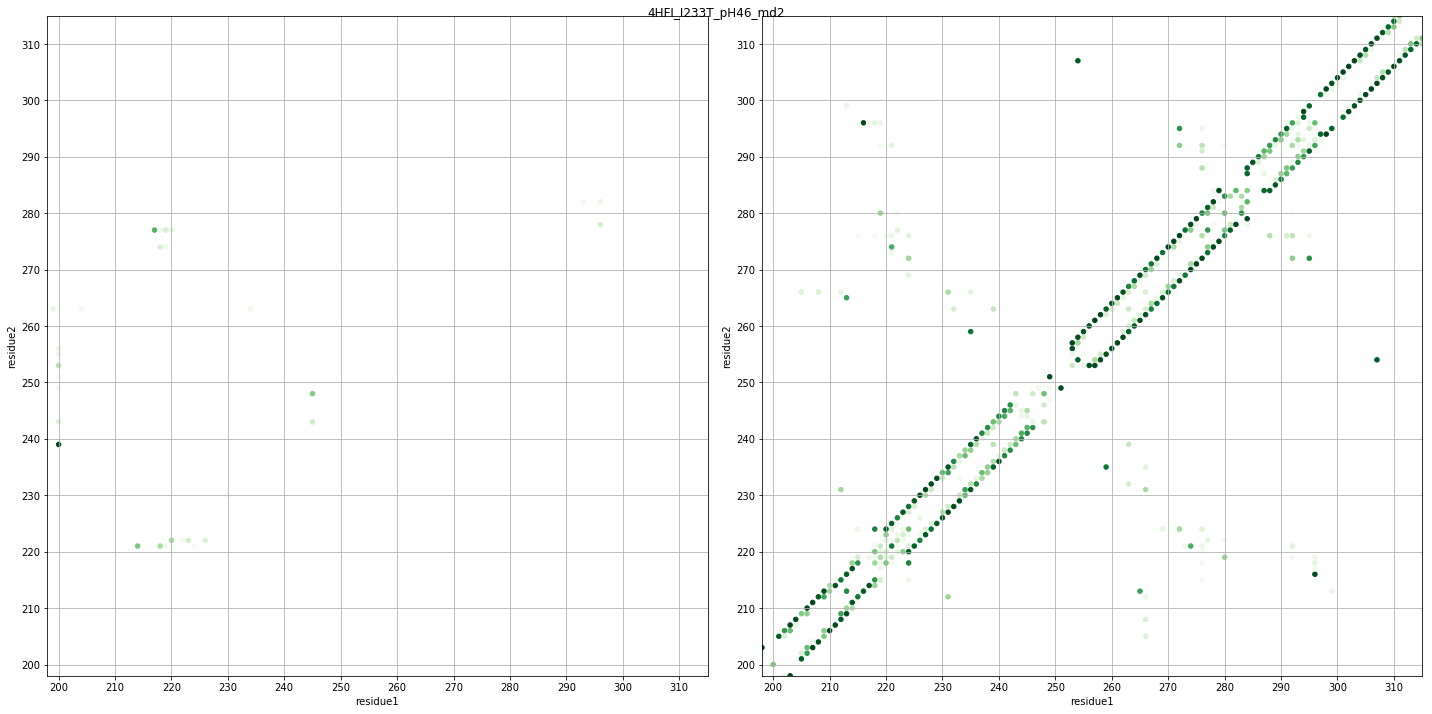

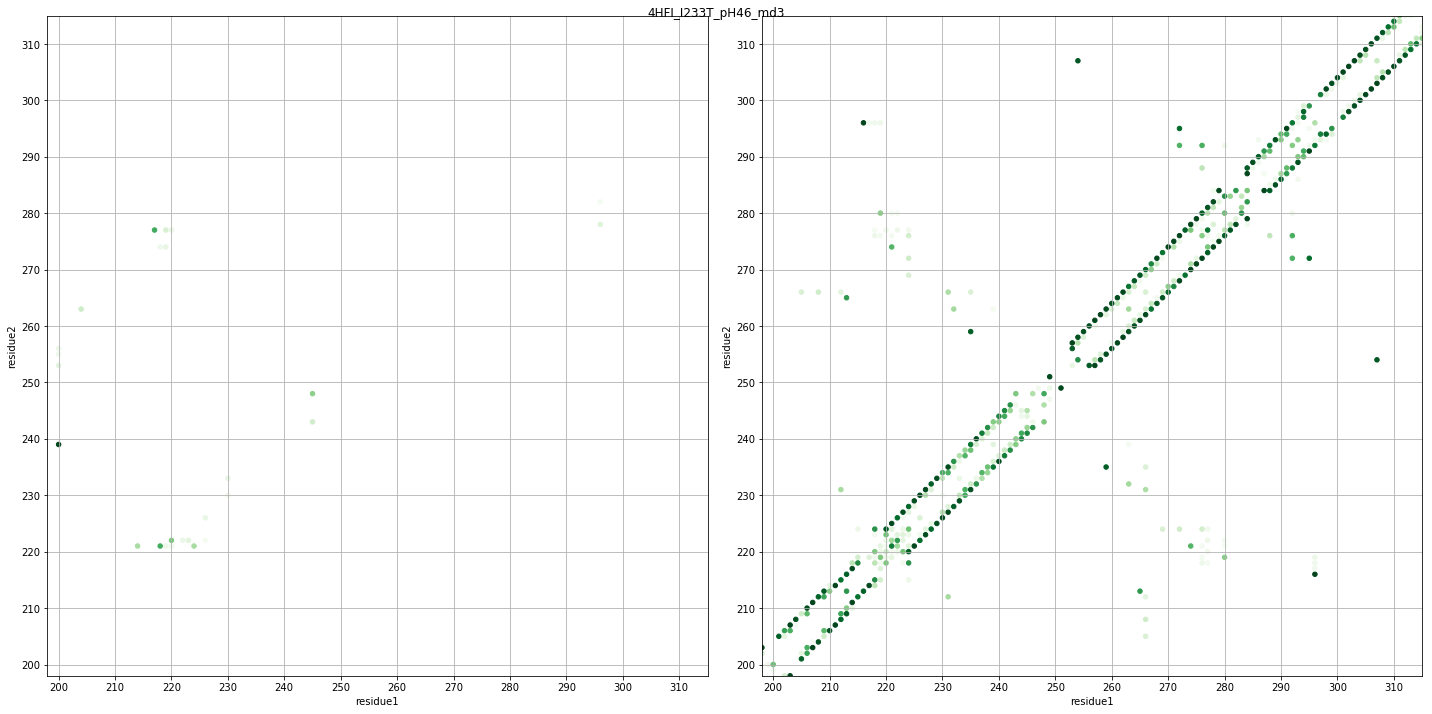

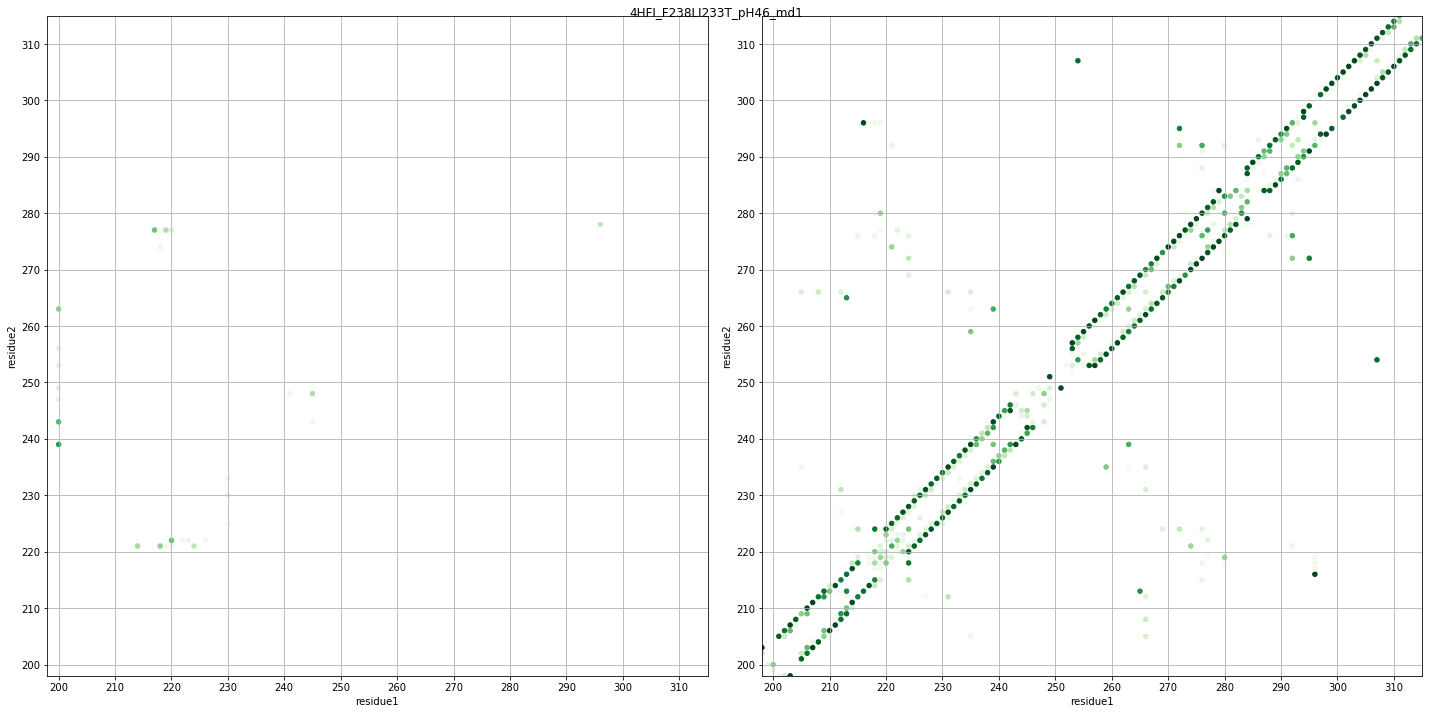

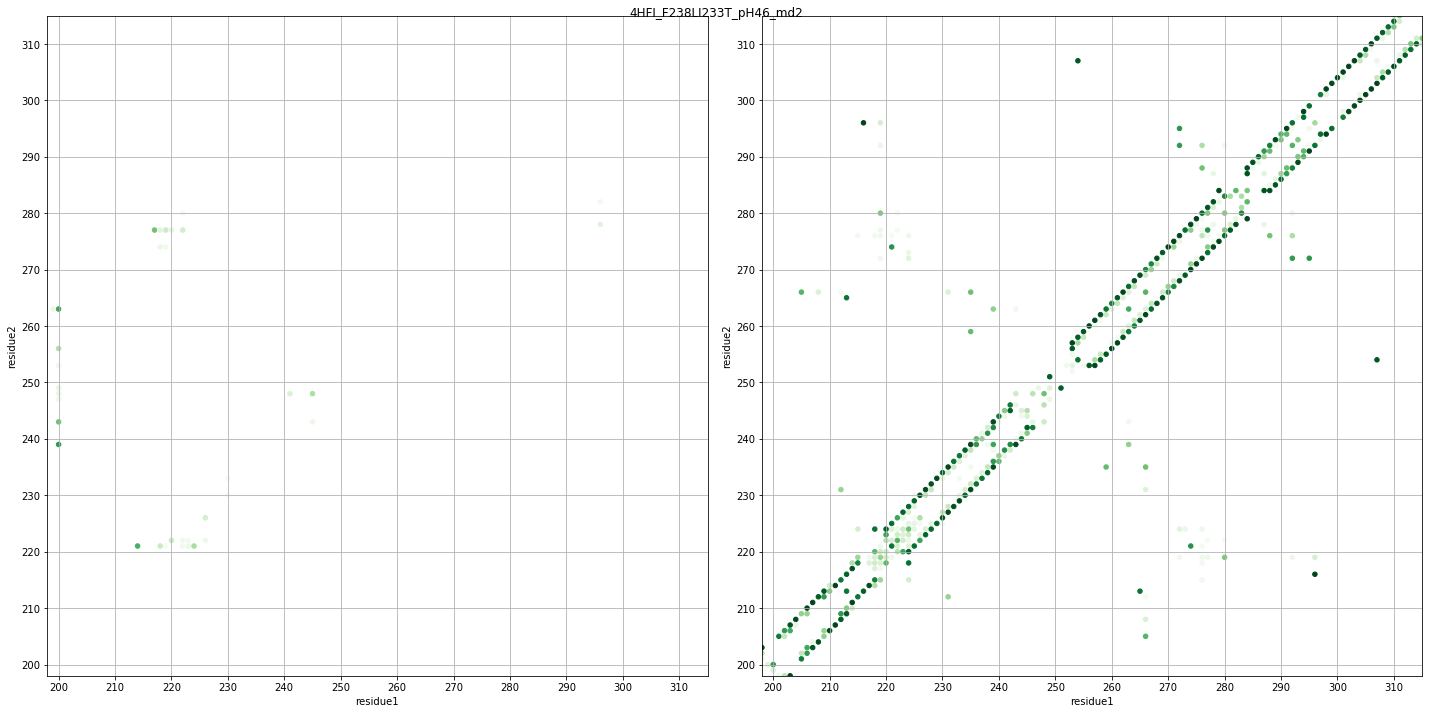

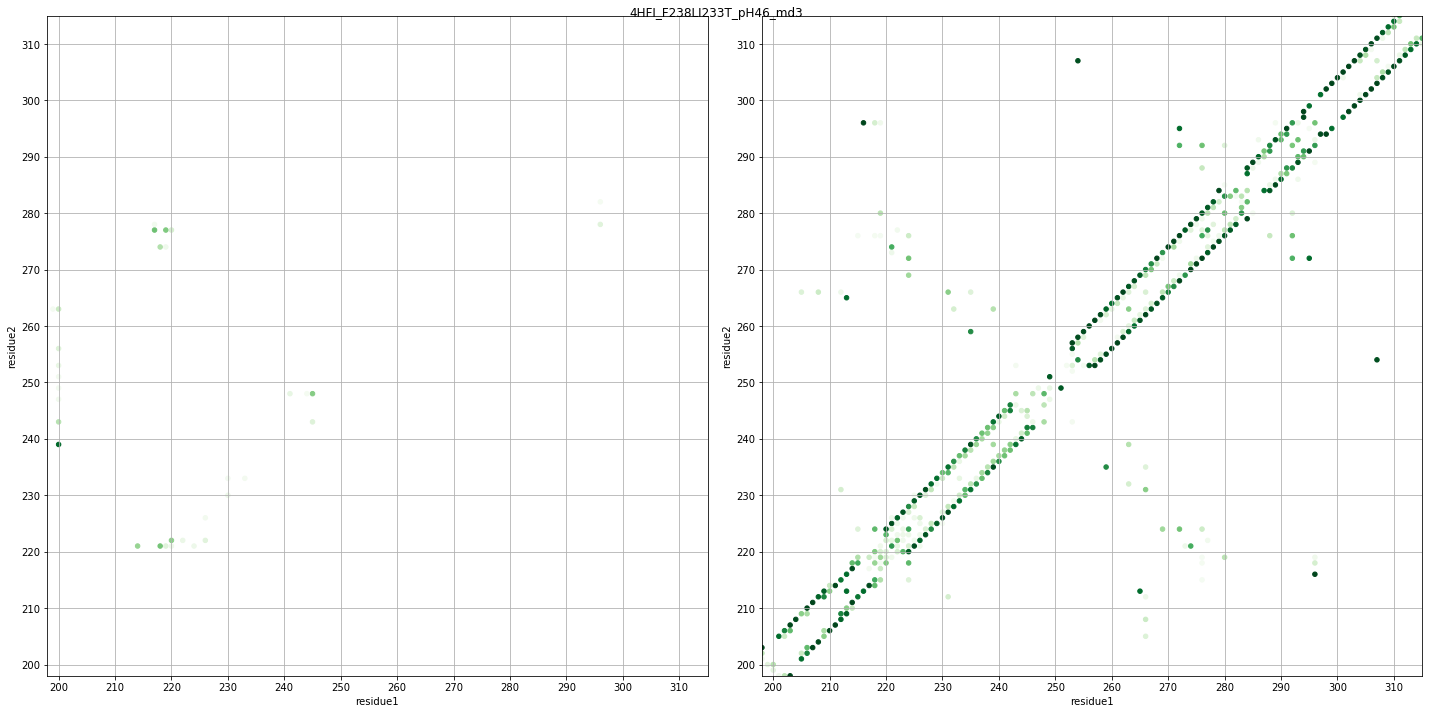

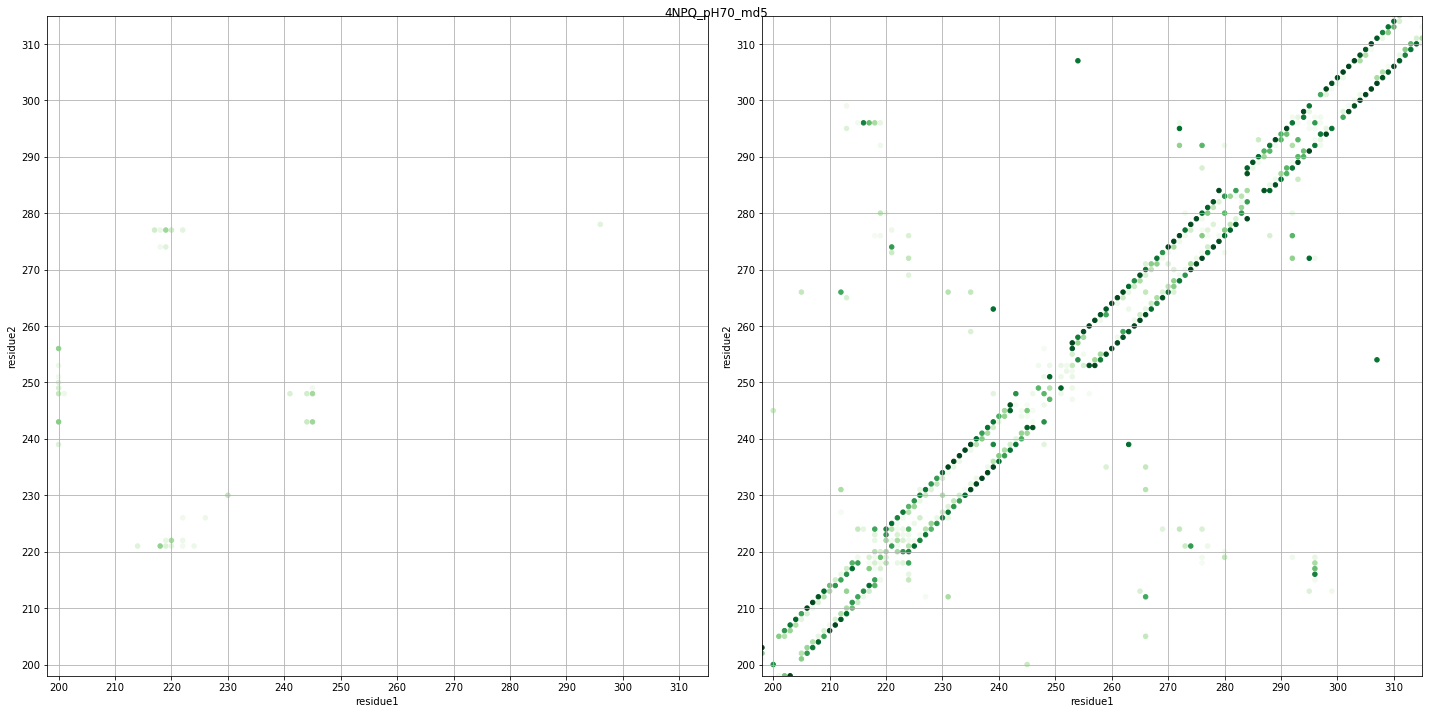

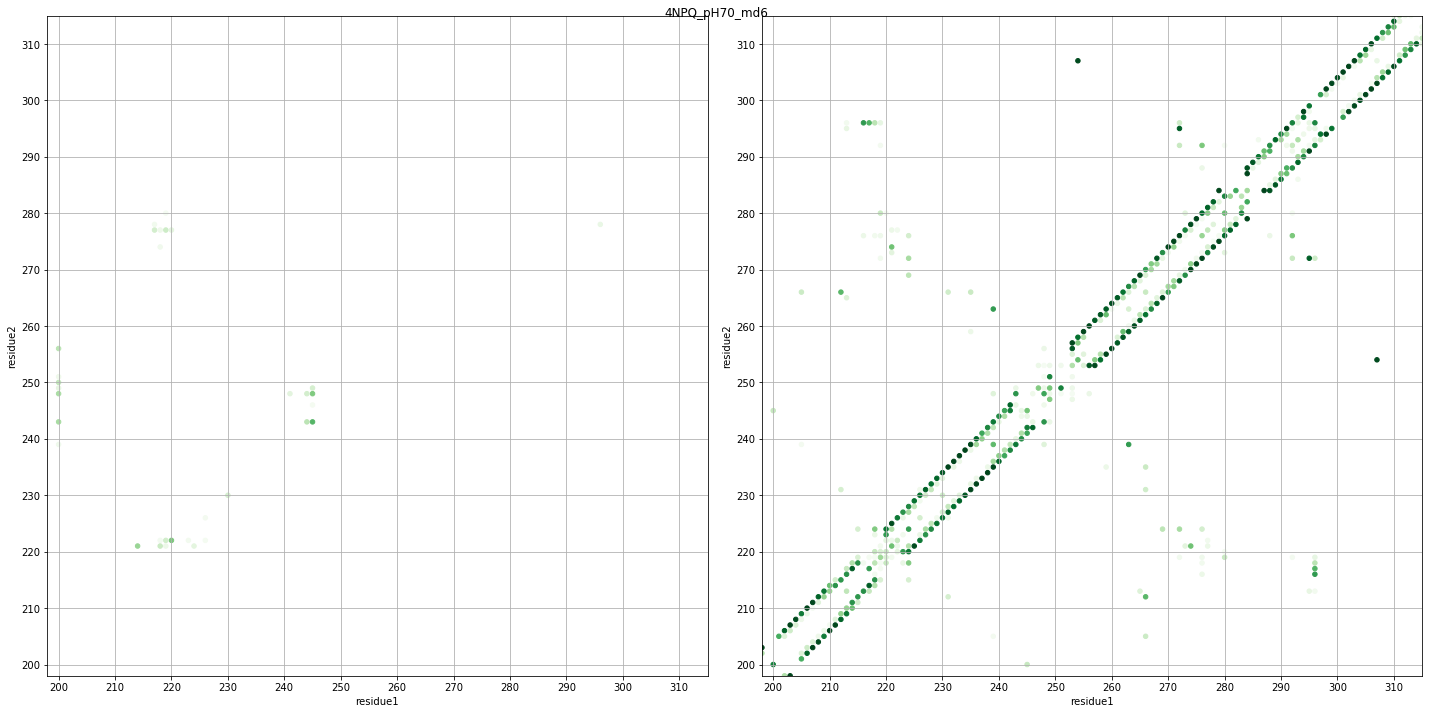

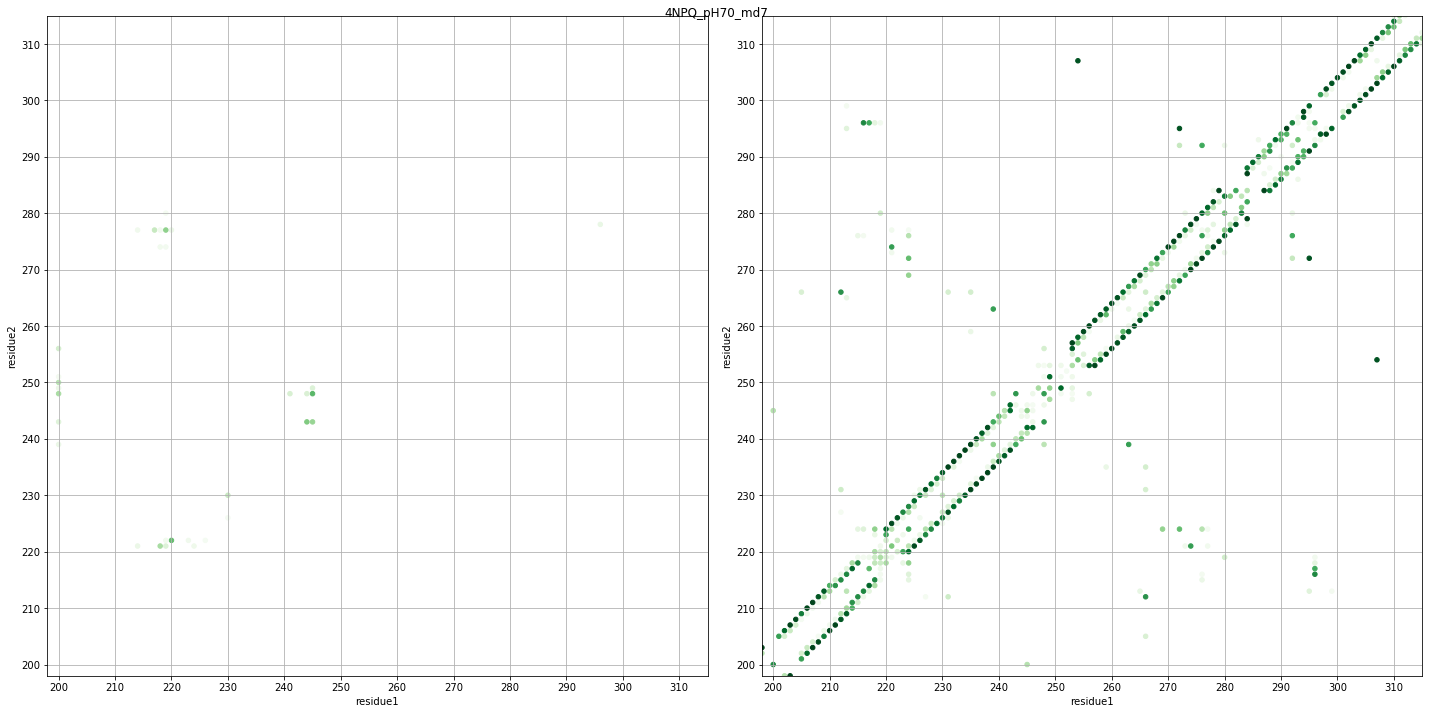

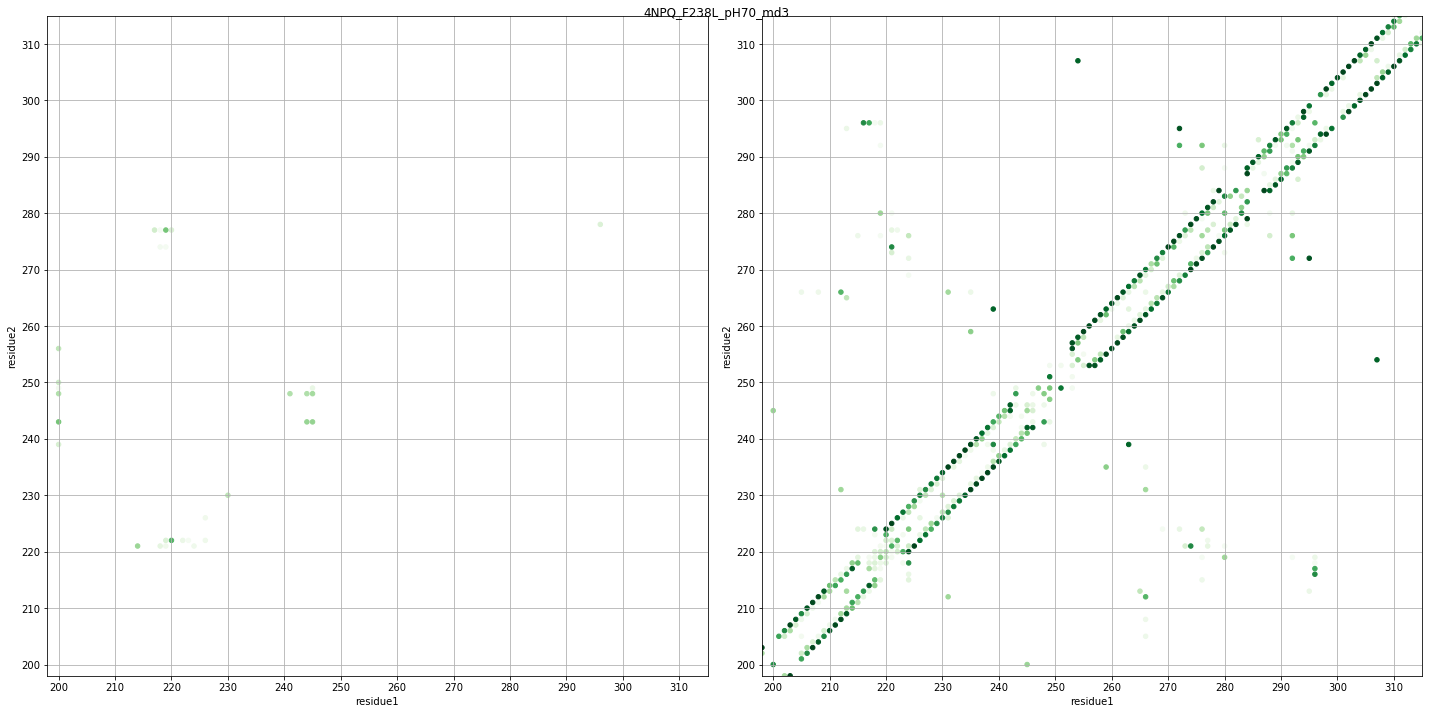

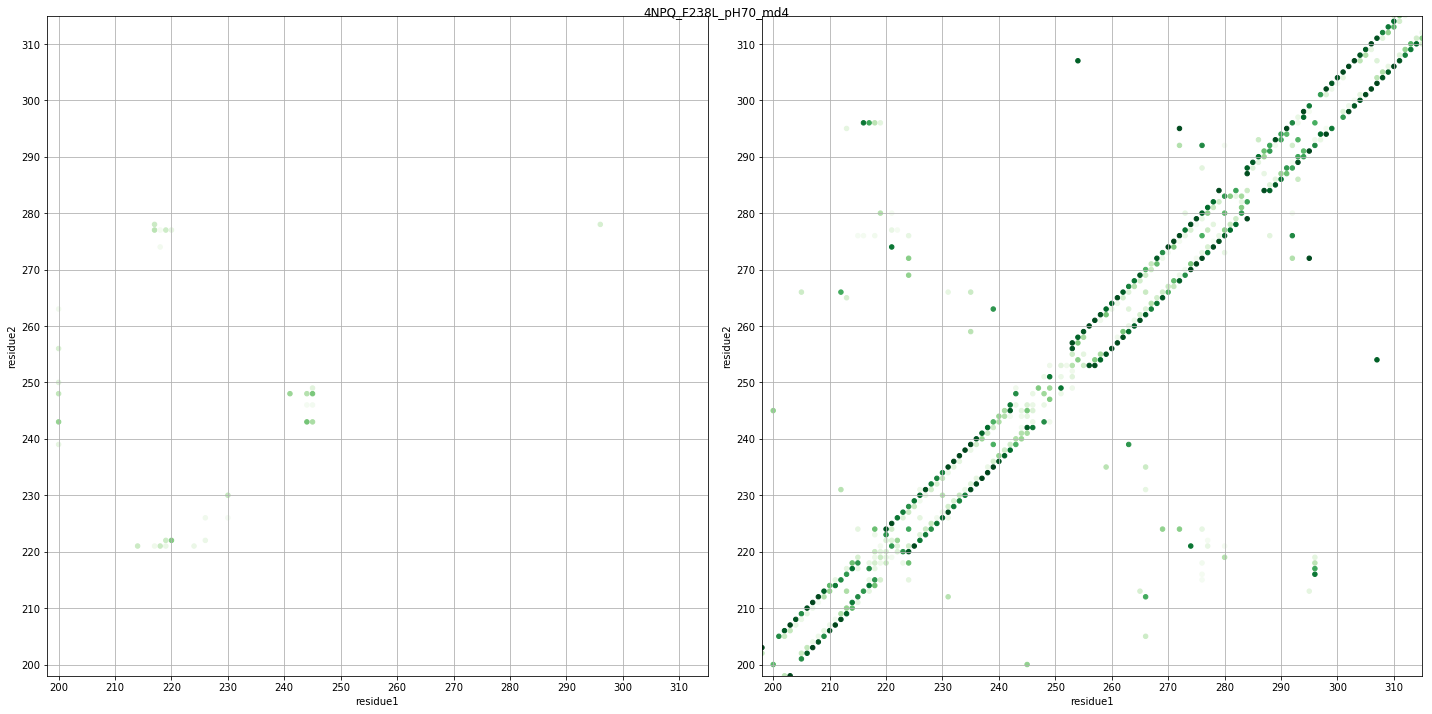

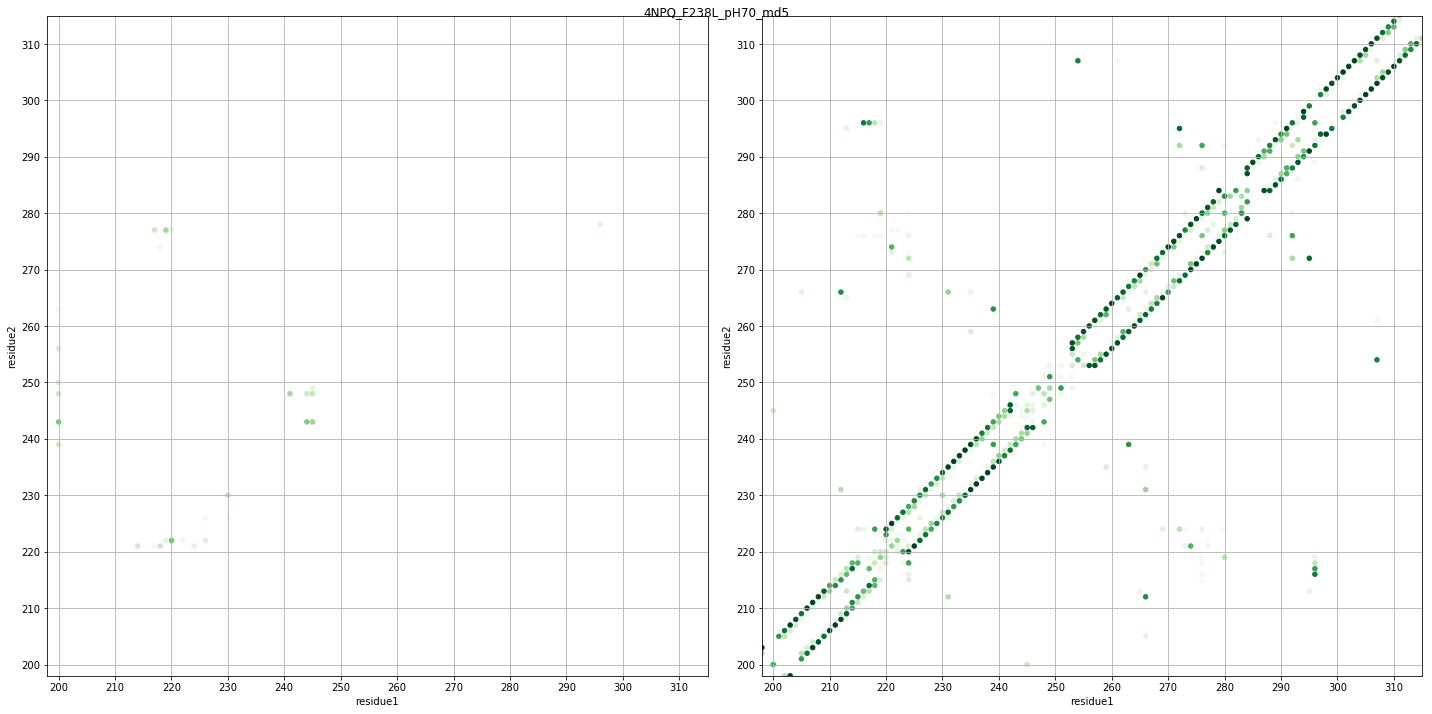

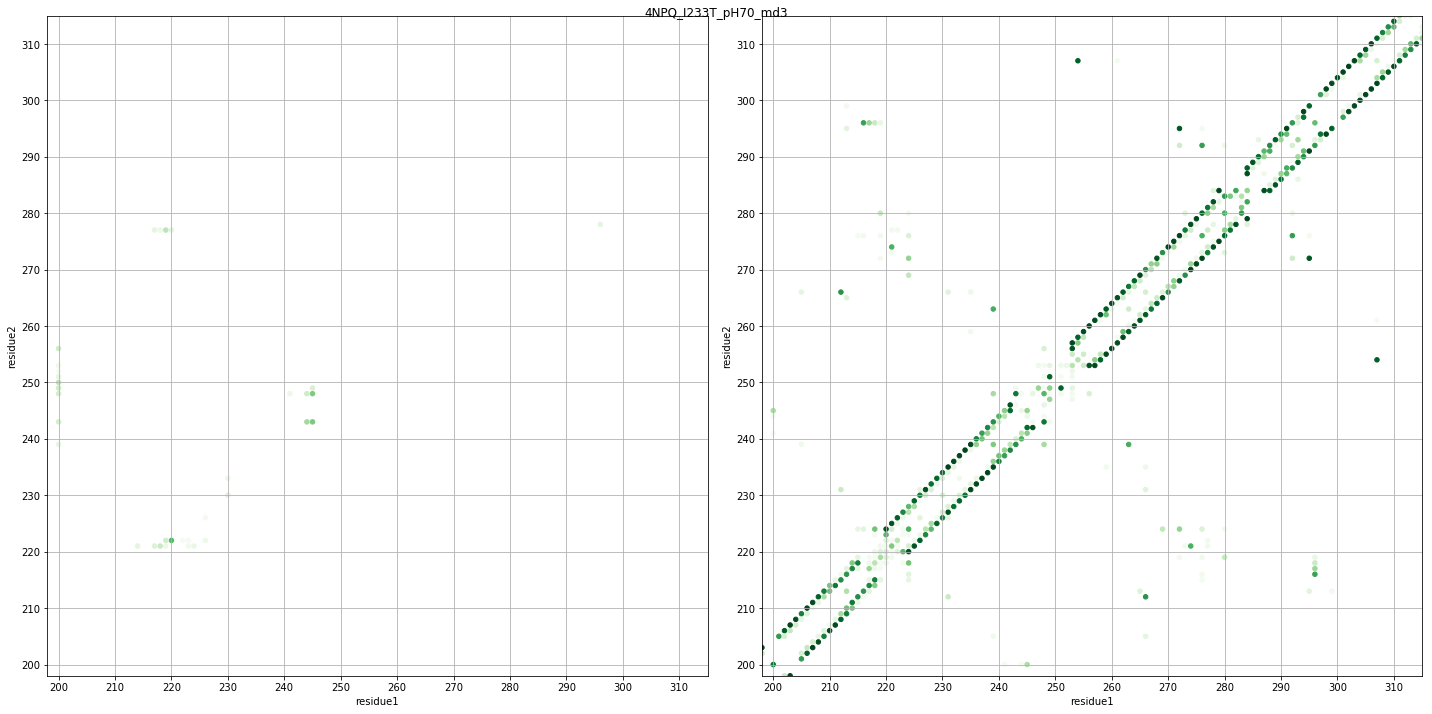

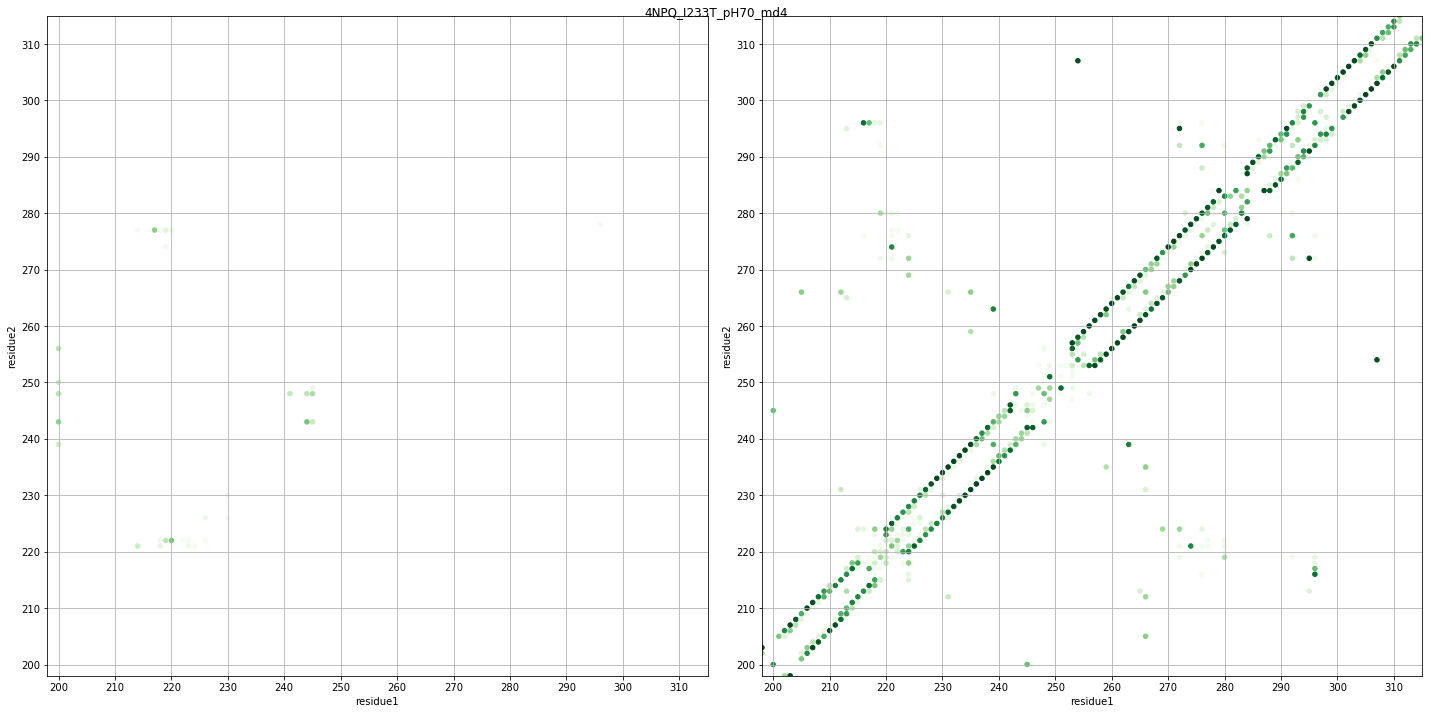

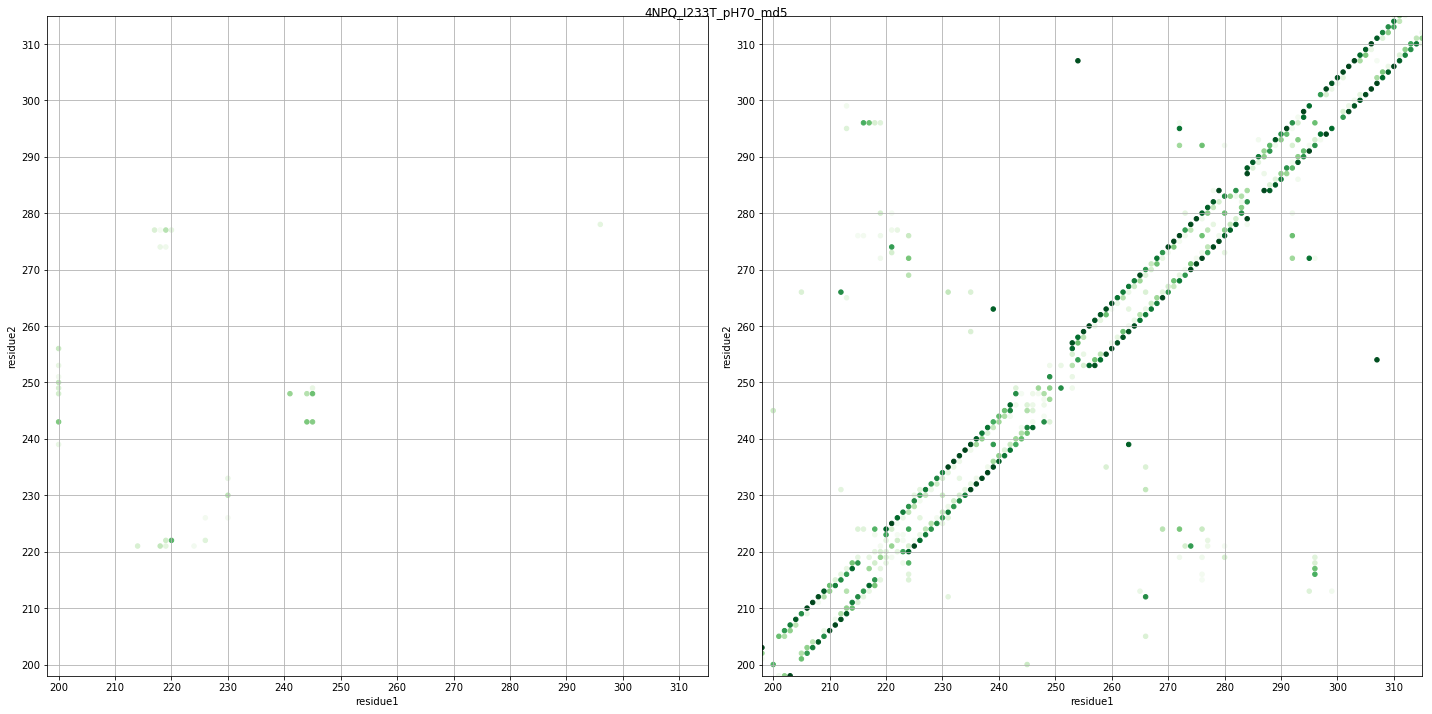

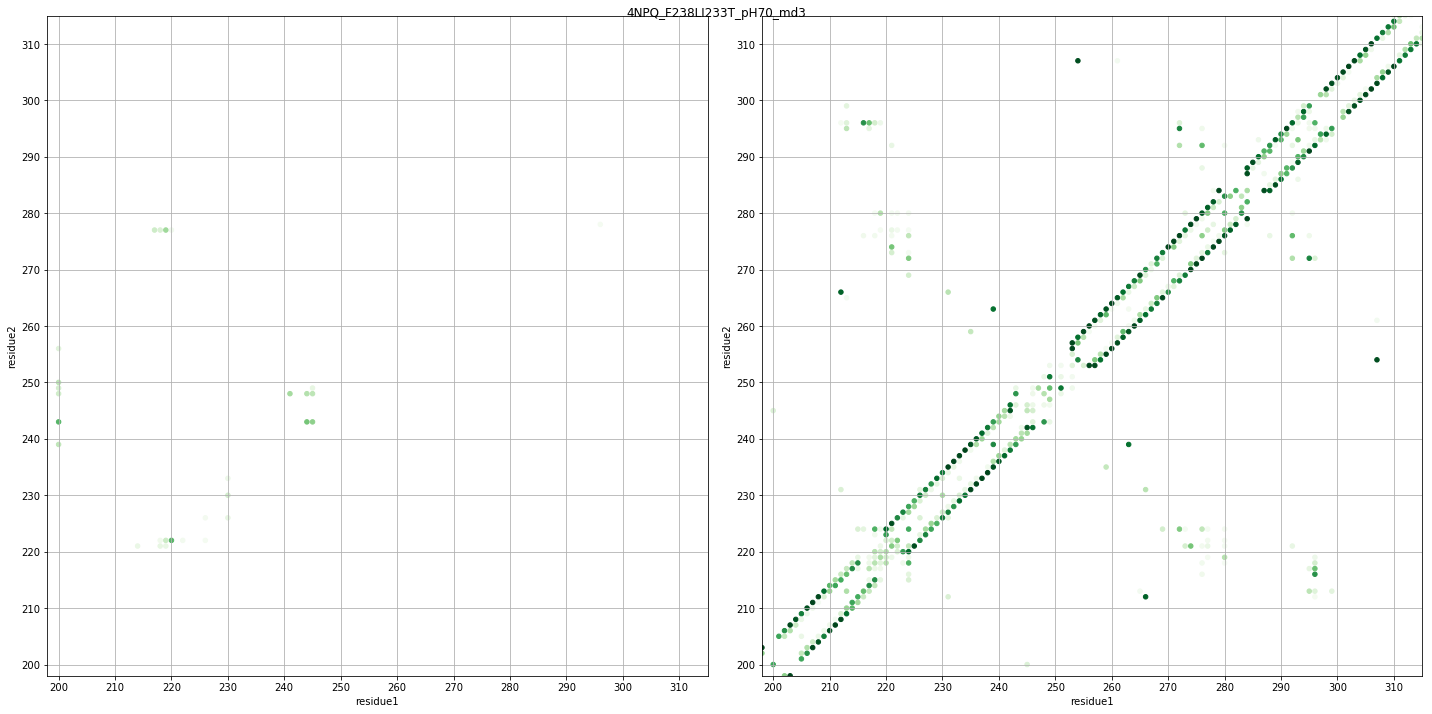

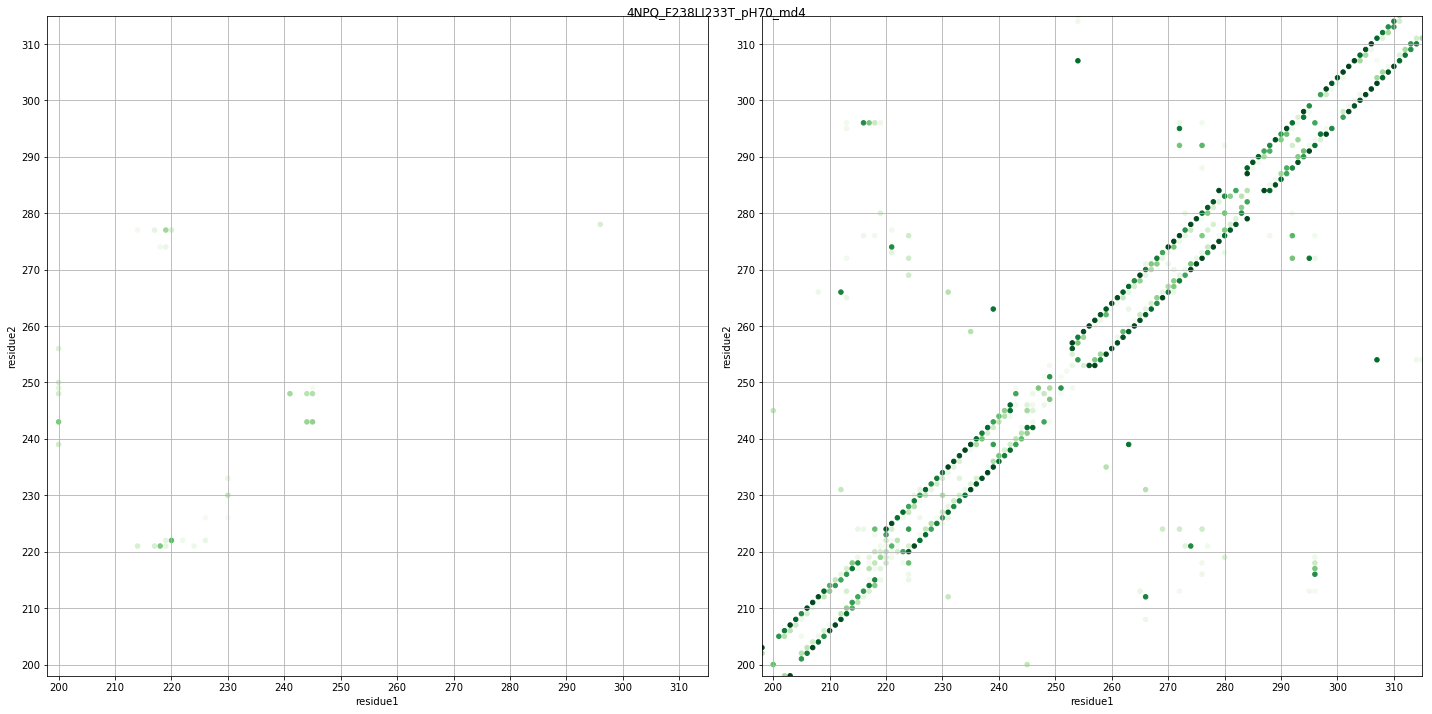

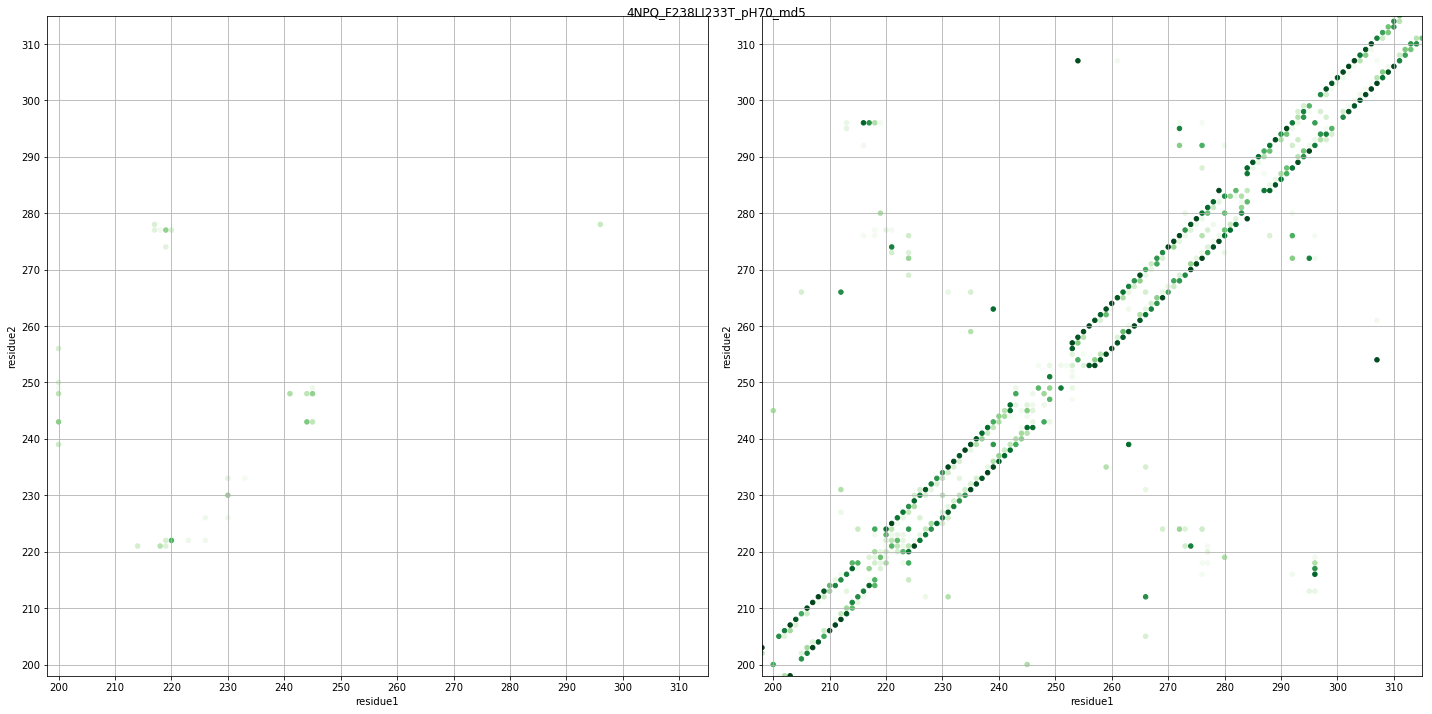

In [9]:
for traj_note in traj_notes:
    plot_inter_intra_hbond_per_rep(traj_note)

In [31]:
def plot_interaction_difference(note1,note2,note3):
    fig = plt.figure(figsize=(20, 10)) 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 

    ax2 = fig.add_subplot(1,2,2,aspect='equal')

    #ax3 = fig.add_subplot(1,3,3) 
    plot_inter_interaction_difference(note1,note2,note3,ax1)
    plot_intra_interaction_difference(note1,note2,note3,ax2)
    #plt3 = plot_salt_bridge_interaction(data,ax3)

    ax1.set_xlim(198,315)
    ax1.set_ylim(198,315)
    ax2.set_xlim(198,315)
    ax2.set_ylim(198,315) 
    ax1.set_xticks(np.arange(200,320,10))
    ax1.set_yticks(np.arange(200,320,10))
    ax2.set_xticks(np.arange(200,320,10))
    ax2.set_yticks(np.arange(200,320,10))
    ax1.grid()
    ax2.grid()
    ax1.set_title('inter interaction')
    ax2.set_title('intra interaction')
#    plt.suptitle(note1 + ' vs ' + note2 + ' of ' + note3)

    plt.tight_layout()
    plt.savefig('plots/' + note1 + '_' + note2 + 'diff_after40.pdf')
    plt.show()

In [18]:
def plot_inter_interaction_difference(note1,note2,note3,ax):
    difference = 0.4

    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_inter_hbond_after40.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_inter_hbond_after40.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


In [19]:
def plot_intra_interaction_difference(note1,note2,note3,ax, location = '/media/scottzhuang/data/MD/', skip=10):
    difference = 0.4
    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_intra_hbond_after40.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_intra_hbond_after40.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))

    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


inter: 4HFI_pH46 of [200 239]
inter: 4HFI_pH46 of [200 239]
intra: 4HFI_pH46 of [237 234]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4HFI_pH46 of [265 213]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4HFI_pH46 of [234 237]
intra: 4HFI_pH46 of [213 213]
intra: 4NPQ_pH70 of [238 234]
intra: 4HFI_pH46 of [259 235]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4HFI_pH46 of [265 213]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4NPQ_pH70 of [296 217]
intra: 4HFI_pH46 of [213 213]
intra: 4NPQ_pH70 of [217 296]
intra: 4NPQ_pH70 of [238 234]
intra: 4NPQ_pH70 of [217 217]
intra: 4HFI_pH46 of [259 235]


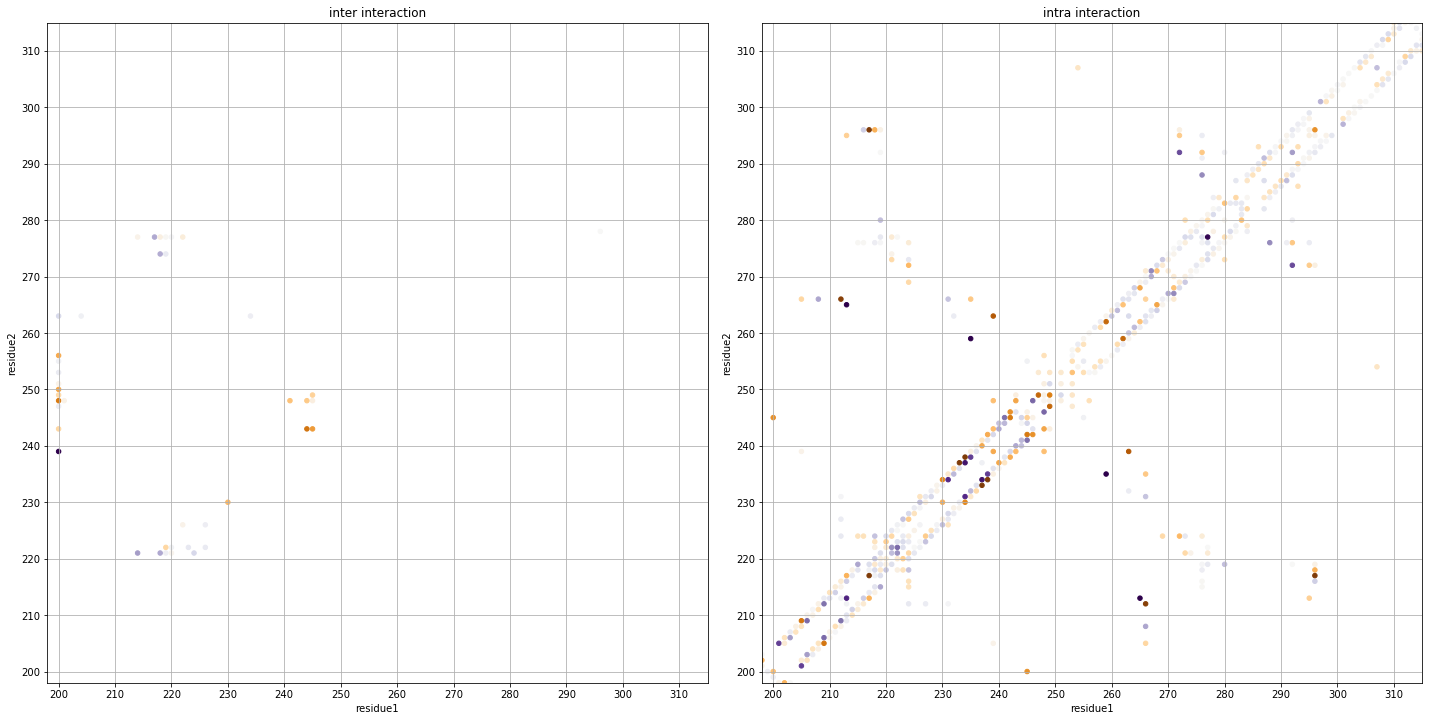

In [32]:
plot_interaction_difference('4NPQ_pH70','4HFI_pH46','hbond & water bridge lifetime')

inter: 4HFI_F238L_pH46 of [200 239]
inter: 4NPQ_F238L_pH70 of [244 243]
inter: 4HFI_F238L_pH46 of [200 263]
inter: 4HFI_F238L_pH46 of [200 239]
inter: 4NPQ_F238L_pH70 of [244 243]
inter: 4HFI_F238L_pH46 of [200 263]
intra: 4HFI_F238L_pH46 of [267 271]
intra: 4NPQ_F238L_pH70 of [237 241]
intra: 4NPQ_F238L_pH70 of [241 237]
intra: 4HFI_F238L_pH46 of [238 241]
intra: 4NPQ_F238L_pH70 of [266 212]
intra: 4HFI_F238L_pH46 of [265 213]
intra: 4HFI_F238L_pH46 of [263 263]
intra: 4HFI_F238L_pH46 of [213 265]
intra: 4NPQ_F238L_pH70 of [212 266]
intra: 4NPQ_F238L_pH70 of [238 242]
intra: 4NPQ_F238L_pH70 of [242 238]
intra: 4HFI_F238L_pH46 of [241 238]
intra: 4HFI_F238L_pH46 of [213 213]
intra: 4HFI_F238L_pH46 of [271 267]
intra: 4HFI_F238L_pH46 of [267 271]
intra: 4NPQ_F238L_pH70 of [237 241]
intra: 4NPQ_F238L_pH70 of [241 237]
intra: 4HFI_F238L_pH46 of [238 241]
intra: 4NPQ_F238L_pH70 of [266 212]
intra: 4HFI_F238L_pH46 of [265 213]
intra: 4HFI_F238L_pH46 of [263 263]
intra: 4HFI_F238L_pH46 of [2

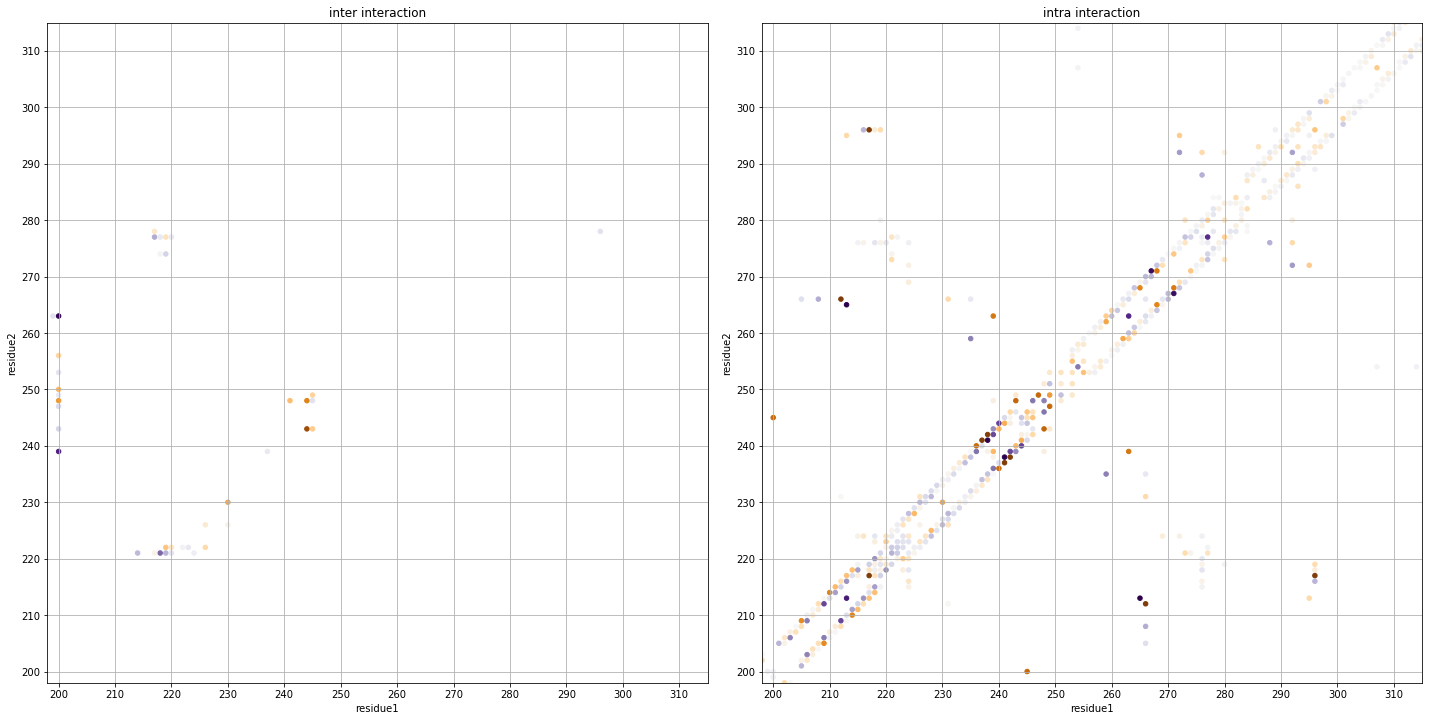

In [33]:
plot_interaction_difference('4NPQ_F238L_pH70','4HFI_F238L_pH46','hbond & water bridge lifetime')

inter: 4HFI_I233T_pH46 of [200 239]
inter: 4HFI_I233T_pH46 of [200 239]
inter: 4NPQ_I233T_pH70 of [244 243]
intra: 4HFI_I233T_pH46 of [237 234]
intra: 4HFI_I233T_pH46 of [234 231]
intra: 4NPQ_I233T_pH70 of [266 212]
intra: 4NPQ_I233T_pH70 of [234 238]
intra: 4HFI_I233T_pH46 of [277 277]
intra: 4HFI_I233T_pH46 of [265 213]
intra: 4NPQ_I233T_pH70 of [237 233]
intra: 4HFI_I233T_pH46 of [213 265]
intra: 4HFI_I233T_pH46 of [241 245]
intra: 4NPQ_I233T_pH70 of [233 237]
intra: 4NPQ_I233T_pH70 of [212 266]
intra: 4HFI_I233T_pH46 of [235 259]
intra: 4HFI_I233T_pH46 of [245 241]
intra: 4NPQ_I233T_pH70 of [239 263]
intra: 4NPQ_I233T_pH70 of [296 217]
intra: 4HFI_I233T_pH46 of [234 237]
intra: 4HFI_I233T_pH46 of [213 213]
intra: 4NPQ_I233T_pH70 of [217 296]
intra: 4NPQ_I233T_pH70 of [263 239]
intra: 4NPQ_I233T_pH70 of [238 234]
intra: 4HFI_I233T_pH46 of [259 235]
intra: 4HFI_I233T_pH46 of [231 234]
intra: 4HFI_I233T_pH46 of [234 231]
intra: 4NPQ_I233T_pH70 of [266 212]
intra: 4NPQ_I233T_pH70 of [2

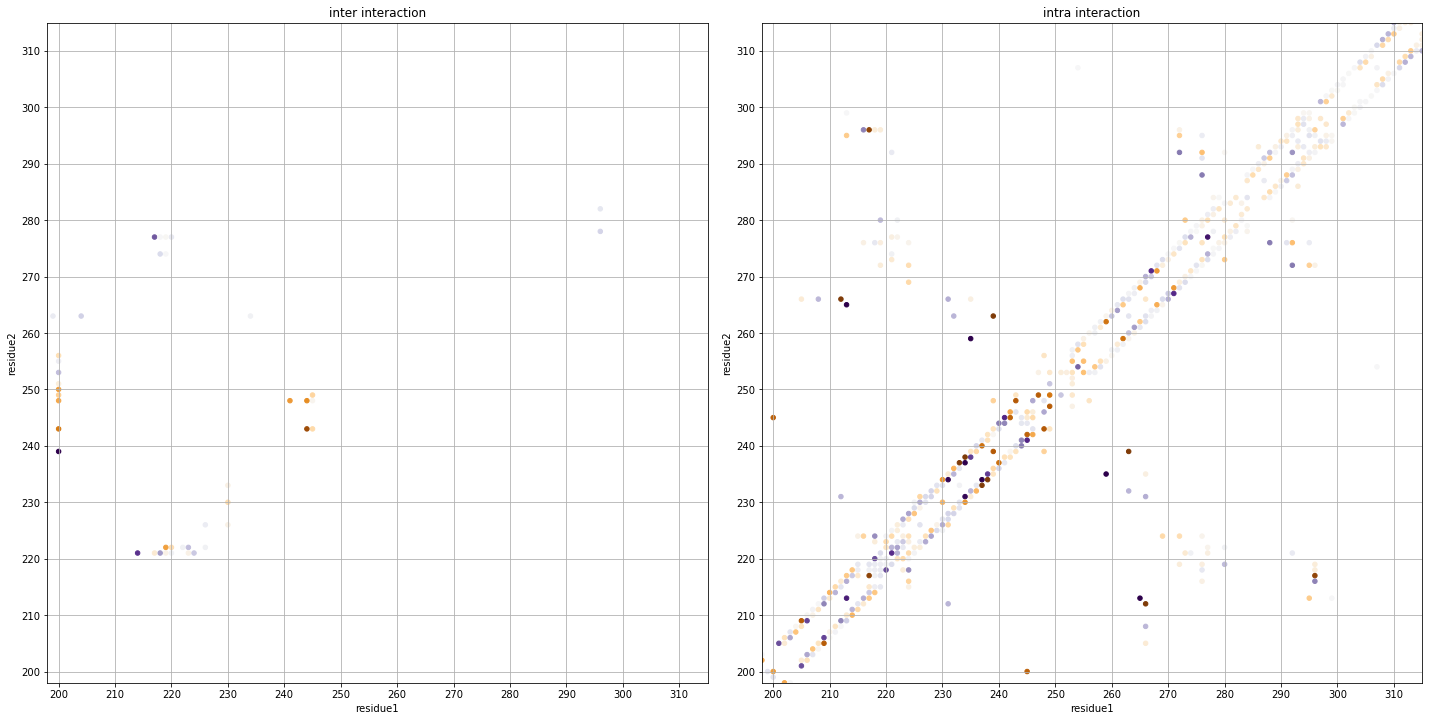

In [34]:
plot_interaction_difference('4NPQ_I233T_pH70','4HFI_I233T_pH46','hbond & water bridge lifetime')

inter: 4HFI_F238LI233T_pH46 of [200 239]
inter: 4HFI_F238LI233T_pH46 of [200 263]
inter: 4HFI_F238LI233T_pH46 of [200 239]
inter: 4NPQ_F238LI233T_pH70 of [244 243]
intra: 4HFI_F238LI233T_pH46 of [267 271]
intra: 4NPQ_F238LI233T_pH70 of [237 241]
intra: 4NPQ_F238LI233T_pH70 of [241 237]
intra: 4NPQ_F238LI233T_pH70 of [266 212]
intra: 4HFI_F238LI233T_pH46 of [277 277]
intra: 4HFI_F238LI233T_pH46 of [265 213]
intra: 4HFI_F238LI233T_pH46 of [263 263]
intra: 4HFI_F238LI233T_pH46 of [244 240]
intra: 4HFI_F238LI233T_pH46 of [213 265]
intra: 4NPQ_F238LI233T_pH70 of [212 266]
intra: 4NPQ_F238LI233T_pH70 of [238 242]
intra: 4NPQ_F238LI233T_pH70 of [242 238]
intra: 4NPQ_F238LI233T_pH70 of [248 243]
intra: 4HFI_F238LI233T_pH46 of [212 209]
intra: 4NPQ_F238LI233T_pH70 of [239 263]
intra: 4NPQ_F238LI233T_pH70 of [247 249]
intra: 4HFI_F238LI233T_pH46 of [213 213]
intra: 4NPQ_F238LI233T_pH70 of [243 248]
intra: 4HFI_F238LI233T_pH46 of [240 244]
intra: 4HFI_F238LI233T_pH46 of [209 212]
intra: 4NPQ_F238

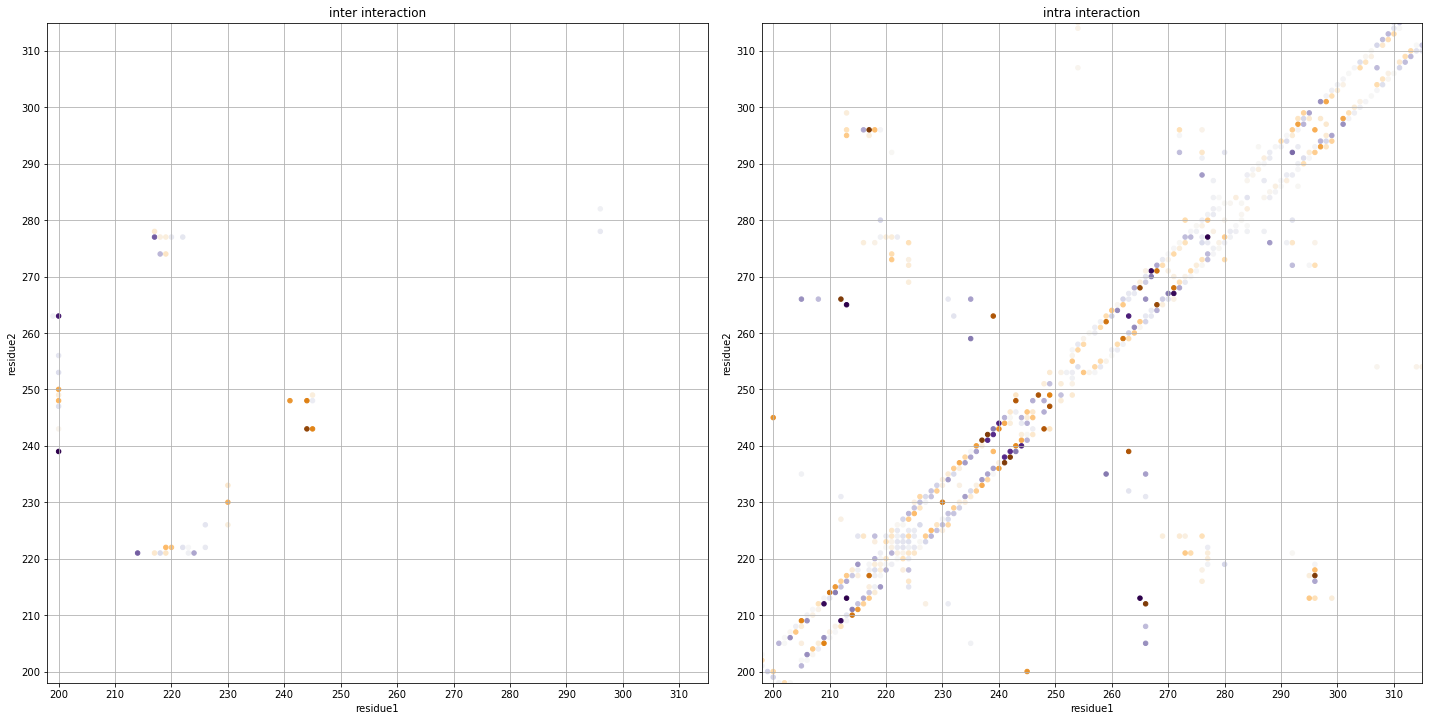

In [35]:
plot_interaction_difference('4NPQ_F238LI233T_pH70','4HFI_F238LI233T_pH46','hbond & water bridge lifetime')

inter: 4HFI_F238L_pH46 of [200 263]
inter: 4HFI_F238L_pH46 of [200 263]
intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [234 238]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]
intra: 4HFI_pH46 of [241 244]
intra: 4HFI_pH46 of [244 241]
intra: 4HFI_F238L_pH46 of [238 234]
intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [234 238]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]
intra: 4HFI_pH46 of [241 244]
intra: 4HFI_pH46 of [244 241]
intra: 4HFI_F238L_pH46 of [238 234]


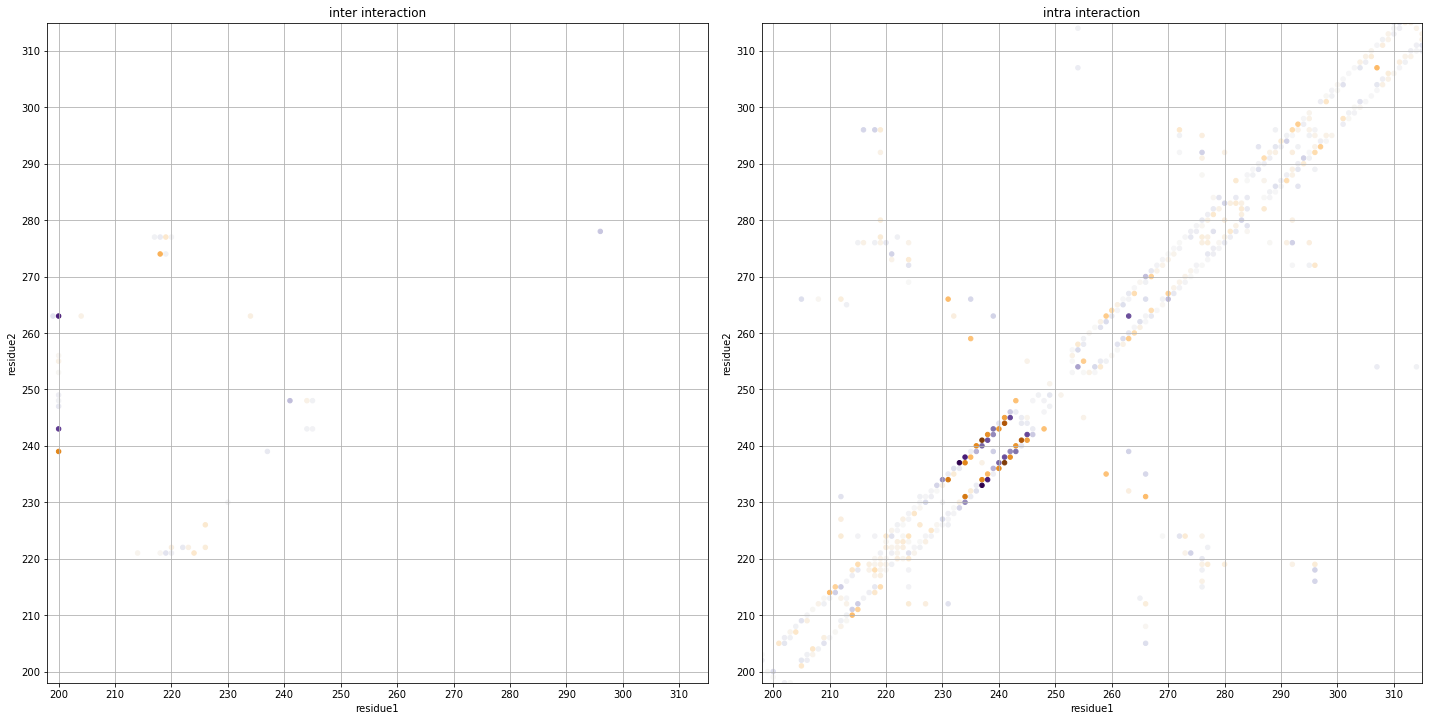

In [36]:
plot_interaction_difference('4HFI_pH46','4HFI_F238L_pH46','hbond & water bridge lifetime')

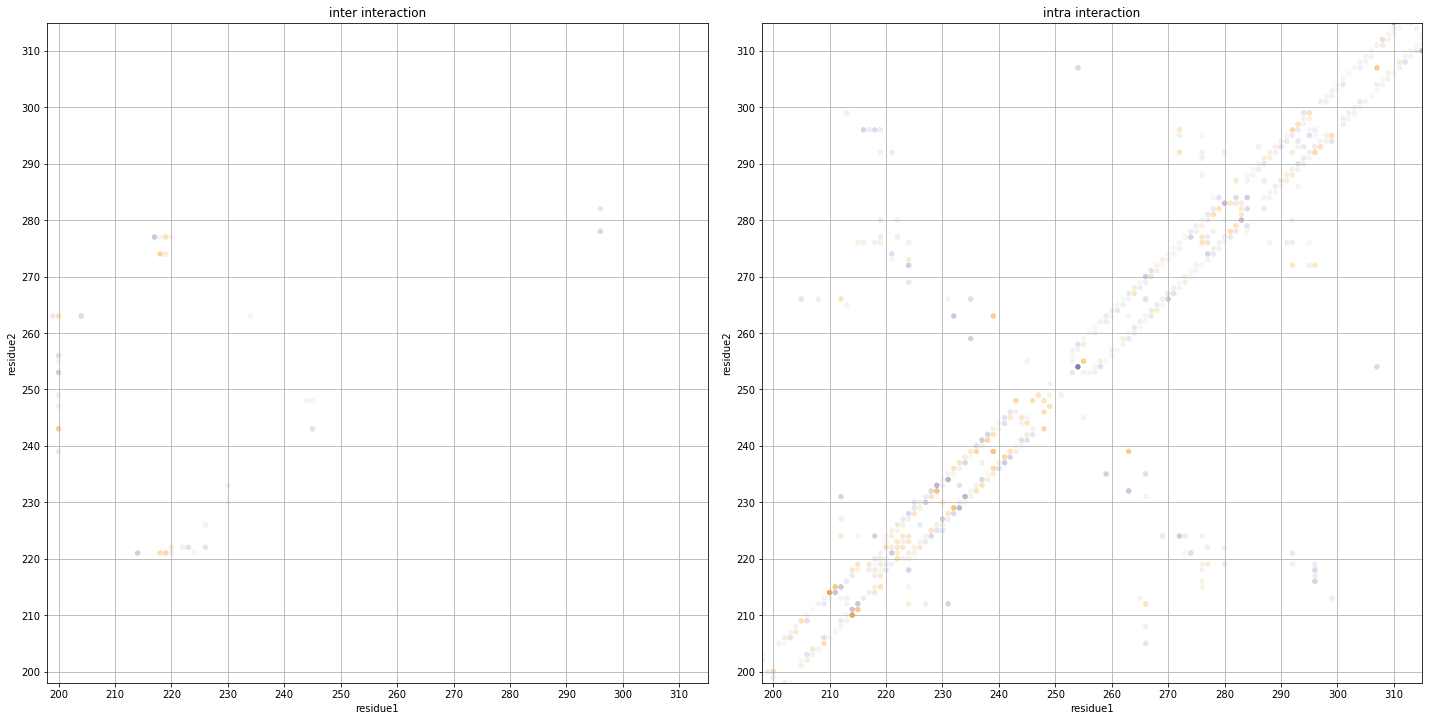

In [37]:
plot_interaction_difference('4HFI_pH46','4HFI_I233T_pH46','hbond & water bridge lifetime')

intra: 4HFI_pH46 of [241 244]
intra: 4HFI_pH46 of [244 241]
intra: 4HFI_pH46 of [241 244]
intra: 4HFI_pH46 of [244 241]


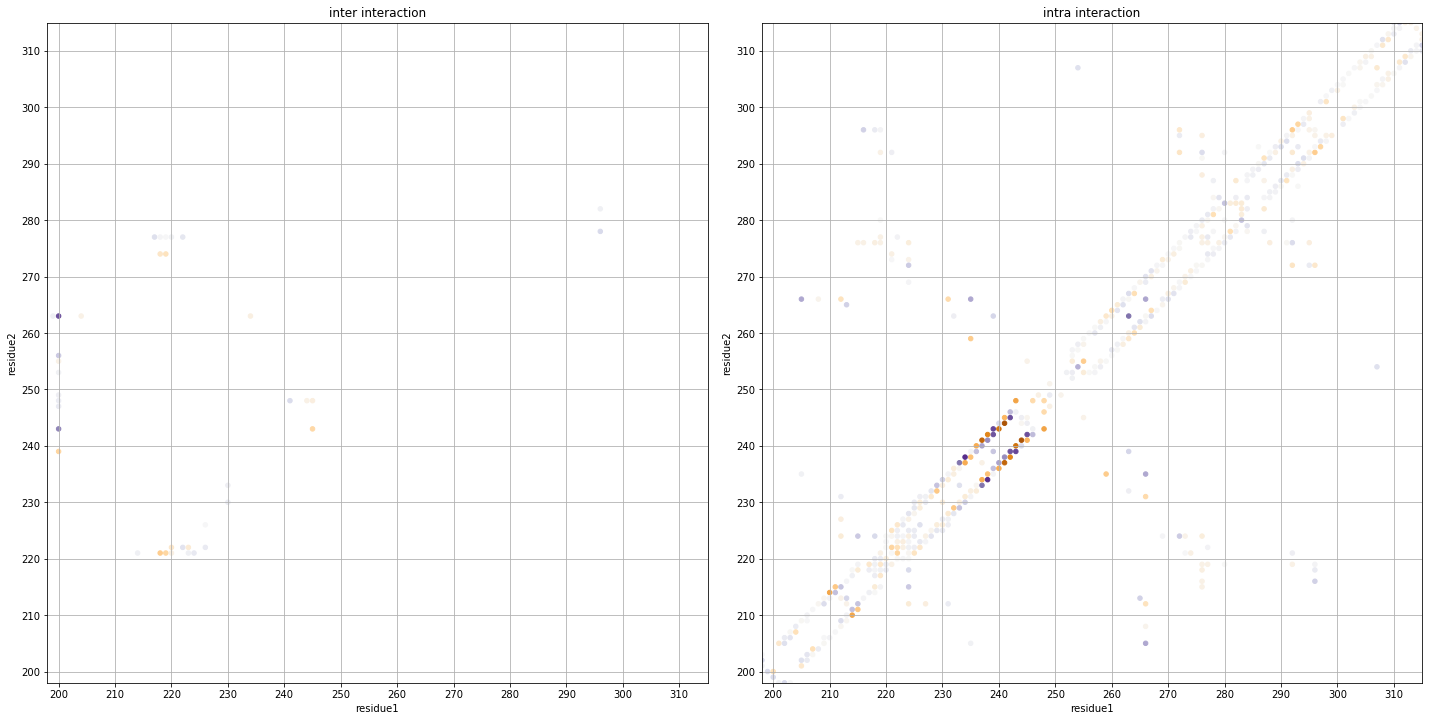

In [38]:
plot_interaction_difference('4HFI_pH46','4HFI_F238LI233T_pH46','hbond & water bridge lifetime')

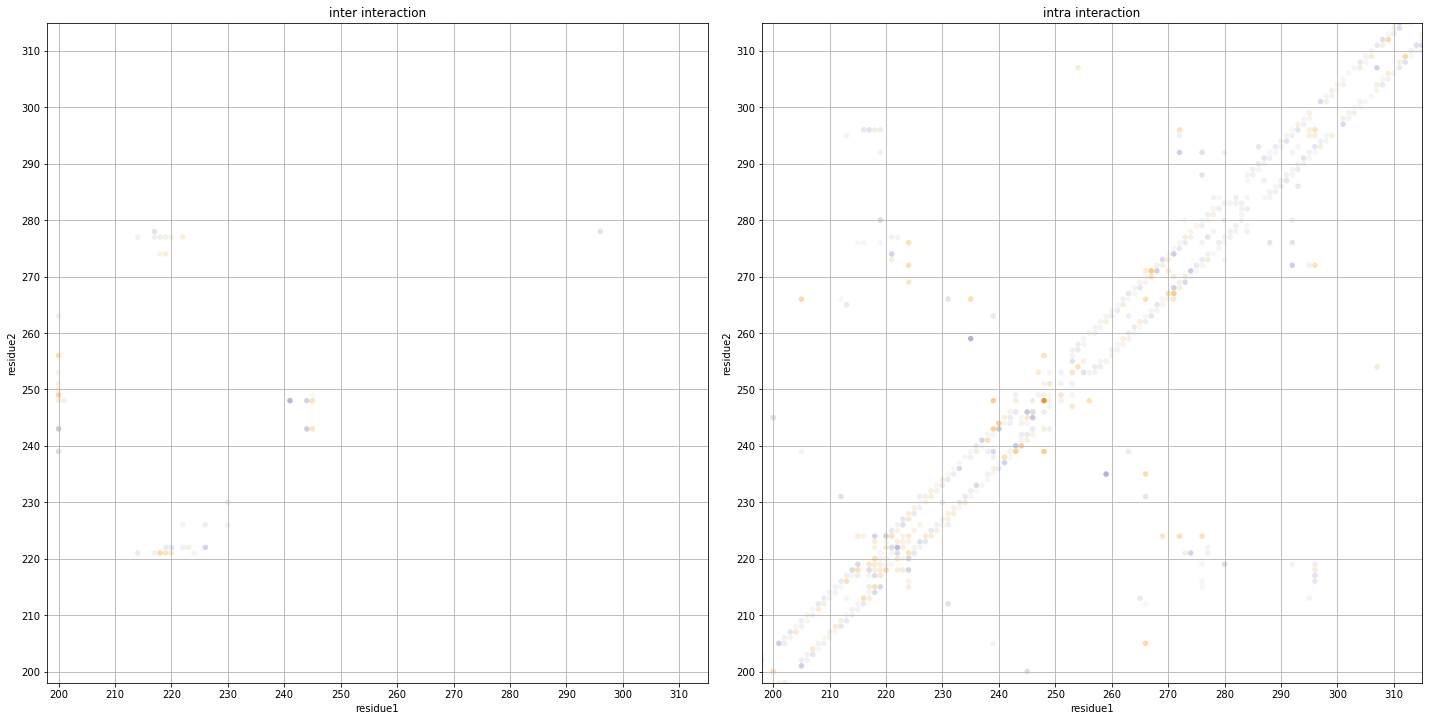

In [39]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238L_pH70','hbond & water bridge lifetime')

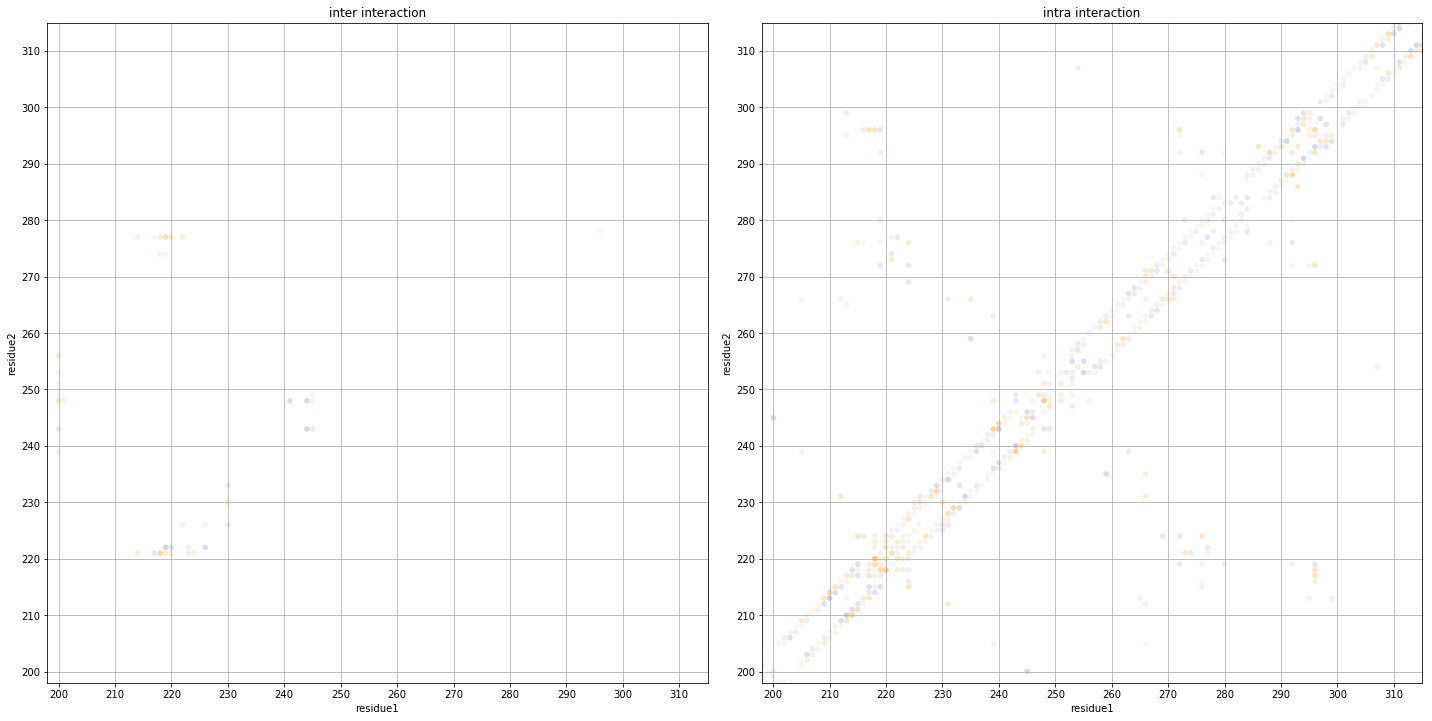

In [40]:
plot_interaction_difference('4NPQ_pH70','4NPQ_I233T_pH70','hbond & water bridge lifetime')

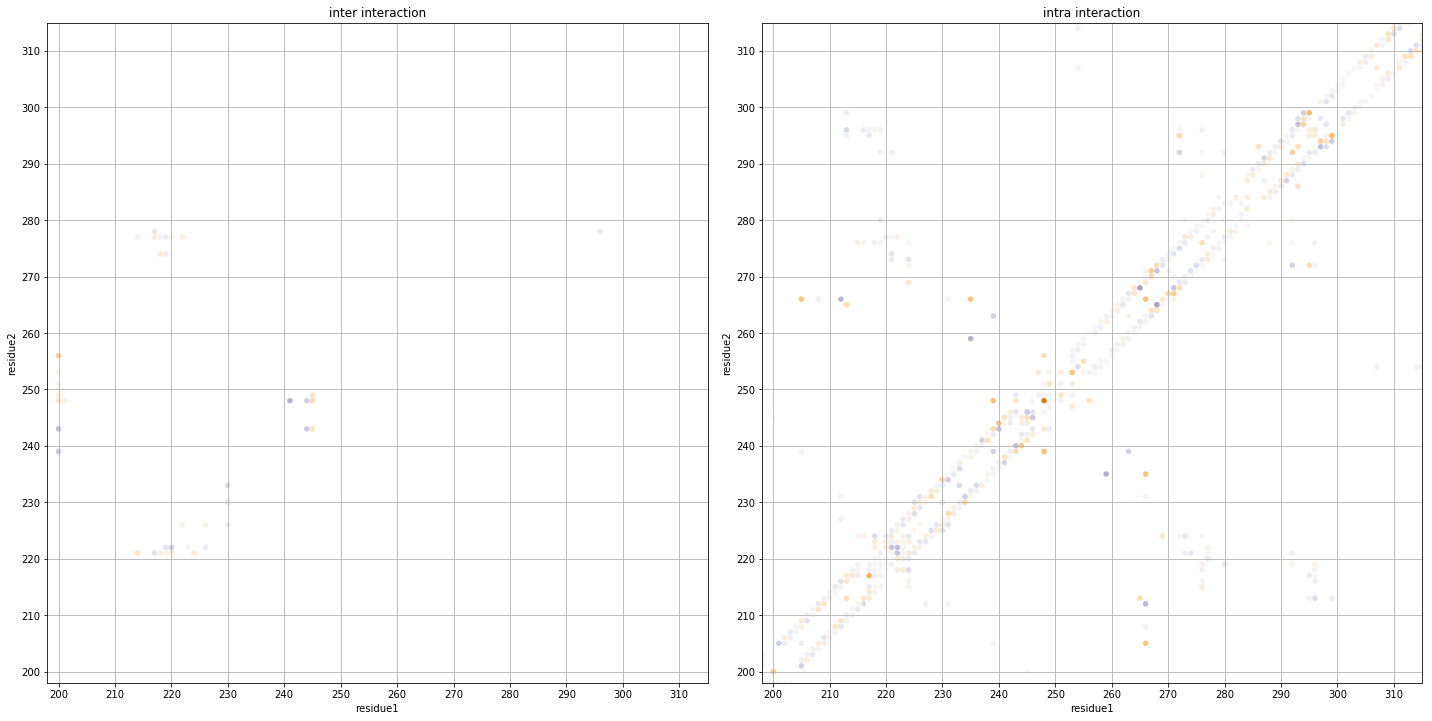

In [41]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238LI233T_pH70','hbond & water bridge lifetime')